# Project by Lennart Wallentin, lennartwallentin@gmail.com
In this project I classify if a person flying with an unnamed north american airline company is satisfied or neutral/dissatisfied with their flight, but the classifying per se is not the end goal with this project instead the main objectives of this project are:

1. Is a Stacked Generalization (Stacking) model’s AUC score higher than two standalone (Logistic regression and XGBoost) machine learning model’s AUC scores?
2. Compare the three models through one-way analysis of variance (ANOVA) tests to see if they are different from each other.

In addition to that is my focus with this project to show that I have good knowledge regarding statistics, machine learning and business knowledge. I demonstrate that by explaining and using:
* <b>Statistics -</b> More advanced statistical topics as chi-square and construct a Cramer’s V tests for association between categorical features. GLM, the logistic function and odds ratio in conjunction with logistic regression. And as already mentioned one-way analysis of variance (ANOVA) tests. In addition basic statistics such as boxplots, Pearson correlation coefficient, histograms, probabilities etc is also part of this project.  


* <b>Machine learning -</b> Stacking using base and meta learners as well as Logistic regression and XGboost models and how they fit the data in regard to bias and variance. I cross-validate and do feature selection on all three models, and also hyperparameter tuning with Bayesian optimization on the standalone XGBoost and the XGBoost stacked base and meta learners. <br>A range of evaluation metrics are displayed with each model and since AUC is my main evaluation metric for this project, I construct graphs for each model that show the different cut off thresholds for the predicted probabilities in regard to True Positive Rate/Sensitivity and False Positive Rate.</br>


* <b>Business knowledge -</b> For example noticed that some of the survey questions are wrongly labeled as 0 instead of NA-value and fixed that. As for outliers I use business sense in regard to flight distance and departure delay outliers. Working in an organization I would of course talk to stakeholders to get even more information regarding any questions about the data.

This is the structure of this project:
1. Data preparation
        1.1. Data presentation
        1.2. Handling NA and missing values
        1.3. Data types and Correlation
            1.3.1. Pearson correlation for the numerical features
            1.3.2. Cramer's V association for the categorical feature
        1.4. Histograms, Boxplots Outliers and Unique values
            1.4.1. Unique values categorical features
        1.5. Encoding and create train and test sets
2. GLM - Logistic regression
            2.0.1. Odds ratio 'Food and drink_5.0' 
        2.1. Recursive Feature Elimination (RFE)
            2.1.1. Compare AUC, Logistic regression 
3. XGBoost
            3.0.1. Feature importance plot
            3.0.2. Gain score and feature selection
            3.0.3. Compare AUC, XGBoost
        3.1. XGBoost hyperparameter tuning with Bayesian optimization
            3.1.1. Compare AUC, XGBoost hyperparameter tuned
4. Stacking 
        4.1. Stacking Base Learner - GLM - Logistic Regression
            4.1.1 Recursive Feature Elimination (RFE) Base learner - Logistic regression
            4.1.2. Compare AUC, Base learner - Logistic regression
        4.2. Stacking Base Learner - XGBoost
            4.2.1. Compare AUC, Base learner - XGBoost
            4.2.2. XGBoost Base learner hyperparameter tuning with Bayesian optimization
            4.2.3. Compare AUC, Base learner - XGBoost hyperparameter tuned
        4.3 Stacking Meta Learner - XGBoost
            4.3.1. Compare AUC, Meta learner - XGBoost
            4.3.2. XGBoost Meta learner hyperparameter tuning with Bayesian optimization
            4.3.3. Compare AUC, Meta learner - XGBoost hyperparameter tuned
5. Conclusion -  Comparing AUC
        5.1. Compare models with one-way analysis of variance (ANOVA) tests

# 1. Data preparation

## 1.1 Data presentation
The data is originally downloaded from the website kaggle.com as an xlsx file which I in turn transform to an csv file to speed up the transformation to an pandas DataFrame. I also fix the feature names in the csv file so that every feature name starts with a capital letter. 

The dataset contains information about flights with an unnamed north american airline company and has 23 features including the target variable ‘Satisfaction’. Most of the features are from rating questions such as rate the food and drink on the plane or the inflight entertainment but it does also include numerical features such as flight distance. When I convert the data to a pandas DataFrame I give the DataFrame the name df.  

Links: 

Dataset - satisfaction.xlsx - https://www.kaggle.com/johndddddd/customer-satisfaction 

In [1]:
# import necessary packages 
import pandas as pd
import numpy as np
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE) 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-dark')
from sklearn import preprocessing
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
import sklearn.metrics as metrics
#from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, plot_confusion_matrix, roc_curve, auc 
from sklearn.feature_selection import RFECV

import xgboost as xgb
from bayes_opt import BayesianOptimization

from scipy.stats import f_oneway

In [2]:
# import data and print the first 10 rows
df = pd.read_csv('https://raw.githubusercontent.com/lennartwallentin/passenger_satisfaction_stacking_anova/main/data_passenger_satisfaction_stacking_anova_lennart_wallentin.csv')
df.head(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction
0,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,3,3,0,3,5,3,2,0,0.0,satisfied
1,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,3,4,4,4,2,3,2,310,305.0,satisfied
2,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,3,3,4,4,4,2,0,0.0,satisfied
3,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,1,1,0,1,4,1,3,0,0.0,satisfied
4,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,2,2,0,2,4,2,5,0,0.0,satisfied
5,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,5,4,5,5,4,2,0,0.0,satisfied
6,Female,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,0,5,5,5,3,17,15.0,satisfied
7,Male,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,3,3,4,5,4,2,0,0.0,satisfied
8,Female,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,4,4,0,1,5,4,4,0,0.0,satisfied
9,Male,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,4,5,3,4,2,30,26.0,satisfied


In [3]:
# shape of data frame (df)
df.shape

(129880, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

### Comment - Non-Null Count
df.info() shows that one feature ‘Arrival Delay in Minutes’ have some Non_null i.e. missing values in it’s column. 

A more thorough look into missing values in the df will be conducted further down the notebook.   


Text(0, 0.5, 'Count')

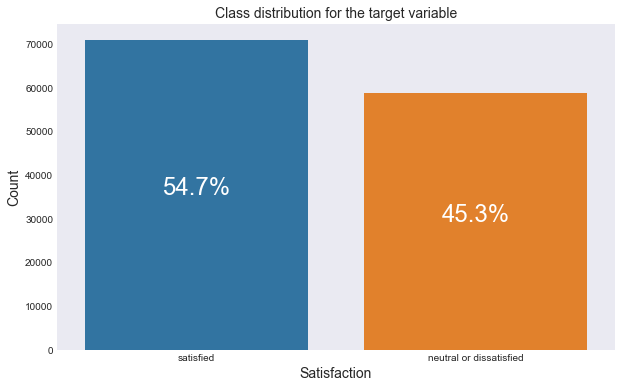

In [5]:
# plot the class distribution for the target variable
fig = plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Satisfaction', data=df)
ax.set_title('Class distribution for the target variable', size=14)

for p in ax.patches:
    ax.text(x = p.get_x() + p.get_width()/2, y = p.get_height()/2, # set position (data cordinates) for the text 
            s = f"{np.round(p.get_height()/len(df)*100, 1)}%", # the text
            horizontalalignment ='center', size=24, color='white')
    
ax.set_xlabel('Satisfaction', size=14)
ax.set_ylabel('Count', size=14)

### Comment - Class distribution
The binary target variable is not divided evenly 50/50 but it’s far from being considered an extreme skewed class distribution that potentially would have required me to balance the dataset to get some value from the minority class

## 1.2 Handling NA and missing values

In [6]:
# a function that for each column in the dataset checks if a variable contains a NA-value, 
# counts number of observations with NA-values in the variable, 
# and finally calculates the percentage of NA-values in that variable. 
# If the data contains no NA-values then that information is printed out

def describe_isna_values(data):
    cc = 0      # column counter
    cnac = 0    # column with isna() values counter
    for i in data.columns:        
        missing = data[i].isna()
        num_missing = missing.sum()
        pct_missing = missing.mean()*100 
        cc = cc + 1
    
        if num_missing > 0:
            print(f'Column with NA-value: {i:25} {num_missing:8} NA-values {pct_missing:8.3f}% of the values is NA-values')
            cnac = cnac + 1
        
        if cc == len(data.columns) and cnac == 0:
            print(f'No NA-values (checked {cc} columns out of {len(data.columns)} columns)')

In [7]:
describe_isna_values(df)

Column with NA-value: Arrival Delay in Minutes       393 NA-values    0.303% of the values is NA-values


In [8]:
# drop rows with NA-values (from the 'Arrival Delay in Minutes'-column)
df.dropna(inplace=True)

In [9]:
describe_isna_values(df)

No NA-values (checked 23 columns out of 23 columns)


### Comment - Missing values
In the data description at kaggle.com it says that for the feature “‘Inflight wifi service' 0 = Not Applicable” i.e. 0 = NA. But it’s not stated with certainty for the other categorical features with answers from rating questions.

I interpret it that rating questions in this dataset have given the respondent the ability to answer between 1-5 and that 0 should be treated as an NA-value. 

I base that on:
* In the data description, the rating question ‘Inflight wifi service’ it is stated that 0 = Not Applicable
* ‘Baggage handling’ is also a rating question but does only have 1-5 as options to answer 
* When making an histogram about the different rating question features, it’s clear that the answer 0 has a considerably smaller frequency count than the other values in the feature. 0 is actually the minimum value in every rating question feature in the df. 


In [10]:
# a list of features names that contains rating questions answers 
rating_questions=['Inflight wifi service', 'Online support', 'Departure/Arrival time convenient', 'Ease of Online booking',
'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment',
'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness']

In [11]:
# the range is (at most) 0 to 5, use transpose (T) on the describe method to easier see the min and max for each column. 
df.loc[:,rating_questions].describe().T

,count,mean,std,min,25%,50%,75%,max
Inflight wifi service,129487.0,3.249160,1.318765,0.0,2.0,3.0,4.0,5.0
Online support,129487.0,3.519967,1.306326,0.0,3.0,4.0,5.0,5.0
Departure/Arrival time convenient,129487.0,2.990277,1.527183,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,129487.0,3.472171,1.305573,0.0,2.0,4.0,5.0,5.0
Gate location,129487.0,2.990377,1.305917,0.0,2.0,3.0,4.0,5.0
Food and drink,129487.0,2.852024,1.443587,0.0,2.0,3.0,4.0,5.0
Online boarding,129487.0,3.352545,1.298624,0.0,2.0,4.0,4.0,5.0
Seat comfort,129487.0,2.838586,1.392873,0.0,2.0,3.0,4.0,5.0
Inflight entertainment,129487.0,3.383745,1.345959,0.0,2.0,4.0,4.0,5.0
On-board service,129487.0,3.465143,1.270755,0.0,3.0,4.0,4.0,5.0


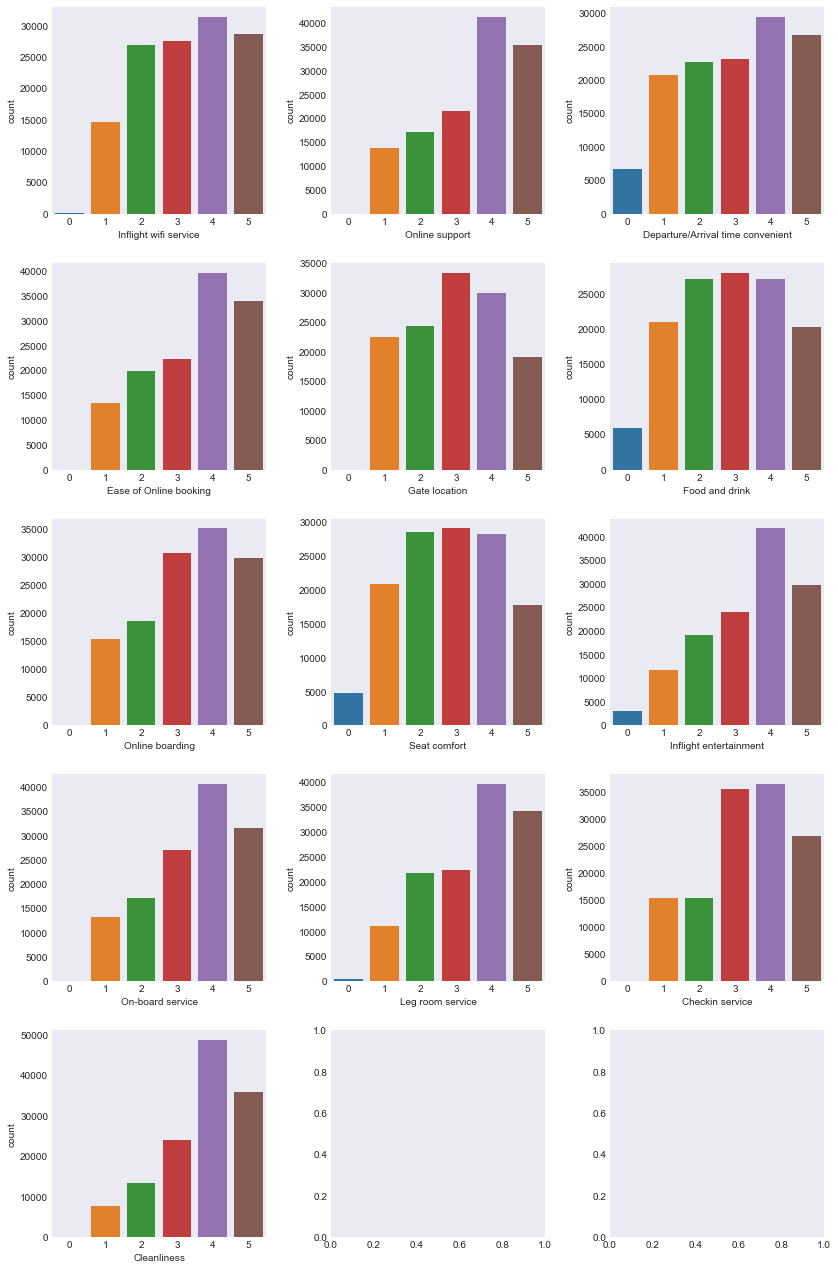

In [12]:
# a list with the features names that contains answers from rating questions that have a 0 as an answer (that's every feature in rating_questions except 'Baggage handling')
# plot an histogram of each feature

rating_questions_zero=['Inflight wifi service', 'Online support', 'Departure/Arrival time convenient', 'Ease of Online booking',
'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment',
'On-board service', 'Leg room service', 'Checkin service', 'Cleanliness']

fig, ax2 = plt.subplots(nrows=5, ncols=3, figsize=(12, 18))
ax2 = ax2.reshape(-1)

for i, col in enumerate(rating_questions_zero):
  sns.countplot(x=df[col], ax=ax2[i])

fig.tight_layout(pad=2.0)

In [13]:
# 0 was the minimum value in every histogram. 
# With that information it’s easy to show the number of times the value 0 appeared in each feature 
for i in rating_questions_zero:
    print(f'{i:33} {df[i].value_counts().min():6}')

Inflight wifi service                130
Online support                         1
Departure/Arrival time convenient   6644
Ease of Online booking                18
Gate location                          2
Food and drink                      5922
Online boarding                       14
Seat comfort                        4781
Inflight entertainment              2968
On-board service                       5
Leg room service                     442
Checkin service                        1
Cleanliness                            5


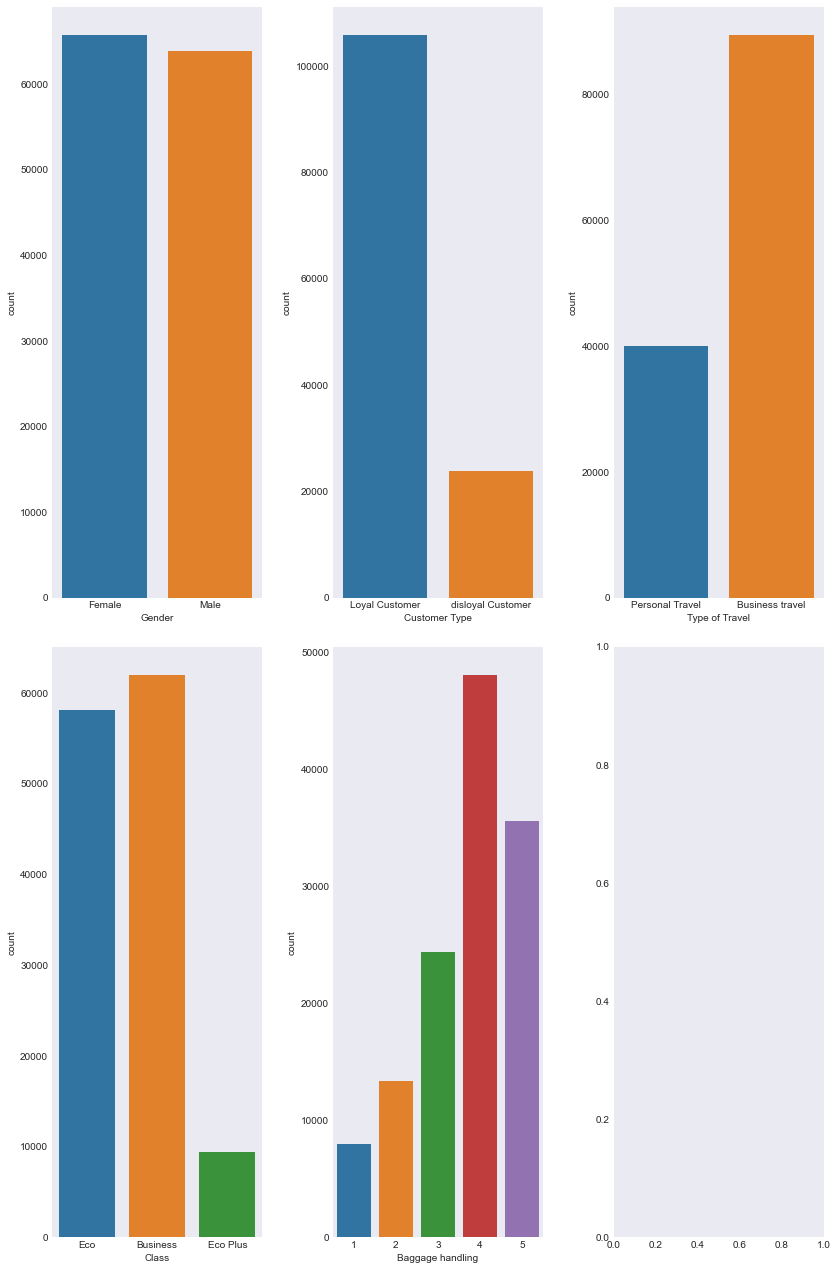

In [14]:
# Check that no other categorical feature have a 0 as observation name
other_categorical=['Gender', 'Customer Type','Type of Travel', 'Class', 'Baggage handling']
fig, ax3 = plt.subplots(nrows=2, ncols=3, figsize=(12, 18))
ax3 = ax3.reshape(-1)
for i, col in enumerate(other_categorical):
  sns.countplot(x=df[col], ax=ax3[i])
fig.tight_layout(pad=2.0)

In [15]:
# subset the features with 0-values 
convert_nan_values = df.loc[:,rating_questions_zero]
# convert 0 to NaN
convert_nan_values = convert_nan_values[convert_nan_values != 0]

# drop the old features with 0-values
df = df.drop(convert_nan_values, axis=1)
# concatenate the new features with Nan-values instead of 0-values
df = pd.concat([df,convert_nan_values], axis = 1)

In [16]:
describe_isna_values(df)

Column with NA-value: Inflight wifi service          130 NA-values    0.100% of the values is NA-values
Column with NA-value: Online support                   1 NA-values    0.001% of the values is NA-values
Column with NA-value: Departure/Arrival time convenient     6644 NA-values    5.131% of the values is NA-values
Column with NA-value: Ease of Online booking          18 NA-values    0.014% of the values is NA-values
Column with NA-value: Gate location                    2 NA-values    0.002% of the values is NA-values
Column with NA-value: Food and drink                5922 NA-values    4.573% of the values is NA-values
Column with NA-value: Online boarding                 14 NA-values    0.011% of the values is NA-values
Column with NA-value: Seat comfort                  4781 NA-values    3.692% of the values is NA-values
Column with NA-value: Inflight entertainment        2968 NA-values    2.292% of the values is NA-values
Column with NA-value: On-board service                 5

In [17]:
# drop NA-values and reset index
df.dropna(inplace=True)
df = df.reset_index(drop=True)

In [18]:
describe_isna_values(df)

No NA-values (checked 23 columns out of 23 columns)


## 1.3 Data types and Correlation

Make sure that the categorical and numerical features are set to their correct data type before checking the correlation between features. 

In [19]:
# list of all the categorical feature names
categorical = ['Gender', 'Customer Type','Type of Travel', 'Class', 'Baggage handling','Inflight wifi service', 'Online support',
       'Departure/Arrival time convenient', 'Ease of Online booking','Gate location', 'Food and drink', 'Online boarding', 
       'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Checkin service', 'Cleanliness','Satisfaction']

In [20]:
# create a dataframe with only the categorical features to be used to check correlation with Cramer’s V  
df_categorical = df.loc[:,categorical].astype('object')

# set the categorical features to their correct type in the original df
for col in categorical:
    df[col] = df[col].astype('object')

In [21]:
# create a dataframe with only the numerical features to be used to check correlation with Pearson correlation coefficient
df_numeric = df.drop(df_categorical, axis=1)

### Comment - Numerical variables
The feature ‘Age’ consists of peoples age as an continuous variable but I choose to group them together to 8 discrete bins instead ('Kid','Teen','20s','30s'...'60s','Senior') and use the 8 bins in my analysis

We can also see in the histogram that ‘Flight Distance’ have some values with suspiciously low flight distance. I will look further into that in the next step of the data-preprocessing.

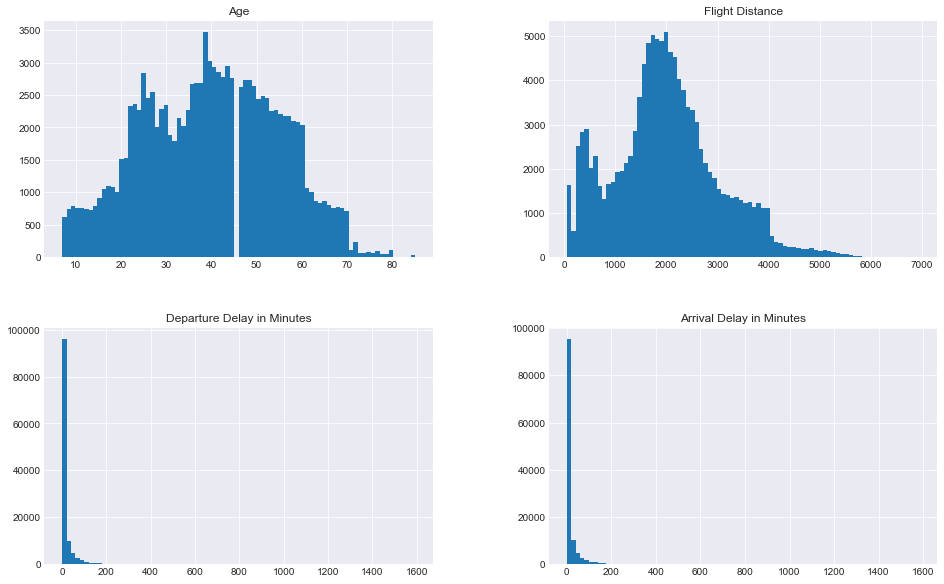

In [22]:
df_numeric.hist(bins=80, figsize=(16,10))
plt.show()

In [23]:
# group the 'Age'-feature into age groups instead of using age as a continuous variable
bins= [0,13,20,30,40,50,60,70,110]
labels = ['Kid','Teen','20s','30s','40s','50s','60s','Senior']

# create a new feature in df_categorical and df called "Age Group" and make the type an object
df_categorical['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False).astype('object')
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False).astype('object')

# drop 'Age' from df_numeric and df
df_numeric.drop('Age', axis=1, inplace=True)
df.drop('Age', axis=1, inplace=True)

### 1.3.1 Pearson correlation for the numerical features

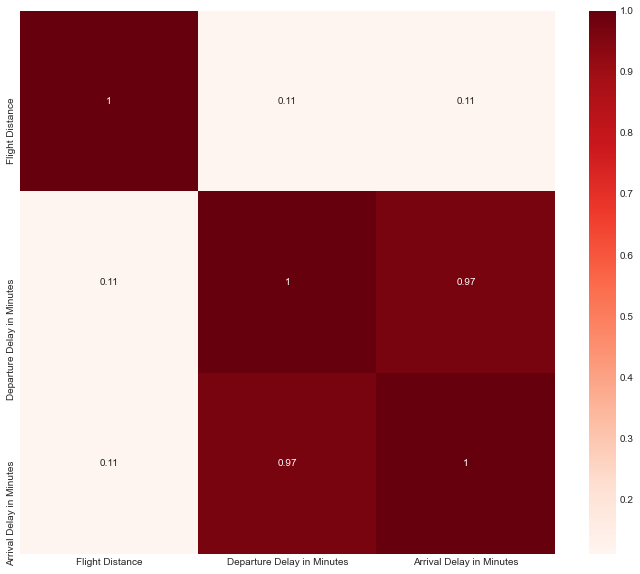

In [24]:
plt.figure(figsize=(12,10))
pearson_corr = round(df_numeric.corr(),2)
sns.heatmap(pearson_corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [25]:
# to ease the sorting return absolute value from numeric_corr
pearson_corr_abs = pearson_corr.abs().unstack()
# show features with a correlation that is equal to or above 0.75
# choose < 1 to avoid printing "noise" from the diagonal line with 1's
pearson_corr_abs_sort = pearson_corr_abs[np.logical_and(pearson_corr_abs < 1, pearson_corr_abs >= 0.75)].sort_values(ascending = False)
pearson_corr_abs_sort

Departure Delay in Minutes  Arrival Delay in Minutes      0.97
Arrival Delay in Minutes    Departure Delay in Minutes    0.97
dtype: float64

### Comment - Numerical correlation
If two features have a correlation with each other that is equal to or above 0.75, delete one of the two features because they are considered to be very similar. 

In [26]:
# delete the 'Arrival Delay in Minutes' feature  
df_numeric.drop('Arrival Delay in Minutes', axis=1, inplace=True)
df.drop('Arrival Delay in Minutes', axis=1, inplace=True)

### 1.3.2 Cramer's V association for the categorical features

Pearson correlation coefficient is used for numerical features and can show both positive and negative correlation. For categorical features you don’t check the correlation instead you check the association between features. Meaning you don’t get information if the relationship between categorical features are positive or negative, just that there is a relationship/association between them. 
<br>One way to check the association for categorical features is to use the chi-squared test, that is if you only compare two features i.e. it's a 2x2 contingency table. To compare the association between more than two features the Cramer’s V is often used to explain the categorical association. Cramer’s V is based on chi-squared (it’s used to calculate Cramer's V squared phi coefficient) hence as explained regarding the difference between correlation and association Cramer’s V only shows positive association values.</br> 

With inspiration from this published article:  ‘Alternatives to P value: Confidence interval and effect size’ - https://www.researchgate.net/figure/Interpretation-of-PH-in-Chi-statistics-or-Cramers-V_tbl2_311335682 I decide to set the cut-off value for to strong association at 0.60 

In [27]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119255 entries, 0 to 119254
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Gender                             119255 non-null  object
 1   Customer Type                      119255 non-null  object
 2   Type of Travel                     119255 non-null  object
 3   Class                              119255 non-null  object
 4   Baggage handling                   119255 non-null  object
 5   Inflight wifi service              119255 non-null  object
 6   Online support                     119255 non-null  object
 7   Departure/Arrival time convenient  119255 non-null  object
 8   Ease of Online booking             119255 non-null  object
 9   Gate location                      119255 non-null  object
 10  Food and drink                     119255 non-null  object
 11  Online boarding                    119255 non-null  

In [28]:
# label encode the categorical features
cramers_v_enc_corr = preprocessing.LabelEncoder()
cramers_v_corr_encoded = pd.DataFrame()

for i in df_categorical.columns:
  cramers_v_corr_encoded[i]=cramers_v_enc_corr.fit_transform(df_categorical[i].astype(str))

In [29]:
# a function that calculates the Cramer's V between the categorical features
from scipy.stats import chi2_contingency

def cramers_V(var1,var2) :
    crosstab = np.array(pd.crosstab(var1, var2, rownames=None, colnames=None)) # crosstab/contingency table, displays the frequency distribution of the features
    chi2 = chi2_contingency(crosstab)[0] # chi-square test of independence of the features 
    n = np.sum(crosstab)
    phi2 = chi2 / n # calculate the phi coefficient
    r, c = crosstab.shape # number of rows and columns
    
    # bias correction, to avoid overestimate the strength of association
    phi2corr = max(0, phi2 - ((c-1)*(r-1))/(n-1)) 
    rcorr = r - ((r-1)**2)/(n-1) 
    ccorr = c - ((c-1)**2)/(n-1) 

    return np.sqrt(phi2corr / min((ccorr-1), (rcorr-1)))

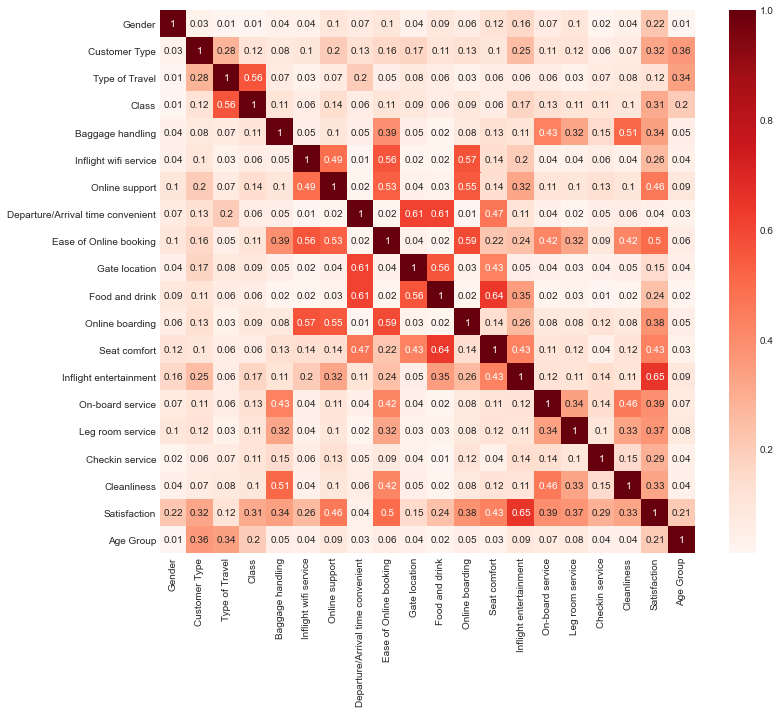

In [30]:
rows = [] # create empty list

for var1 in cramers_v_corr_encoded:
  col = [] 
  for var2 in cramers_v_corr_encoded:
    cramers_v = cramers_V(cramers_v_corr_encoded[var1], cramers_v_corr_encoded[var2]) # Cramer's V test
    col.append(round(cramers_v,2)) # append rounded value (two decimal places)  
  rows.append(col) 

# tabulating the Cramer's V   
cramers_v_corr = pd.DataFrame(np.array(rows), columns = cramers_v_corr_encoded.columns, index = cramers_v_corr_encoded.columns)

plt.figure(figsize=(12,10))
sns.heatmap(cramers_v_corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [31]:
cramers_v_corr_unstack = cramers_v_corr.unstack()
# show features with a association that is equal to or above 0.60
# choose < 1 to avoid printing "noise" from the diagonal line with 1's
cramers_v_corr_sort = cramers_v_corr_unstack[np.logical_and(cramers_v_corr_unstack < 1, cramers_v_corr_unstack >= 0.6)].sort_values(ascending = False)
cramers_v_corr_sort

Inflight entertainment             Satisfaction                         0.65
Satisfaction                       Inflight entertainment               0.65
Food and drink                     Seat comfort                         0.64
Seat comfort                       Food and drink                       0.64
Departure/Arrival time convenient  Gate location                        0.61
                                   Food and drink                       0.61
Gate location                      Departure/Arrival time convenient    0.61
Food and drink                     Departure/Arrival time convenient    0.61
dtype: float64

### Comment - Categorical association
If two features have a association with each other that is equal to or above 0.6, delete one of the two features because they are considered to be very similar. 

In [32]:
df_categorical.drop(['Inflight entertainment','Seat comfort', 'Departure/Arrival time convenient'], axis=1, inplace=True)
df.drop(['Inflight entertainment','Seat comfort', 'Departure/Arrival time convenient'], axis=1, inplace=True)

## 1.4 Histograms, Boxplots, Outliers and Unique values
I once again plot the histogram for the numerical features and also plot the boxplots and the kernel density estimation (KDE) to visualize outliers. Then I create a function that checks for extreme outliers. But I don't remove all extreme outliers instead I conclude that:
* The ‘Flight Distance’ outliers in not outliers but instead long flights, but to be able to answer all the rating questions truthfully you need to spend some time on the flight I therefore cut the minimum flight distance to 200 miles (322 kilometers) and remove all instances from the df with an ‘Flight Distance value lower than 200   
* For the ‘Departure Delay in Minutes’ feature it’s also hard to say what’s an outlier or not but I conclude that a person traveling with an airline in the US should maximum be delayed 12 hours before he/she is either in the air or rebooked on another flight. Hence I set the maximum value to 720 (12*60 minutes) and remove all instances from the df with an ‘Departure Delay in Minutes’ higher than 720  

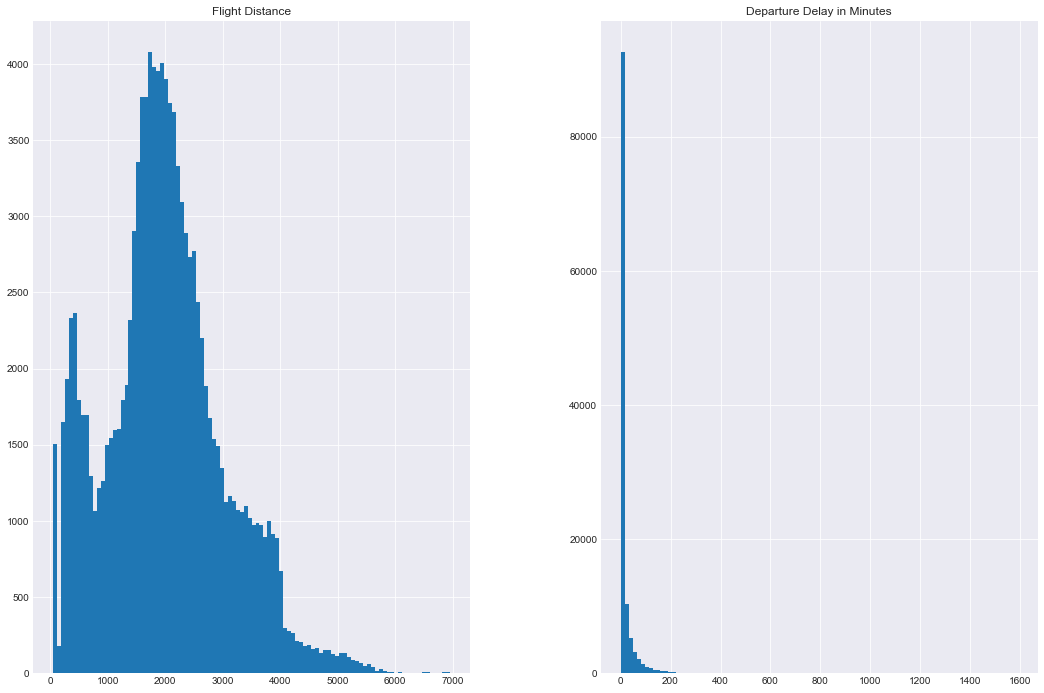

In [33]:
# plot histogram
df_numeric.hist(bins=100, figsize=(18,12))
plt.show()

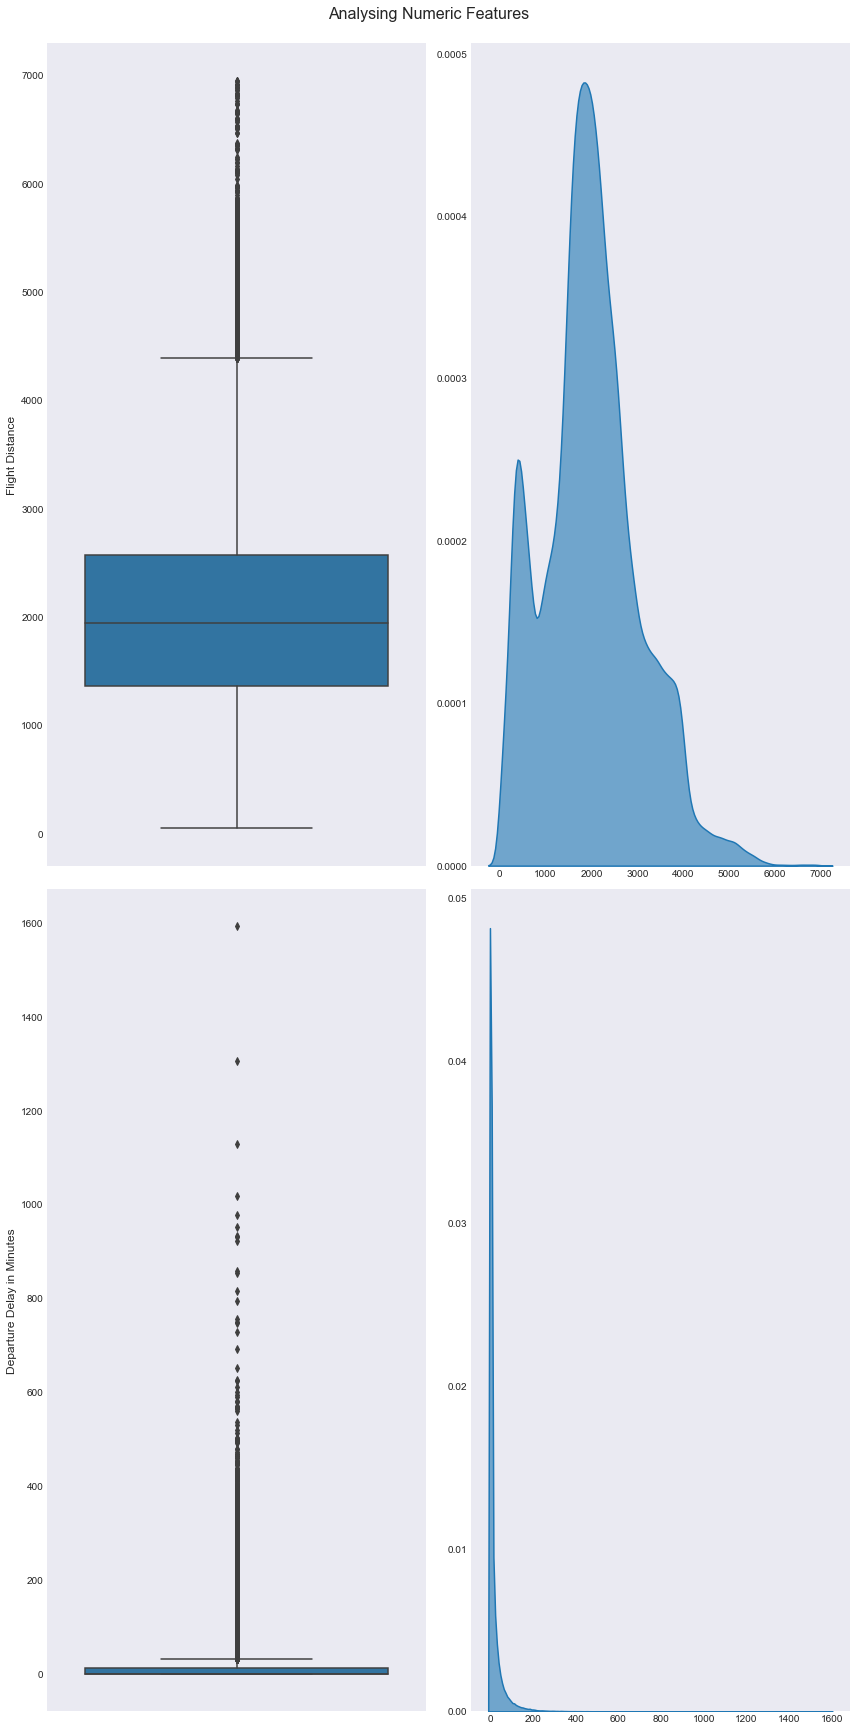

In [34]:
# plot boxplots and kernel density estimation (KDE)
fig, ax3 = plt.subplots(2, 2, figsize = (12, 24))
for i, num_var in enumerate(df_numeric):
    sns.boxplot(y = num_var, data = df_numeric, ax = ax3[i][0])

    sns.kdeplot(x = num_var, data = df_numeric, ax = ax3[i][1],
               fill = True, alpha = 0.6, linewidth = 1.5)
    
    ax3[i][0].set_ylabel(f"{num_var}", fontsize = 12)
    ax3[i][0].set_xlabel(None)
    ax3[i][1].set_xlabel(None)
    ax3[i][1].set_ylabel(None)

fig.suptitle('Analysing Numeric Features', fontsize = 16, y = 1)
plt.tight_layout()

In [35]:
# create and function to detect extreme outliers (3 x IQR more extreme than the first and third quartiles.)
def outer_fences_outlier_values(data):
    cc = 0     # column counter
    olc = 0    # columns with outer fences outlier values counter 
    for i in data.columns: 
        IQR = np.quantile(data[i], 0.75) - np.quantile(data[i], 0.25)       
        outlier = np.logical_or(data[i] < (np.quantile(data[i], 0.25) - (IQR * 3)), data[i] > np.quantile(data[i], 0.75) + (IQR * 3))
        num_outlier = outlier.sum()
        pct_outlier = outlier.mean()*100 
        cc = cc + 1
    
        if num_outlier > 0:
            print(f'Column with outlier-value: {i:26} {num_outlier:8} outliers {pct_outlier:8.3f}% of the values is outliers')
            olc = olc + 1
        
        if cc == len(data.columns) and olc == 0:
            print(f'No outlier values (checked {cc} columns out of {len(data.columns)} columns)')

In [36]:
outer_fences_outlier_values(df_numeric)

Column with outlier-value: Flight Distance                  49 outliers    0.041% of the values is outliers
Column with outlier-value: Departure Delay in Minutes    10261 outliers    8.604% of the values is outliers


In [37]:
# check the mean, std and percentile of the numerical features
df_numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
Flight Distance,119255.0,1994.709144,1038.057310,50.0,1359.0,1941.0,2571.0,6951.0
Departure Delay in Minutes,119255.0,14.824552,38.158017,0.0,0.0,0.0,12.5,1592.0


In [38]:
# keep all instances from the df with an ‘Flight Distance value higher than or equal to 200
df = df[df['Flight Distance'] >= 200]
# keep all instances from the df with an ‘Departure Delay in Minutes’ lower than or equal to 720 
df = df[df['Departure Delay in Minutes'] <= 720]

### 1.4.1 Unique values categorical features

Avoiding unique values with a low value count is preferable when you are conducting tree-based learning as I do when I use the XGBoost classifier. Otherwise the trees have to work harder to split the data. This is simply because the more unique values in the feature, the more splits the tree has to make to separate the data. 
This effect is most apparent with the max depth hyperparameters that I’m going to tune later on since it controls how far the data can be split. Any increase in the max depth value will in turn increase model training time. I want my model to be fast both through feature selection and hyperparameter tuning. Hence I check the minimum value count for every categorical feature i.e. how many times is the least popular unique value in each feature set 

In this case a unique values with a low value count is not a problem as can be seen below

In [39]:
# number of times the least popular value in each categorical feature appear 
for i in df_categorical:
    print(f'{i:33} {df[i].value_counts().min():6}')

Gender                             58353
Customer Type                      19178
Type of Travel                     36326
Class                               8639
Baggage handling                    6680
Inflight wifi service              13048
Online support                     12196
Ease of Online booking             11617
Gate location                      17868
Food and drink                     19204
Online boarding                    13622
On-board service                   11843
Leg room service                    9752
Checkin service                    14000
Cleanliness                         6568
Satisfaction                       54227
Age Group                           1562


## 1.5. Encoding and create train and test sets

In [40]:
# convert the values in the target variable to binary
df.Satisfaction = df.Satisfaction.map({'satisfied':1, 'neutral or dissatisfied':0})
df = df.reset_index(drop=True)

In [41]:
# one-hot encode the categorical features
categorical_to_encode = df.select_dtypes(include='object')
categorical_encoded = pd.get_dummies(categorical_to_encode)

In [42]:
# scale the numerical features through standardization to ease the GLM classifier's regularization 
scalar = StandardScaler()
to_scale = df.select_dtypes(include='int64') 
to_scale = to_scale.drop(['Satisfaction'],axis=1)
numeric_scaled = pd.DataFrame(scalar.fit_transform(to_scale), columns = to_scale.columns)

In [43]:
# create the predict and target variables
X = pd.concat([numeric_scaled, categorical_encoded], axis = 1)
y = df.Satisfaction

In [44]:
# create train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y, shuffle=True)

# 2. GLM - Logistic regression

Generalized Linear Models (GLM) is an extension of the linear regression model used when one of the assumptions of the linear model is violated, ex. the outcome from the features might have a non-Gaussian distribution and instead be categorical. One GLM is Logistic Regression, it models the probabilities for classification problems with binary outcomes, hence it’s an extension of the linear regression model for classification problems. 

Instead of fitting a straight line or hyperplane, the logistic regression model uses the logistic function to squeeze the output of a linear equation between 0 and 1, therefore the coefficient weights do not influence the probability linearly any longer. The weighted sum is transformed by the logistic function to a probability through the logit (log-odds) function. 
<br>You can also use the log-odds function to get features odds ratio by in simple terms take the exponential of the features weight and you get the odds ratio. That's why I display the coefficients for both the features weight and odds ratio after each logistic regression classifier in this step of the notebook.</br> 


The steps for doing this GLM model is roughly as follows:

I use sklearn's Logistic Regression CV classifier with:

1.1. k-fold (k = 5 in my case) cross-validation on the training data. 

1.2. As mentioned in the data preparation step I want my model to be fast through feature selection hence I chose Lasso Regression (L1) regularization technique instead of Ridge Regression (L2) regularization technique as penalty term because Lasso Regression can shrink coefficients to zero which help a bit more with feature selection since if a feature coefficient is zero that feature do not affect the model at all. 

1.3 Log loss (named ‘neg_log_loss’ in sklearn scoring) is chosen as scoring for the cross-validation since I’m going to compare the logistic regression model with the stacked model I want the best possible probability estimates and Log loss is a good choice because it punishes probability estimates when these are wrong and the more confident but wrong a prediction is the harsher the log loss penalises that prediction   

1.4. I use the liblinear algorithm as solver since it’s good for small datasets and it can be used with L1 regularization  

1.5. Verbose is set to true so I get some information from the models' different steps and n-jobs is set to -1 so that I use all available CPUs. random_state is set to RANDOM_STATE for reproducibility and max_iter to 10 000 iterations so I’m sure the model converges. 

1.6. Fit X_train and y_train to the classifier


In [45]:
# create classifier and fit X_train, y_train 
clf_glm_1 = LogisticRegressionCV(cv=5, penalty='l1', scoring='neg_log_loss', solver = 'liblinear', verbose=True, n_jobs=-1, random_state=RANDOM_STATE, max_iter=10000).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   25.5s finished


In [46]:
# a report showing the main classification metrics
glm_class_rep_1 = metrics.classification_report(y_test, clf_glm_1.predict(X_test))
print(glm_class_rep_1)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84     10846
           1       0.86      0.86      0.86     12665

    accuracy                           0.85     23511
   macro avg       0.85      0.85      0.85     23511
weighted avg       0.85      0.85      0.85     23511



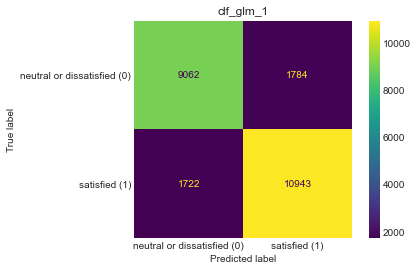

[[ 9062  1784]
 [ 1722 10943]]


In [47]:
# ploted confusion matrix 
ploted_glm_confu_matrix_1 = metrics.plot_confusion_matrix(clf_glm_1, X_test, y_test, values_format='d', display_labels=['neutral or dissatisfied (0)','satisfied (1)'])
plt.title('clf_glm_1')
plt.show()

# confusion matrix 
glm_confu_matrix_1 = metrics.confusion_matrix(y_test, clf_glm_1.predict(X_test))
print(glm_confu_matrix_1)

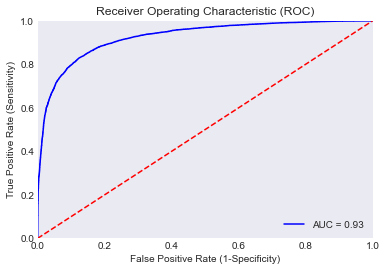

In [48]:
# ROC and AUC
glm_fpr_1, glm_tpr_1, glm_threshold_1 = metrics.roc_curve(y_test, clf_glm_1.predict_proba(X_test)[:,1]) 
glm_roc_auc_1 = metrics.auc(glm_fpr_1, glm_tpr_1)

plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(glm_fpr_1, glm_tpr_1, 'b', label='AUC = %0.2f' % glm_roc_auc_1)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.show()

### 2.0.1 Odds ratio 'Food and drink_5.0' 

Interpretation of feature “Food and drink_5.0”: For respondents that gave the food and drink on the flight a rating of 5, the odds for them also giving the y variable “Satisfaction” the value satisfied/1 are by a factor of 13.48 higher, compared to respondents that did not give the food and drink on the flight a rating of 5, given all other features stay the same. 

I.e. If someone gives the food and drink on the flight a rating of 5, the odds are high that the person also chooses satisfied for the satisfaction feature (given all other features stay the same).   

In [49]:
# weight and odds ratio for each feature in the clf_glm_1 classifier 
# showing top and bottom 5 features ordered by odds ratio
glm_coef_1=pd.DataFrame({'Feature':(X_test.columns),'Weight':[(i) for i in (clf_glm_1.coef_[0])],'Odds ratio':[(i) for i in np.exp(clf_glm_1.coef_[0])]})
glm_coef_1.sort_values('Odds ratio',ascending=False)

,Feature,Weight,Odds ratio
40,Food and drink_5.0,2.601478,13.483656
39,Food and drink_4.0,0.979213,2.662360
25,Online support_5.0,0.777596,2.176235
55,Leg room service_5.0,0.749257,2.115427
29,Ease of Online booking_4.0,0.721854,2.058246
...,...,...,...
7,Type of Travel_Personal Travel,-1.181792,0.306728
23,Online support_3.0,-1.332693,0.263766
26,Ease of Online booking_1.0,-1.350089,0.259217
35,Gate location_5.0,-1.450084,0.234551


## 2.1 Recursive Feature Elimination (RFE)

It’s now time to do some feature selection for the logistic regression model and for that I use the recursive feature elimination (RFE) algorithm. RFE is a type of wrapper method that uses backward elimination, i.e. starts with the full training set of features and at each iteration/step, it removes the worst feature(s) remaining in the set. 

For Logistic regression, RFE uses the features coefficient to determine the ranking of the features performance and stops either when a specified number of features is reached or the more common approach since it is often not known in advance how many features are actually useful, cross-validation is used to find the optimal number of features with RFE and it score different feature subsets and select the best scoring collection of features.

Hence I use RFECV with folds = 5 (cv=5) that removes 1 feature at each iteration (step=1), choose to select that (if the RFEECV reach that far) I want to keep a minimum of 10 features (min_features_to_select=10), and want the cross-validation to use log loss as scoring method. Plus I set verbose = True so that I can interpret the output from the RFECV    


In [50]:
rfecv = RFECV(
    estimator=LogisticRegression(penalty='l1', solver='liblinear', verbose=True, random_state=RANDOM_STATE, max_iter=10000),
    n_jobs=-1,
    cv=5,
    step=1,
    min_features_to_select=10,
    scoring='neg_log_loss',
    verbose=True,
)

rfecv = rfecv.fit(X_train, y_train)

print(rfecv.support_)
print(rfecv.ranking_)
X_train.columns[rfecv.support_]

Fitting estimator with 74 features.
[LibLinear]Fitting estimator with 73 features.
[LibLinear]Fitting estimator with 72 features.
[LibLinear]Fitting estimator with 71 features.
[LibLinear]Fitting estimator with 70 features.
[LibLinear]Fitting estimator with 69 features.
[LibLinear]Fitting estimator with 68 features.
[LibLinear]Fitting estimator with 67 features.
[LibLinear]Fitting estimator with 66 features.
[LibLinear]Fitting estimator with 65 features.
[LibLinear]Fitting estimator with 64 features.
[LibLinear]Fitting estimator with 63 features.
[LibLinear]Fitting estimator with 62 features.
[LibLinear]Fitting estimator with 61 features.
[LibLinear][LibLinear][LibLinear][ True  True  True  True  True  True  True  True  True  True False  True
 False  True False  True  True  True False  True  True  True  True  True
 False  True  True  True False  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True False  True  True  True
 False  True  True  True  Tr

Index(['Flight Distance', 'Departure Delay in Minutes', 'Gender_Female',
       'Gender_Male', 'Customer Type_Loyal Customer',
       'Customer Type_disloyal Customer', 'Type of Travel_Business travel',
       'Type of Travel_Personal Travel', 'Class_Business', 'Class_Eco',
       'Baggage handling_1', 'Baggage handling_3', 'Baggage handling_5',
       'Inflight wifi service_1.0', 'Inflight wifi service_2.0',
       'Inflight wifi service_4.0', 'Inflight wifi service_5.0',
       'Online support_1.0', 'Online support_2.0', 'Online support_3.0',
       'Online support_5.0', 'Ease of Online booking_1.0',
       'Ease of Online booking_2.0', 'Ease of Online booking_4.0',
       'Ease of Online booking_5.0', 'Gate location_1.0', 'Gate location_2.0',
       'Gate location_4.0', 'Gate location_5.0', 'Food and drink_1.0',
       'Food and drink_2.0', 'Food and drink_3.0', 'Food and drink_4.0',
       'Food and drink_5.0', 'Online boarding_1.0', 'Online boarding_2.0',
       'Online boarding_3

In [51]:
# the features to keep after feature selection with RFE   
print(X_train.columns[rfecv.support_]) 
print(f'{len(X_train.columns[rfecv.support_])} features in total') #60 features

Index(['Flight Distance', 'Departure Delay in Minutes', 'Gender_Female',
       'Gender_Male', 'Customer Type_Loyal Customer',
       'Customer Type_disloyal Customer', 'Type of Travel_Business travel',
       'Type of Travel_Personal Travel', 'Class_Business', 'Class_Eco',
       'Baggage handling_1', 'Baggage handling_3', 'Baggage handling_5',
       'Inflight wifi service_1.0', 'Inflight wifi service_2.0',
       'Inflight wifi service_4.0', 'Inflight wifi service_5.0',
       'Online support_1.0', 'Online support_2.0', 'Online support_3.0',
       'Online support_5.0', 'Ease of Online booking_1.0',
       'Ease of Online booking_2.0', 'Ease of Online booking_4.0',
       'Ease of Online booking_5.0', 'Gate location_1.0', 'Gate location_2.0',
       'Gate location_4.0', 'Gate location_5.0', 'Food and drink_1.0',
       'Food and drink_2.0', 'Food and drink_3.0', 'Food and drink_4.0',
       'Food and drink_5.0', 'Online boarding_1.0', 'Online boarding_2.0',
       'Online boarding_3

In [52]:
# keep only the features from rfecv (60 features)
X_train = X_train.loc[:, rfecv.support_]
X_test = X_test.loc[:,rfecv.support_]

### Comment - Logistic Regression classifiers
Having completed the feature selection, the same steps as for the first classifier clf_glm_1 is now done on a new classifier clf_glm_2. I also (where needed) compare the two classifiers against each other.

In [53]:
clf_glm_2 = LogisticRegressionCV(cv=5, penalty='l1', scoring='neg_log_loss', solver = 'liblinear', verbose=True, n_jobs=-1, random_state = RANDOM_STATE, max_iter=10000).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   22.0s finished


In [54]:
# the two classifiers classification metrics
glm_class_rep_2 = metrics.classification_report(y_test, clf_glm_2.predict(X_test))
print('glm_class_rep_2:')
print(glm_class_rep_2)
print('glm_class_rep_1:')
print(glm_class_rep_1)

glm_class_rep_2:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84     10846
           1       0.86      0.86      0.86     12665

    accuracy                           0.85     23511
   macro avg       0.85      0.85      0.85     23511
weighted avg       0.85      0.85      0.85     23511

glm_class_rep_1:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84     10846
           1       0.86      0.86      0.86     12665

    accuracy                           0.85     23511
   macro avg       0.85      0.85      0.85     23511
weighted avg       0.85      0.85      0.85     23511



In [55]:
# the two classifiers confusion matrix 
glm_confu_matrix_2 = metrics.confusion_matrix(y_test, clf_glm_2.predict(X_test))
print('glm_confu_matrix_2:')
print(glm_confu_matrix_2,)
print('\nglm_confu_matrix_1:')
print(glm_confu_matrix_1)

glm_confu_matrix_2:
[[ 9062  1784]
 [ 1715 10950]]

glm_confu_matrix_1:
[[ 9062  1784]
 [ 1722 10943]]


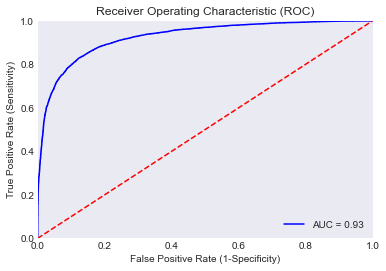

In [56]:
# ROC and AUC
glm_fpr_2, glm_tpr_2, glm_threshold_2 = metrics.roc_curve(y_test, clf_glm_2.predict_proba(X_test)[:,1]) 
glm_roc_auc_2 = metrics.auc(glm_fpr_2, glm_tpr_2)

plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(glm_fpr_2, glm_tpr_2, 'b', label='AUC = %0.2f' % glm_roc_auc_2)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.show()

### 2.1.1 Compare AUC, Logistic regression 

The contribution from the other features that was removed by the RFE made little difference to the projects main evaluation metric AUC since it’s still on a high 0.92 value, but the classifier converges faster when the the classifier clf_glm_2 only use 59 features instead of 74 features. 

In [57]:
# compare the two classifiers AUC 
print('AUC clf_glm_2:', glm_roc_auc_2)
print('AUC clf_glm_1:',glm_roc_auc_1)

AUC clf_glm_2: 0.9260747984615249
AUC clf_glm_1: 0.9260875746799083


### Comment - Cut off thresholds 
Since AUC evaluates the classifier over all possible thresholds (while a fixed threshold is used when evaluating with the confusion matrix) I construct a function “prediction_certainty” with two graphs, one for each binary value in the target variable. The graphs are particularly helpful for two reasons:
1. They show the relationship between the different prediction cut off values and the corresponding True Positive, False Positive, True Negative and False Negative-rates. In connection with the AUC score I can easier interpret what cut off value to choose for 1 and still keep a high True Positive Rate by e.g. I want a minimum True Positive Rate of 0.9 the cut off value of 1 is then 0.4 which means the cut off value for 0 is 0.6 (1-0.4) and the corresponding False Positive Rate is 0.12. This is a more interpretable way than looking at the ROC curve which displays the same True Positive and False Positive rates.


2. I get the prediction certainty for different prediction cut off values in connection with True Positive Rate and True Negative Rate, hence I can choose the cut-off values for 1 and 0 that maximize the classifier to correctly classify 1 as 1’s and 0 as 0’s.

Keep in mind though that the choice of which ratio to tolerate for the four different rates is purely a business decision. What rate that is most important to maximize or minimize varies between organizations and situations.


In [58]:
def prediction_certainty(y_true, y_proba):
    actual_0 = len(y_true[y_true == 0])
    actual_1 = len(y_true[y_true == 1])

    interval = np.linspace(0,1,11)
    interval_list_0 = np.repeat(0.0, 11)
    interval_list_1 = np.repeat(0.0, 11)

    for i in range(len(interval_list_0)):
        interval_list_0[i] = round(np.logical_and(y_true == 0, y_proba[:,0] <= interval[i]).sum() / actual_0, 4)
    for i in range(len(interval_list_1)):
        interval_list_1[i] = round(np.logical_and(y_true == 1, y_proba[:,1] < interval[i]).sum() / actual_1, 4)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    fig.tight_layout(pad=5)
    fig.suptitle('Prediction Certainty', fontsize=16)
    ax1.plot(interval,interval_list_0, 'm.-'), ax2.plot(interval,interval_list_1, 'c.-')

    number_ticks = np.arange(0, 1.0001, step=0.1)
    clean_ticks = np.arange(0, 1.0001, step=0.05)

    ax1.set(xlim = [0, 1], xticks=number_ticks, yticks=number_ticks,
    xlabel = "Maximum cut off value for setting prediction to 0", ylabel = 'False Positive Rate')
    ax2.set(xlim = [0, 1], xticks=number_ticks, yticks=number_ticks,
    xlabel = "Maximum cut off value for setting prediction to 1", ylabel = 'False Negative Rate')
    
    ax1.set_ylim(bottom=0, top=1), ax2.set_ylim(bottom=0, top=1)
    ax1.set_xticks(clean_ticks, minor=True), ax1.set_yticks(clean_ticks, minor=True)
    ax2.set_xticks(clean_ticks, minor=True), ax2.set_yticks(clean_ticks, minor=True)
    ax1.grid(which='minor', alpha=0.2), ax1.grid(which='major', alpha=0.5)
    ax2.grid(which='minor', alpha=0.2), ax2.grid(which='major', alpha=0.5)

    ax1_1 = ax1.twinx()
    ax2_1 = ax2.twinx()
    ax1_1.set_yticks(clean_ticks, minor=True),ax2_1.set_yticks(clean_ticks, minor=True)
    ax1_1.set_ylim(bottom=1, top=0),ax2_1.set_ylim(bottom=1, top=0)
    ax1_1.set(yticks=(np.arange(1.0, -0.1,-0.1)), ylabel = 'True Negative Rate')
    ax2_1.set(yticks=(np.arange(1.0, -0.1,-0.1)), ylabel = 'True Positive Rate')

    return plt.show()

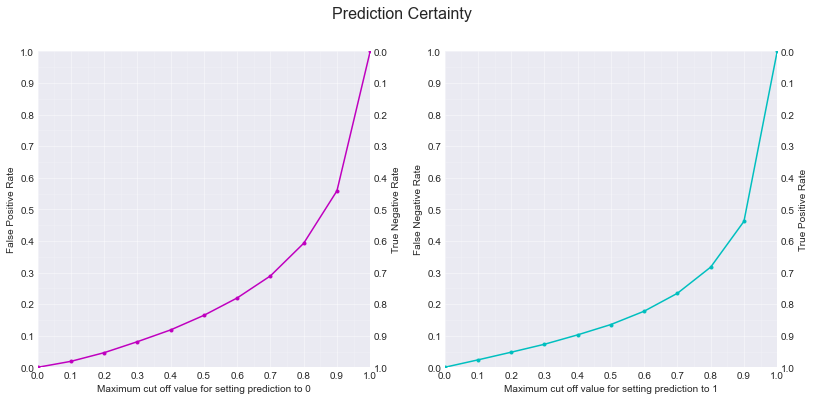

In [59]:
glm_prediction_certainty = prediction_certainty(y_test, clf_glm_2.predict_proba(X_test))
glm_prediction_certainty

In [60]:
# weight and odds ratio for each feature in the clf_glm_2 classifier 
# ordered by odds ratio
glm_coef_2=pd.DataFrame({'Feature':(X_test.columns),'Weight':[(i) for i in (clf_glm_2.coef_[0])],'Odds ratio':[(i) for i in np.exp(clf_glm_2.coef_[0])]})
glm_coef_2.sort_values('Odds ratio',ascending=False)

,Feature,Weight,Odds ratio
33,Food and drink_5.0,2.014476,7.496796
20,Online support_5.0,0.781603,2.184971
8,Class_Business,0.745626,2.107760
2,Gender_Female,0.726068,2.066937
41,On-board service_5.0,0.702648,2.019093
6,Type of Travel_Business travel,0.679033,1.971970
49,Checkin service_5.0,0.668623,1.951549
23,Ease of Online booking_4.0,0.634749,1.886549
37,Online boarding_5.0,0.546067,1.726450
12,Baggage handling_5,0.493401,1.637877


# 3. XGBoost

It’s time for the other model Extreme Gradient Boosting (XGBoost), XGBoost is a decision-tree-based ensemble model. 

I have done a detailed description of both XGBoost and its hyperparameter tuning with Bayesian optimization in my other project ‘churn-hotel-xgboost-alibi’ so I don’t focus on describing these two subjects as much in this project. I have instead made sure to thoroughly comment in the cells regarding XGBoost and Bayesian optimization. 

If you still want to read what I have wrote about the XGBoost ensemble model and hyperparameter tuning with Bayesian optimization here’s the link to my other project: https://github.com/lennartwallentin/churn-hotel-xgboost-alibi/blob/main/churn_xgboost_alibi_lennart_wallentin.ipynb     

In [61]:
# restore train and test sets for XGBoost modeling 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y, shuffle=True)

In [62]:
# cast the train partition to dmatrix
dmatrix_1 = xgb.DMatrix(X_train, y_train)

In [63]:
# set XGBoost parameters
params = {
    'booster' : 'gbtree', 
    'objective' : 'binary:logistic', 
    'eval_metric': 'logloss', 
    'seed': RANDOM_STATE 
    }

In [64]:
# preform a cross-validation to approximate the preferable n_estimator (optimal number of boosting rounds) for the XGBoost classifier
xgb_cv_1 = xgb.cv(dtrain=dmatrix_1, params=params, nfold=5,
                    num_boost_round=500, early_stopping_rounds=10, verbose_eval=True, seed=RANDOM_STATE, shuffle=False)

[0]	train-logloss:0.53851+0.00111	test-logloss:0.53888+0.00124
[1]	train-logloss:0.43421+0.00108	test-logloss:0.43492+0.00126
[2]	train-logloss:0.37491+0.00340	test-logloss:0.37611+0.00354
[3]	train-logloss:0.32706+0.00393	test-logloss:0.32853+0.00438
[4]	train-logloss:0.29426+0.00359	test-logloss:0.29598+0.00488
[5]	train-logloss:0.26902+0.00252	test-logloss:0.27101+0.00314
[6]	train-logloss:0.25157+0.00286	test-logloss:0.25388+0.00417
[7]	train-logloss:0.23658+0.00209	test-logloss:0.23930+0.00429
[8]	train-logloss:0.22527+0.00236	test-logloss:0.22856+0.00449
[9]	train-logloss:0.21585+0.00195	test-logloss:0.21957+0.00459
[10]	train-logloss:0.20721+0.00193	test-logloss:0.21123+0.00467
[11]	train-logloss:0.20146+0.00162	test-logloss:0.20609+0.00474
[12]	train-logloss:0.19654+0.00122	test-logloss:0.20157+0.00453
[13]	train-logloss:0.19177+0.00077	test-logloss:0.19726+0.00364
[14]	train-logloss:0.18795+0.00134	test-logloss:0.19393+0.00367
[15]	train-logloss:0.18519+0.00123	test-logloss:0.

<function matplotlib.pyplot.show(close=None, block=None)>

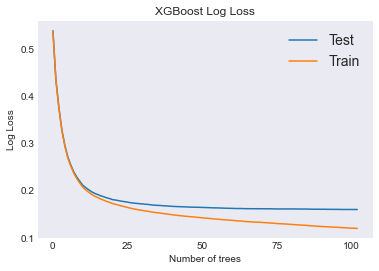

In [65]:
# plot the cross-validation log loss (early_stopping_rounds set to 10)
plt.plot(xgb_cv_1.index, xgb_cv_1['test-logloss-mean'], label='Test')
plt.plot(xgb_cv_1.index, xgb_cv_1['train-logloss-mean'], label='Train')
plt.xticks(np.arange(min(xgb_cv_1.index), max(xgb_cv_1.index)+1.1, 25)) 
plt.ylabel('Log Loss')
plt.xlabel('Number of trees')
plt.title('XGBoost Log Loss')
plt.legend(fontsize=14)
plt.show

In [66]:
# get the the best iteration (lowest test log loss) from xgb_cv_1, it will be used as the number of boosting rounds in the classifier
iter_best_1 = len(xgb_cv_1)
iter_best_1 #103 (0-indexed) 

103

In [67]:
# create a XGBClassifer instance and train the model. 
clf_xgb_1 = xgb.XGBClassifier(n_estimators=iter_best_1, random_state=RANDOM_STATE, use_label_encoder=False, eval_metric='logloss')
clf_xgb_1.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=103, n_jobs=12,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [68]:
# a report showing the main classification metrics
xgb_class_rep_1 = metrics.classification_report(y_test, clf_xgb_1.predict(X_test))
print(xgb_class_rep_1)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93     10846
           1       0.94      0.93      0.94     12665

    accuracy                           0.93     23511
   macro avg       0.93      0.93      0.93     23511
weighted avg       0.93      0.93      0.93     23511



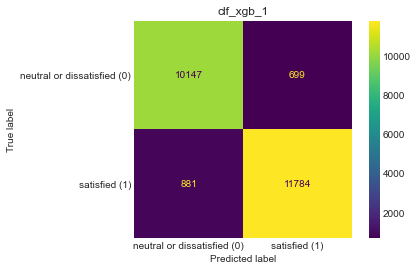

[[10147   699]
 [  881 11784]]


In [69]:
# ploted confusion matrix 
ploted_xgb_confu_matrix_1 = metrics.plot_confusion_matrix(clf_xgb_1, X_test, y_test, values_format='d', display_labels=['neutral or dissatisfied (0)','satisfied (1)'])
plt.title('clf_xgb_1')
plt.show()

# confusion matrix 
xgb_confu_matrix_1 = metrics.confusion_matrix(y_test, clf_xgb_1.predict(X_test))
print(xgb_confu_matrix_1)

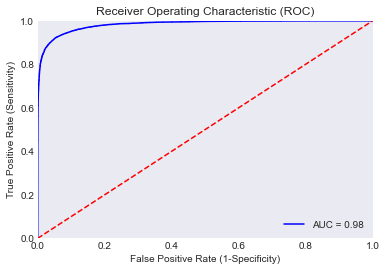

In [70]:
# ROC and AUC
xgb_fpr_1, xgb_tpr_1, xgb_threshold_1 = metrics.roc_curve(y_test, clf_xgb_1.predict_proba(X_test)[:,1]) 
xgb_roc_auc_1 = metrics.auc(xgb_fpr_1, xgb_tpr_1)

plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(xgb_fpr_1, xgb_tpr_1, 'b', label='AUC = %0.2f' % xgb_roc_auc_1)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.show()

### 3.0.1 Feature importance plot

Plot the feature importance plot. The plot is constructed by how many times a feature is used in the trees, weighted by how many observations it splits in each node. This ensures that a feature closer to the root gets a higher gain-score than a feature further from the root.

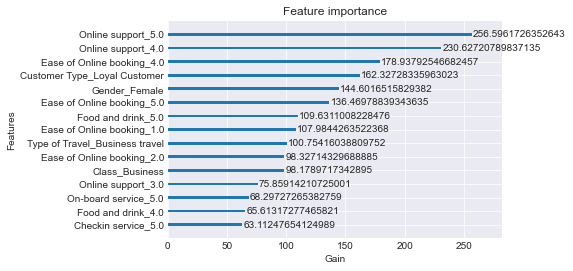

In [71]:
# importance plot showing the 15 feature with the highest gain score 
xgb.plot_importance(clf_xgb_1, max_num_features=15, importance_type = 'gain', xlabel='Gain')
plt.show()

### Comment - 'Online support'

Both “Online support_5.0” and “Online support_4.0” gets a high gain score, I investigate these features further with the preprocessed dataset df, but can’t find anything suspicious other than many people have given the Online support a high rating.

In a real project I would of course talk to stakeholders to get an even more in depth view about the "Online support" feature.

In [72]:
print(df.groupby("Online support")["Satisfaction"].value_counts().loc[5.0],'\n')
print(df.groupby("Online support")["Satisfaction"].value_counts().loc[4.0],'\n')

Satisfaction
1    25211
0     7273
Name: Satisfaction, dtype: int64 

Satisfaction
1    25905
0    12222
Name: Satisfaction, dtype: int64 



In [73]:
print(df.groupby("Online support")["Satisfaction"].value_counts())


Online support  Satisfaction
1.0             0                9056
                1                3140
2.0             0               11301
                1                4040
3.0             0               14375
                1                5030
4.0             1               25905
                0               12222
5.0             1               25211
                0                7273
Name: Satisfaction, dtype: int64


### 3.0.2 Gain score and feature selection

Gain score should be used with care (like many other feature importance measures used for feature selection). I checked the gain score for clf_xgb_1 and tried different gain score cut off values for the classifier but ended up keeping the 30 features with the highest gain score (cut almost 60% of the df’s features) for the clf_xgb_2. 

In [74]:
# Array with the 30 highest gain scores (feature names not displayed)
np.array(sorted(clf_xgb_1.get_booster().get_score(importance_type='gain').values(),reverse=True)[:30])

array([256.59617264, 230.6272079 , 178.93792547, 162.32728336,
       144.60165158, 136.46978839, 109.63110082, 107.98442635,
       100.75416039,  98.3271433 ,  98.17897173,  75.85914211,
        68.29727265,  65.61317277,  63.11247654,  57.65109063,
        46.36088727,  45.94415079,  44.43288579,  40.75658664,
        35.99972624,  34.83081035,  31.94106393,  29.75692305,
        27.67741108,  25.37583952,  24.2768383 ,  19.85072496,
        19.42845261,  16.87915814])

In [75]:
# the feature names of the features I keep, and their corresponding gain score
sorted(clf_xgb_1.get_booster().get_score(importance_type='gain').items(), key=lambda item: item[1], reverse=True)[:30]

[('Online support_5.0', 256.5961726352643),
 ('Online support_4.0', 230.62720789837135),
 ('Ease of Online booking_4.0', 178.93792546682457),
 ('Customer Type_Loyal Customer', 162.32728335963023),
 ('Gender_Female', 144.6016515829382),
 ('Ease of Online booking_5.0', 136.46978839343635),
 ('Food and drink_5.0', 109.6311008228476),
 ('Ease of Online booking_1.0', 107.9844263522368),
 ('Type of Travel_Business travel', 100.75416038809752),
 ('Ease of Online booking_2.0', 98.32714329688885),
 ('Class_Business', 98.1789717342895),
 ('Online support_3.0', 75.85914210725001),
 ('On-board service_5.0', 68.29727265382759),
 ('Food and drink_4.0', 65.61317277465821),
 ('Checkin service_5.0', 63.11247654124989),
 ('Online boarding_5.0', 57.6510906277778),
 ('Baggage handling_5', 46.3608872699191),
 ('Leg room service_4.0', 45.94415078978288),
 ('Leg room service_5.0', 44.43288578518919),
 ('Baggage handling_3', 40.756586636020835),
 ('Online boarding_2.0', 35.99972624055675),
 ('Cleanliness_5.0'

In [76]:
# the percentage (%) by features that I keep in the model
(30/len(dmatrix_1.feature_names))*100

40.54054054054054

In [77]:
# get the gain scores from clf_xgb_1, sort in descending order, and keep 40.5 % of the features   
gain_score = clf_xgb_1.get_booster().get_score(importance_type='gain')
gain_score_df = pd.DataFrame.from_dict(gain_score, orient='index', columns = ['gain']).gain.sort_values(ascending=False)
features_keep = gain_score_df.iloc[:30]

In [78]:
# keep only the features with the top 40.5 % highest gain scores 
X_train = X_train.loc[:,X_train.columns.isin(features_keep.index)]
X_test = X_test.loc[:,X_test.columns.isin(features_keep.index)]

### Comment - XGBoost classifiers
Having completed the feature selection, the same steps as for the first classifier clf_xgb_1 is now done on a new classifier clf_xgb_2. I also (where needed) compare the two classifiers against each other.

In [79]:
# cast the train partition to dmatrix
dmatrix_2 = xgb.DMatrix(X_train, y_train)

In [80]:
# preform a cross-validation 
xgb_cv_2 = xgb.cv(dtrain=dmatrix_2, params=params, nfold=5,
                    num_boost_round=500, early_stopping_rounds=10, verbose_eval=True, seed=RANDOM_STATE, shuffle=False)

[0]	train-logloss:0.53858+0.00114	test-logloss:0.53879+0.00128
[1]	train-logloss:0.43511+0.00106	test-logloss:0.43561+0.00099
[2]	train-logloss:0.37666+0.00336	test-logloss:0.37745+0.00377
[3]	train-logloss:0.33211+0.00114	test-logloss:0.33342+0.00157
[4]	train-logloss:0.29926+0.00390	test-logloss:0.30042+0.00405
[5]	train-logloss:0.27442+0.00257	test-logloss:0.27600+0.00284
[6]	train-logloss:0.25587+0.00176	test-logloss:0.25791+0.00230
[7]	train-logloss:0.24170+0.00194	test-logloss:0.24403+0.00136
[8]	train-logloss:0.23056+0.00266	test-logloss:0.23312+0.00112
[9]	train-logloss:0.22051+0.00156	test-logloss:0.22362+0.00124
[10]	train-logloss:0.21324+0.00160	test-logloss:0.21642+0.00165
[11]	train-logloss:0.20624+0.00221	test-logloss:0.20975+0.00200
[12]	train-logloss:0.20126+0.00144	test-logloss:0.20512+0.00244
[13]	train-logloss:0.19698+0.00120	test-logloss:0.20104+0.00230
[14]	train-logloss:0.19397+0.00146	test-logloss:0.19839+0.00219
[15]	train-logloss:0.19034+0.00145	test-logloss:0.

<function matplotlib.pyplot.show(close=None, block=None)>

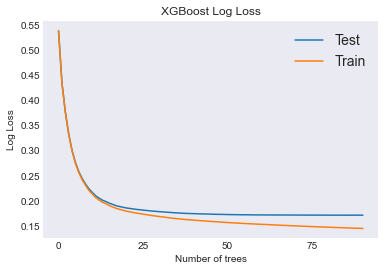

In [81]:
# plot the cross-validation log loss (early_stopping_rounds set to 10)
plt.plot(xgb_cv_2.index, xgb_cv_2['test-logloss-mean'], label='Test')
plt.plot(xgb_cv_2.index, xgb_cv_2['train-logloss-mean'], label='Train')
plt.xticks(np.arange(min(xgb_cv_2.index), max(xgb_cv_2.index)+1.1, 25)) 
plt.ylabel('Log Loss')
plt.xlabel('Number of trees')
plt.title('XGBoost Log Loss')
plt.legend(fontsize=14)
plt.show

In [82]:
# get the the best iteration 
iter_best_2 = len(xgb_cv_2)
iter_best_2 # 91 

91

In [83]:
# create classifier
clf_xgb_2 = xgb.XGBClassifier(n_estimators=iter_best_2, random_state=RANDOM_STATE, use_label_encoder=False, eval_metric='logloss')
clf_xgb_2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=91, n_jobs=12,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [84]:
# the two classifiers classification metrics
xgb_class_rep_2 = metrics.classification_report(y_test, clf_xgb_2.predict(X_test))
print('xgb_class_rep_2')
print(xgb_class_rep_2)
print('xgb_class_rep_1')
print(xgb_class_rep_1)

xgb_class_rep_2
              precision    recall  f1-score   support

           0       0.92      0.93      0.92     10846
           1       0.94      0.93      0.93     12665

    accuracy                           0.93     23511
   macro avg       0.93      0.93      0.93     23511
weighted avg       0.93      0.93      0.93     23511

xgb_class_rep_1
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     10846
           1       0.94      0.93      0.94     12665

    accuracy                           0.93     23511
   macro avg       0.93      0.93      0.93     23511
weighted avg       0.93      0.93      0.93     23511



In [85]:
# the two classifiers confusion matrix
xgb_confu_matrix_2 = metrics.confusion_matrix(y_test, clf_xgb_2.predict(X_test))
print('xgb_confu_matrix_2')
print(xgb_confu_matrix_2)
print('\nxgb_confu_matrix_1')
print(xgb_confu_matrix_1)

xgb_confu_matrix_2
[[10071   775]
 [  888 11777]]

xgb_confu_matrix_1
[[10147   699]
 [  881 11784]]


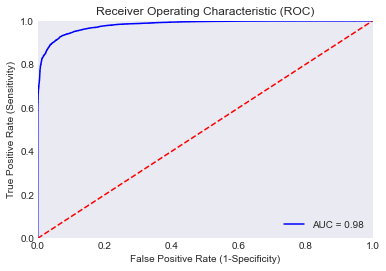

In [86]:
xgb_fpr_2, xgb_tpr_2, xgb_threshold_2 = metrics.roc_curve(y_test, clf_xgb_2.predict_proba(X_test)[:,1]) 
xgb_roc_auc_2 = metrics.auc(xgb_fpr_2, xgb_tpr_2)

plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(xgb_fpr_2, xgb_tpr_2, 'b', label='AUC = %0.2f' % xgb_roc_auc_2)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.show()

### 3.0.3 Compare AUC, XGBoost

The contribution from the other features with low gain score made little difference to the projects main evaluation metric AUC since it’s still on 0.98 but the model is faster when the classifier clf_xgb_2 only use 40.5 % of the original features  

In [87]:
# compare the two classifiers AUC 
print('AUC clf_xgb_2:', xgb_roc_auc_2)
print('AUC clf_xgb_1:', xgb_roc_auc_1)

AUC clf_xgb_2: 0.9814719062605581
AUC clf_xgb_1: 0.9834189073035489


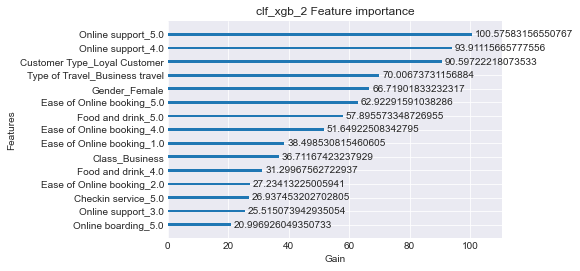

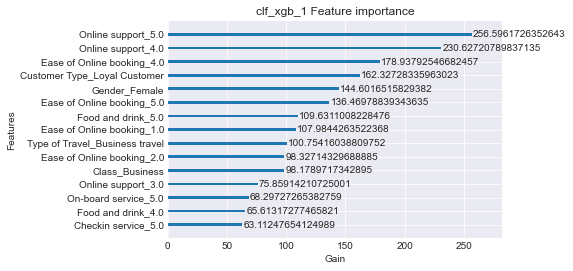

In [88]:
# importance plot showing the 15 features with the highest gain score 
xgb.plot_importance(clf_xgb_2, max_num_features=15, importance_type = 'gain', xlabel='Gain', title='clf_xgb_2 Feature importance')
plt.show()
xgb.plot_importance(clf_xgb_1, max_num_features=15, importance_type = 'gain', xlabel='Gain', title='clf_xgb_1 Feature importance')
plt.show()

## 3.1 XGBoost hyperparameter tuning with Bayesian optimization 

I have run the Bayesian optimization and assigned the optimised values to params_tuned. I put the code between quotation marks after that, because the Bayesian optimizer takes about 1 hour and 10 minutes to run on a computer with:

* Processor: Intel® Core™ i5 10600k 4,8GHZ 
* Graphic card: Nvidia Geforce RTX2060 6GB (OC-version)
* RAM: 16GB DDR4 2666MHz 

I have created a copy of params_tuned so the rest of the project will still run smoothly and saved the output from the Bayesian optimizer in a separate xlsx file ‘bayesian_optimization_iterations.xlsx’ that you can download from my repository. 

If you want to test the Bayesian optimization anyway, remove the quotation marks and delete the cell containing the copy of params_tuned. 

In [89]:
def XGbcv(eta, lambda_bo, alpha, max_depth, gamma, min_child_weight, colsample_bytree):
    LOGLOSSbest = 1.
    ITERbest = 0

    paramt = {
              'booster' : 'gbtree',
              'objective': 'binary:logistic',
              'eval_metric': 'logloss',
              'seed' : RANDOM_STATE,
              'eta' : eta, # learning rate
              'lambda' : lambda_bo, # L2 regularization term 
              'alpha' : alpha, # L1 regularization term
              'max_depth' : max_depth.astype(int), # max depth of the trees
              'gamma' : gamma, # pruning of the trees
              'min_child_weight' : min_child_weight, # min number of observations in each leaf
              'colsample_bytree' : colsample_bytree # ratio of variables to choose from in each split
              }

    xgbc = xgb.cv(
           params = paramt,
           dtrain = dtrain,
           num_boost_round = iter_best_2,
           nfold = 5,
           verbose_eval = False,
           early_stopping_rounds = 10,
           seed=RANDOM_STATE,
           shuffle=False
          )

    cv_score = xgbc['test-logloss-mean'].iloc[-1]
    if ( cv_score < LOGLOSSbest ):
        LOGLOSSbest = cv_score
        ITERbest = len(xgbc)

    return (-1.0 * cv_score)

In [90]:
"""dtrain = xgb.DMatrix(X_train, y_train)

print("# Global Optimization Search for XGBoost Parameters")
print("\n Please note that negative Log Loss values will be shown below. This is because")
print(" Log Loss needs to be minimized, while the Bayesian Optimizer always maximizes the function.\n")

XGbBO = BayesianOptimization(XGbcv, {'max_depth': (8, 12),
                                     'gamma': (0.2, 0.8),
                                     'min_child_weight': (1, 6),
                                     'colsample_bytree' :(0.6, 1),
                                     'eta' :(0.01, 0.25),
                                     'lambda_bo': (0, 1),
                                     'alpha': (0.7, 1)}, 
                                     random_state = RANDOM_STATE)

XGbBO.maximize(init_points=25, n_iter=575, acq="ucb", kappa = 2.85, kappa_decay = 0.999, kappa_decay_delay = 50)
print("-" * 53)

best_LOGLOSS = round((-1.0 * XGbBO.max['target']), 6)
alpha = round(XGbBO.max['params']['alpha'], 6)
colsample_bytree = round(XGbBO.max['params']['colsample_bytree'], 6)
eta = round(XGbBO.max['params']['eta'], 6)
gamma = round(XGbBO.max['params']['gamma'], 6)
lambda_bo = round(XGbBO.max['params']['lambda_bo'], 6)
max_depth = round(XGbBO.max['params']['max_depth'])
min_child_weight = round(XGbBO.max['params']['min_child_weight'], 6)

print("\n Best Log Loss value: %f" % best_LOGLOSS)
print(" Best XGBoost parameters:")
print(" max_depth=%d, gamma=%f, min_child_weight=%f, colsample_bytree=%f, eta=%f, lambda_bo=%f, alpha=%f" % (int(max_depth), gamma, min_child_weight, colsample_bytree, eta, lambda_bo, alpha))"""

# Global Optimization Search for XGBoost Parameters

 Please note that negative Log Loss values will be shown below. This is because
 Log Loss needs to be minimized, while the Bayesian Optimizer always maximizes the function.

|   iter    |  target   |   alpha   | colsam... |    eta    |   gamma   | lambda_bo | max_depth | min_ch... |
-------------------------------------------------------------------------------------------------------------
|  1        | -0.1697   |  0.8124   |  0.9803   |  0.1857   |  0.5592   |  0.156    |  8.624    |  1.29     |
|  2        | -0.1701   |  0.9599   |  0.8404   |  0.1799   |  0.2124   |  0.9699   |  11.33    |  2.062    |
|  3        | -0.1746   |  0.7545   |  0.6734   |  0.08302  |  0.5149   |  0.4319   |  9.165    |  4.059    |
|  4        | -0.1732   |  0.7418   |  0.7169   |  0.09793  |  0.4736   |  0.7852   |  8.799    |  3.571    |
|  5        | -0.1707   |  0.8777   |  0.6186   |  0.1558   |  0.3023   |  0.06505  |  11.8     |  5.828    |
|  

|  44       | -0.17     |  0.9514   |  0.8371   |  0.09977  |  0.3671   |  0.9861   |  9.671    |  4.77     |
|  45       | -0.172    |  0.7987   |  0.8894   |  0.09229  |  0.5656   |  0.7423   |  8.092    |  1.986    |
|  46       | -0.1705   |  0.8211   |  0.8667   |  0.2493   |  0.5268   |  0.2022   |  11.15    |  2.588    |
|  47       | -0.1714   |  0.8778   |  0.6874   |  0.09188  |  0.4207   |  0.445    |  11.98    |  3.893    |
|  48       | -0.1713   |  0.7188   |  0.9938   |  0.06539  |  0.2439   |  0.991    |  11.51    |  5.428    |
|  49       | -0.1698   |  0.8728   |  0.8105   |  0.1254   |  0.2069   |  0.4844   |  10.02    |  1.148    |
|  50       | -0.1759   |  0.9416   |  0.9958   |  0.05556  |  0.2935   |  0.3118   |  9.632    |  3.003    |
|  51       | -0.1696   |  0.9802   |  0.8754   |  0.1697   |  0.7137   |  0.3273   |  8.007    |  4.237    |
|  52       | -0.1703   |  0.7671   |  0.7664   |  0.1747   |  0.4832   |  0.5384   |  8.756    |  4.936    |
|  53     

|  90       | -0.2394   |  0.9624   |  0.8767   |  0.02034  |  0.3257   |  0.3228   |  11.19    |  3.91     |
|  91       | -0.1699   |  1.0      |  1.0      |  0.25     |  0.6556   |  0.357    |  9.142    |  2.139    |
|  92       | -0.1693   |  0.9783   |  0.7295   |  0.1244   |  0.2183   |  0.4523   |  11.79    |  4.281    |
|  93       | -0.1698   |  0.998    |  0.8484   |  0.227    |  0.4742   |  0.6172   |  9.635    |  5.277    |
|  94       | -0.1703   |  1.0      |  1.0      |  0.25     |  0.3252   |  0.7437   |  9.746    |  5.655    |
|  95       | -0.1712   |  0.7701   |  0.7283   |  0.09257  |  0.3779   |  0.8402   |  10.43    |  5.166    |
|  96       | -0.1699   |  0.818    |  0.7776   |  0.1938   |  0.383    |  0.5939   |  8.876    |  2.591    |
|  97       | -0.1698   |  0.745    |  0.7861   |  0.21     |  0.6048   |  0.5225   |  10.84    |  3.54     |
|  98       | -0.1698   |  0.8677   |  0.9065   |  0.2147   |  0.5324   |  0.279    |  9.083    |  2.72     |
|  99     

|  135      | -0.1701   |  0.8323   |  0.9949   |  0.1471   |  0.3435   |  0.72     |  11.97    |  3.858    |
|  136      | -0.1701   |  1.0      |  1.0      |  0.25     |  0.8      |  0.6952   |  11.54    |  2.606    |
|  137      | -0.1697   |  0.7964   |  0.8283   |  0.1915   |  0.6783   |  0.013    |  11.94    |  3.15     |
|  138      | -0.1804   |  0.9042   |  0.8612   |  0.05244  |  0.3995   |  0.5598   |  9.373    |  3.901    |
|  139      | -0.1694   |  0.8089   |  0.8743   |  0.136    |  0.6345   |  0.6833   |  11.9     |  3.614    |
|  140      | -0.1703   |  0.9381   |  0.7365   |  0.1935   |  0.2683   |  0.2692   |  9.726    |  2.774    |
|  141      | -0.17     |  0.8977   |  0.7119   |  0.25     |  0.3714   |  0.7102   |  10.1     |  4.52     |
|  142      | -0.1704   |  0.9773   |  0.8366   |  0.25     |  0.3891   |  0.02652  |  11.71    |  2.915    |
|  143      | -0.1694   |  0.7405   |  0.824    |  0.1269   |  0.508    |  0.4765   |  9.796    |  4.139    |
|  144    

|  181      | -0.1696   |  0.777    |  0.929    |  0.1886   |  0.4066   |  0.8207   |  8.511    |  1.408    |
|  182      | -0.1707   |  0.8219   |  1.0      |  0.25     |  0.2      |  0.9673   |  11.52    |  3.969    |
|  183      | -0.1694   |  0.7368   |  0.8652   |  0.1592   |  0.7378   |  0.4223   |  8.046    |  2.583    |
|  184      | -0.1699   |  0.8445   |  0.8331   |  0.1962   |  0.6109   |  0.6076   |  9.283    |  2.5      |
|  185      | -0.1712   |  0.7883   |  0.6658   |  0.1594   |  0.2038   |  0.8228   |  8.064    |  5.875    |
|  186      | -0.17     |  0.782    |  0.9994   |  0.2284   |  0.7266   |  0.1825   |  8.288    |  5.157    |
|  187      | -0.1699   |  0.7874   |  0.8661   |  0.2308   |  0.6981   |  0.9924   |  10.79    |  4.056    |
|  188      | -0.17     |  0.7439   |  0.766    |  0.25     |  0.6705   |  0.8964   |  11.16    |  4.018    |
|  189      | -0.1701   |  0.7985   |  0.6837   |  0.2435   |  0.7078   |  0.89     |  9.139    |  1.394    |
|  190    

|  227      | -0.1736   |  0.9333   |  0.9079   |  0.0783   |  0.5379   |  0.5936   |  8.223    |  1.208    |
|  228      | -0.1708   |  0.9345   |  0.6569   |  0.25     |  0.2      |  0.9999   |  11.35    |  4.143    |
|  229      | -0.1712   |  0.969    |  0.6      |  0.25     |  0.2      |  0.8251   |  10.14    |  4.958    |
|  230      | -0.1701   |  1.0      |  0.9419   |  0.25     |  0.3255   |  0.8645   |  10.14    |  5.451    |
|  231      | -0.2194   |  0.7725   |  0.6347   |  0.03069  |  0.6366   |  0.452    |  11.37    |  1.662    |
|  232      | -0.1993   |  0.9648   |  0.7289   |  0.03635  |  0.2927   |  0.08029  |  11.46    |  5.865    |
|  233      | -0.1704   |  0.8155   |  0.8106   |  0.2177   |  0.203    |  0.2834   |  10.13    |  3.839    |
|  234      | -0.1703   |  0.9508   |  0.731    |  0.09988  |  0.5916   |  0.5873   |  10.67    |  2.916    |
|  235      | -0.1702   |  0.7482   |  0.9098   |  0.223    |  0.4466   |  0.4594   |  8.66     |  2.665    |
|  236    

|  273      | -0.1699   |  0.7565   |  0.704    |  0.1457   |  0.4027   |  0.04514  |  9.736    |  1.827    |
|  274      | -0.3915   |  0.7      |  0.633    |  0.01     |  0.2569   |  0.5829   |  9.355    |  2.75     |
|  275      | -0.1703   |  0.913    |  1.0      |  0.25     |  0.6068   |  1.0      |  9.482    |  2.544    |
|  276      | -0.1989   |  0.9475   |  0.866    |  0.03589  |  0.3089   |  0.3401   |  9.756    |  4.938    |
|  277      | -0.1701   |  0.8837   |  0.6643   |  0.1483   |  0.7513   |  0.643    |  9.269    |  1.949    |
|  278      | -0.1694   |  0.966    |  0.9806   |  0.25     |  0.8      |  0.6736   |  9.493    |  2.978    |
|  279      | -0.17     |  1.0      |  0.824    |  0.25     |  0.6835   |  0.2434   |  9.76     |  2.883    |
|  280      | -0.1702   |  0.8291   |  0.7873   |  0.2239   |  0.5325   |  0.9994   |  8.713    |  2.838    |
|  281      | -0.1695   |  0.909    |  0.8615   |  0.125    |  0.4069   |  0.154    |  11.48    |  2.126    |
|  282    

|  319      | -0.1691   |  0.986    |  0.8006   |  0.1196   |  0.568    |  0.1709   |  11.11    |  4.643    |
|  320      | -0.1702   |  0.9923   |  1.0      |  0.25     |  0.8      |  0.0      |  8.105    |  2.182    |
|  321      | -0.1704   |  0.7592   |  1.0      |  0.25     |  0.7614   |  0.0      |  10.89    |  4.518    |
|  322      | -0.1694   |  0.8955   |  0.8966   |  0.1349   |  0.3166   |  0.4674   |  10.39    |  3.011    |
|  323      | -0.1703   |  1.0      |  0.8288   |  0.25     |  0.2      |  0.9807   |  9.716    |  1.665    |
|  324      | -0.1702   |  0.7      |  0.8348   |  0.25     |  0.4386   |  0.9849   |  8.442    |  1.039    |
|  325      | -0.1696   |  0.9772   |  0.731    |  0.2404   |  0.7778   |  0.9213   |  9.217    |  2.931    |
|  326      | -0.1719   |  0.7689   |  0.6885   |  0.08889  |  0.3362   |  0.6313   |  11.48    |  5.467    |
|  327      | -0.1713   |  0.8811   |  0.6      |  0.25     |  0.2      |  0.8734   |  11.53    |  5.171    |
|  328    

|  365      | -0.1728   |  0.9022   |  0.6815   |  0.08647  |  0.3598   |  0.741    |  10.57    |  3.742    |
|  366      | -0.1802   |  0.7969   |  0.9575   |  0.04313  |  0.3257   |  0.391    |  11.23    |  5.31     |
|  367      | -0.1703   |  0.7      |  1.0      |  0.25     |  0.6179   |  1.0      |  9.748    |  2.898    |
|  368      | -0.1708   |  0.78     |  1.0      |  0.25     |  0.2      |  0.4399   |  9.53     |  2.04     |
|  369      | -0.17     |  0.7021   |  0.8965   |  0.2445   |  0.6252   |  0.4752   |  10.95    |  4.944    |
|  370      | -0.1704   |  0.7754   |  0.9294   |  0.2235   |  0.3893   |  0.1354   |  11.14    |  4.879    |
|  371      | -0.1699   |  0.9422   |  0.9901   |  0.1898   |  0.3776   |  0.6253   |  11.64    |  2.265    |
|  372      | -0.1892   |  0.7664   |  0.6619   |  0.0502   |  0.7147   |  0.8121   |  10.88    |  3.585    |
|  373      | -0.171    |  1.0      |  0.6299   |  0.25     |  0.5038   |  0.05297  |  9.429    |  2.053    |
|  374    

|  411      | -0.1694   |  0.8405   |  0.9285   |  0.1299   |  0.4971   |  0.6034   |  10.59    |  2.242    |
|  412      | -0.1713   |  0.9686   |  0.6193   |  0.1461   |  0.4808   |  0.02642  |  8.586    |  1.988    |
|  413      | -0.1702   |  0.9546   |  0.8125   |  0.1414   |  0.3175   |  0.0801   |  8.999    |  2.745    |
|  414      | -0.17     |  0.7      |  0.9706   |  0.25     |  0.8      |  0.8794   |  11.68    |  5.04     |
|  415      | -0.1703   |  0.7958   |  0.7385   |  0.1751   |  0.5243   |  0.4953   |  10.76    |  1.577    |
|  416      | -0.1699   |  0.9662   |  0.7915   |  0.25     |  0.5591   |  1.0      |  9.031    |  2.533    |
|  417      | -0.1699   |  0.9977   |  0.9997   |  0.2312   |  0.4979   |  0.8867   |  9.54     |  1.817    |
|  418      | -0.1703   |  0.7      |  1.0      |  0.25     |  0.8      |  0.2224   |  8.0      |  2.667    |
|  419      | -0.1703   |  1.0      |  0.7338   |  0.25     |  0.3487   |  0.5277   |  11.13    |  2.154    |
|  420    

|  457      | -0.1696   |  0.7067   |  0.7867   |  0.1544   |  0.5301   |  0.5082   |  9.812    |  4.166    |
|  458      | -0.1701   |  0.8687   |  0.959    |  0.2128   |  0.5057   |  0.2119   |  11.56    |  4.805    |
|  459      | -0.1697   |  0.8103   |  0.8987   |  0.1575   |  0.5206   |  0.01346  |  11.7     |  3.382    |
|  460      | -0.1702   |  1.0      |  0.9116   |  0.25     |  0.5629   |  0.651    |  10.42    |  1.587    |
|  461      | -0.171    |  0.7419   |  0.6276   |  0.1522   |  0.779    |  0.32     |  8.07     |  1.93     |
|  462      | -0.17     |  0.7083   |  0.7083   |  0.1628   |  0.3393   |  0.2639   |  11.44    |  3.258    |
|  463      | -0.1735   |  0.9473   |  0.6704   |  0.0993   |  0.6257   |  0.2709   |  8.196    |  2.111    |
|  464      | -0.1692   |  0.7585   |  0.9692   |  0.1155   |  0.6142   |  0.9159   |  10.68    |  3.962    |
|  465      | -0.1708   |  0.7038   |  0.6703   |  0.2349   |  0.4456   |  0.6332   |  10.35    |  1.282    |
|  466    

|  503      | -0.1697   |  0.7693   |  0.8698   |  0.2409   |  0.4404   |  0.4523   |  8.612    |  2.68     |
|  504      | -0.1708   |  0.7      |  1.0      |  0.25     |  0.7161   |  0.0      |  11.73    |  3.856    |
|  505      | -0.1691   |  0.9952   |  0.8088   |  0.211    |  0.77     |  0.5841   |  11.29    |  2.483    |
|  506      | -0.1698   |  0.7495   |  0.8965   |  0.1791   |  0.6417   |  0.579    |  11.99    |  5.42     |
|  507      | -0.1693   |  0.9575   |  0.7898   |  0.1379   |  0.2304   |  0.898    |  11.27    |  5.712    |
|  508      | -0.1693   |  0.9439   |  0.9129   |  0.1944   |  0.7224   |  0.8059   |  8.755    |  5.475    |
|  509      | -0.1995   |  0.7622   |  0.9693   |  0.03021  |  0.4398   |  0.08225  |  10.74    |  1.832    |
|  510      | -0.171    |  0.7248   |  1.0      |  0.1656   |  0.3718   |  0.2984   |  11.07    |  1.094    |
|  511      | -0.1703   |  0.7      |  0.7904   |  0.25     |  0.2      |  0.8381   |  8.619    |  2.715    |
|  512    

|  549      | -0.1697   |  0.7358   |  0.9276   |  0.1524   |  0.4514   |  0.7985   |  11.47    |  5.036    |
|  550      | -0.17     |  0.7      |  0.7937   |  0.25     |  0.8      |  0.8532   |  10.27    |  1.994    |
|  551      | -0.1703   |  1.0      |  0.8726   |  0.25     |  0.2507   |  1.0      |  10.25    |  1.851    |
|  552      | -0.17     |  0.7      |  0.8265   |  0.25     |  0.8      |  1.0      |  11.33    |  2.866    |
|  553      | -0.1708   |  0.7861   |  0.6328   |  0.2257   |  0.7336   |  0.2725   |  9.029    |  3.201    |
|  554      | -0.17     |  0.8659   |  0.8657   |  0.2363   |  0.4877   |  0.2021   |  10.91    |  5.11     |
|  555      | -0.1711   |  0.7      |  0.6      |  0.25     |  0.7068   |  0.5125   |  10.4     |  2.236    |
|  556      | -0.1709   |  0.7      |  0.6      |  0.25     |  0.7016   |  0.5267   |  9.867    |  1.805    |
|  557      | -0.1701   |  1.0      |  1.0      |  0.25     |  0.6139   |  0.8971   |  11.89    |  3.236    |
|  558    

|  595      | -0.1701   |  1.0      |  0.7797   |  0.25     |  0.7161   |  0.0      |  9.566    |  2.484    |
|  596      | -0.1707   |  0.7494   |  0.6564   |  0.1158   |  0.7109   |  0.02758  |  10.29    |  5.821    |
|  597      | -0.1702   |  0.7029   |  0.9046   |  0.25     |  0.573    |  0.01567  |  9.829    |  2.627    |
|  598      | -0.1697   |  1.0      |  0.7994   |  0.25     |  0.6082   |  1.0      |  9.833    |  1.976    |
|  599      | -0.171    |  1.0      |  1.0      |  0.25     |  0.4533   |  0.1386   |  10.32    |  3.393    |
|  600      | -0.1702   |  1.0      |  0.759    |  0.25     |  0.5099   |  0.9005   |  9.894    |  1.0      |
-----------------------------------------------------

 Best Log Loss value: 0.168861
 Best XGBoost parameters:
 max_depth=11, gamma=0.714145, min_child_weight=2.654017, colsample_bytree=0.736561, eta=0.109522, lambda_bo=0.425498, alpha=0.976374


In [91]:
# from the iteration with 'Best Log Loss value' set parameters to their optimal estimated values 
"""params_tuned = {
    'booster' : 'gbtree',
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'seed' : RANDOM_STATE,
    'learning_rate' : eta,
    'reg_lambda' : lambda_bo,
    'reg_alpha' : alpha,
    'max_depth' : max_depth,
    'gamma' : gamma,
    'min_child_weight' : min_child_weight,
    'colsample_bytree' : colsample_bytree
    }

params_tuned"""

{'booster': 'gbtree',
 'objective': 'binary:logistic',
 'eval_metric': 'logloss',
 'seed': 42,
 'learning_rate': 0.109522,
 'reg_lambda': 0.425498,
 'reg_alpha': 0.976374,
 'max_depth': 11,
 'gamma': 0.714145,
 'min_child_weight': 2.654017,
 'colsample_bytree': 0.736561}

In [92]:
# copy of params_tuned, use it when Bayesian optimization isn't used
params_tuned = {'booster': 'gbtree',
 'objective': 'binary:logistic',
 'eval_metric': 'logloss',
 'seed': RANDOM_STATE,
 'learning_rate': 0.109522,
 'reg_lambda': 0.425498,
 'reg_alpha': 0.976374,
 'max_depth': 11,
 'gamma': 0.714145,
 'min_child_weight': 2.654017,
 'colsample_bytree': 0.736561}

In [93]:
dmatrix_tuned = xgb.DMatrix(X_train, y_train)

In [94]:
# params_tuned is set as parameter values in the cross-validation 
xgb_cv_tuned = xgb.cv(dtrain=dmatrix_tuned, params=params_tuned, nfold=5,
num_boost_round=500, early_stopping_rounds=10, verbose_eval=True, seed=RANDOM_STATE, shuffle=False)

[0]	train-logloss:0.61541+0.00009	test-logloss:0.61575+0.00024
[1]	train-logloss:0.55813+0.00466	test-logloss:0.55895+0.00478
[2]	train-logloss:0.50946+0.00648	test-logloss:0.51066+0.00649
[3]	train-logloss:0.47099+0.00420	test-logloss:0.47262+0.00470
[4]	train-logloss:0.43751+0.00617	test-logloss:0.43964+0.00632
[5]	train-logloss:0.40701+0.00570	test-logloss:0.40942+0.00549
[6]	train-logloss:0.38169+0.00453	test-logloss:0.38453+0.00467
[7]	train-logloss:0.35944+0.00598	test-logloss:0.36269+0.00616
[8]	train-logloss:0.33821+0.00677	test-logloss:0.34178+0.00678
[9]	train-logloss:0.31927+0.00483	test-logloss:0.32310+0.00460
[10]	train-logloss:0.30359+0.00471	test-logloss:0.30791+0.00498
[11]	train-logloss:0.29082+0.00506	test-logloss:0.29558+0.00526
[12]	train-logloss:0.27954+0.00546	test-logloss:0.28461+0.00595
[13]	train-logloss:0.26809+0.00425	test-logloss:0.27348+0.00501
[14]	train-logloss:0.25843+0.00464	test-logloss:0.26412+0.00537
[15]	train-logloss:0.24976+0.00425	test-logloss:0.

<function matplotlib.pyplot.show(close=None, block=None)>

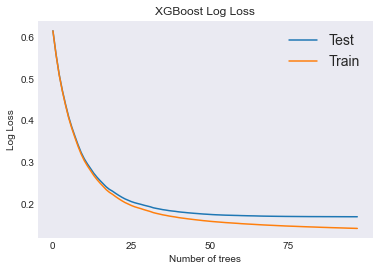

In [95]:
# plot the cross-validation log loss (early_stopping_rounds set to 10)
plt.plot(xgb_cv_tuned.index, xgb_cv_tuned['test-logloss-mean'], label='Test')
plt.plot(xgb_cv_tuned.index, xgb_cv_tuned['train-logloss-mean'], label='Train')
plt.xticks(np.arange(min(xgb_cv_tuned.index), max(xgb_cv_tuned.index)+1.1, 25)) 
plt.ylabel('Log Loss')
plt.xlabel('Number of trees')
plt.title('XGBoost Log Loss')
plt.legend(fontsize=14)
plt.show

In [96]:
iter_best_tuned = len(xgb_cv_tuned)
iter_best_tuned #98

98

In [97]:
# use the best iteration from xgb_cv_tuned and the parameters from params_tuned, then train the model. 
clf_xgb_tuned = xgb.XGBClassifier(n_estimators=iter_best_tuned, random_state=RANDOM_STATE, use_label_encoder=False, eval_metric='logloss',
learning_rate=0.109522, reg_lambda=0.425498, reg_alpha=0.976374, max_depth=11, gamma=0.714145, min_child_weight=2.654017, colsample_bytree = 0.736561)

clf_xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.736561,
              eval_metric='logloss', gamma=0.714145, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.109522, max_delta_step=0, max_depth=11,
              min_child_weight=2.654017, missing=nan, monotone_constraints='()',
              n_estimators=98, n_jobs=12, num_parallel_tree=1, random_state=42,
              reg_alpha=0.976374, reg_lambda=0.425498, scale_pos_weight=1,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [98]:
# the tuned clf_xgb_tuned and non-tuned clf_xgb_2 classification metrics
xgb_class_rep_tuned = metrics.classification_report(y_test, clf_xgb_tuned.predict(X_test))
print('xgb_class_rep_tuned')
print(xgb_class_rep_tuned)
print('xgb_class_rep_2')
print(xgb_class_rep_2)

xgb_class_rep_tuned
              precision    recall  f1-score   support

           0       0.92      0.93      0.92     10846
           1       0.94      0.93      0.93     12665

    accuracy                           0.93     23511
   macro avg       0.93      0.93      0.93     23511
weighted avg       0.93      0.93      0.93     23511

xgb_class_rep_2
              precision    recall  f1-score   support

           0       0.92      0.93      0.92     10846
           1       0.94      0.93      0.93     12665

    accuracy                           0.93     23511
   macro avg       0.93      0.93      0.93     23511
weighted avg       0.93      0.93      0.93     23511



In [99]:
# the tuned clf_xgb_tuned and non-tuned clf_xgb_2 confusion matrix
xgb_confu_matrix_tuned = metrics.confusion_matrix(y_test, clf_xgb_tuned.predict(X_test))
print('xgb_confu_matrix_tuned')
print(xgb_confu_matrix_tuned)
print('xgb_confu_matrix_2')
print(xgb_confu_matrix_2)

xgb_confu_matrix_tuned
[[10078   768]
 [  911 11754]]
xgb_confu_matrix_2
[[10071   775]
 [  888 11777]]


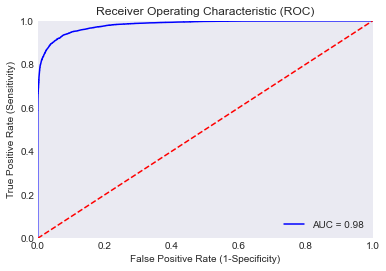

In [100]:
# ROC and AUC
xgb_fpr_tuned, xgb_tpr_tuned, xgb_threshold_tuned = metrics.roc_curve(y_test, clf_xgb_tuned.predict_proba(X_test)[:,1]) 
xgb_roc_auc_tuned = metrics.auc(xgb_fpr_tuned, xgb_tpr_tuned)

plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(xgb_fpr_tuned, xgb_tpr_tuned, 'b', label='AUC = %0.2f' % xgb_roc_auc_tuned)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.show()

### 3.1.1 Compare AUC, XGBoost hyperparameter tuned

There is a minimal difference regarding the AUC for the hyperparameter tuned clf_xgb_tuned classifier and non-tuned clf_xgb_2. 

But the hyperparameter tuned classifier have a higher AUC score and the two model have the same number of features so I choose to use clf_xgb_tuned classifier AUC score as benchmark to compare against the Stacked model      

In [101]:
# compare the the tuned and non-tuned classifiers AUC 
print(f'AUC clf_xgb_tuned: {xgb_roc_auc_tuned}')
print(f'AUC clf_xgb_2:     {xgb_roc_auc_2}')

AUC clf_xgb_tuned: 0.9818699491622987
AUC clf_xgb_2:     0.9814719062605581


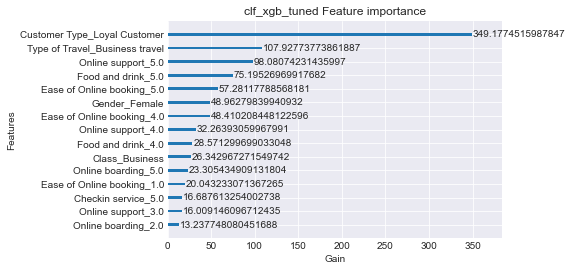

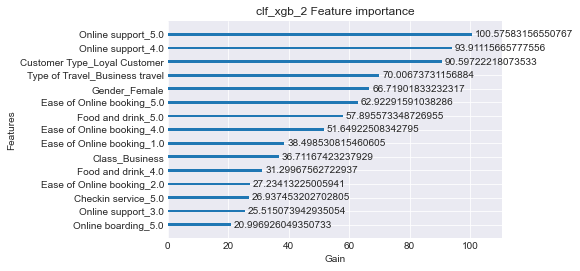

In [102]:
# importance plot showing the 15 features with the highest gain score 
xgb.plot_importance(clf_xgb_tuned, max_num_features=15, importance_type = 'gain', xlabel='Gain', title='clf_xgb_tuned Feature importance')
plt.show()
xgb.plot_importance(clf_xgb_2, max_num_features=15, importance_type = 'gain', xlabel='Gain', title='clf_xgb_2 Feature importance')
plt.show()

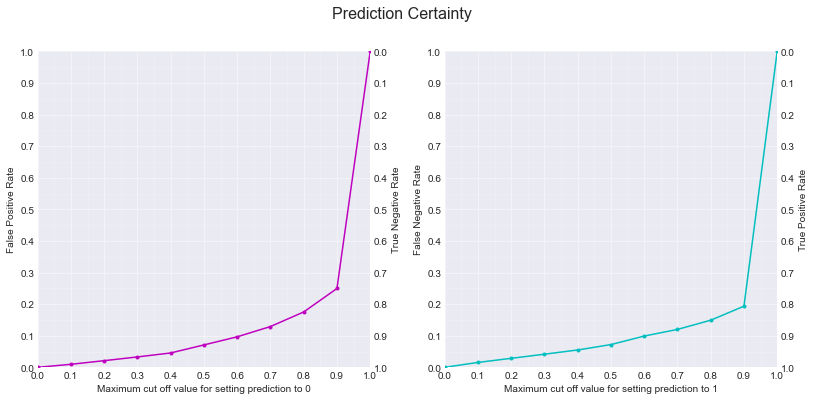

In [103]:
xgb_prediction_certainty = prediction_certainty(y_test, clf_xgb_tuned.predict_proba(X_test))
xgb_prediction_certainty

# 4. Stacking

Stacked Generalization (Stacking) is the process of using different machine learning models also called base learners one after another, whereupon you add the predictions from each base learner to make a new feature that is then used by a final generalized machine learning model also called meta learner. It is important that the base learners produce different predictions, so-called uncorrelated predictions because stacking works best when the predictions that are combined are all good, but good in different ways. That’s why I’ve chosen to use Logistic Regression and XGBoost as my base learners because they are two different machine learning models (e.g. XGBoost have high variance and low bias while Logistic regression have low variance and high bias). 
<br>XGBoost is used as a meta learner to compare if the AUC for the stacked model is better than the AUC of two standalone XGBoost and GLM - Logistic regression models I constructed earlier in the notebook.</br>   

Note that there is no correct way of implementing stacking other than it’s a process of combining many models/base learners with a final generalized model/meta learner. Hence I make sure that the base and meta learners are accompanied by cross validation to reduce overfitting models to the training data. I also use feature selection and tune the hyperparameters of the base learners and the meta learner to further lift performance and speed of the models. With that in mind, my aim is to get the best possible AUC score and compare that with the standalone Logistic regression and XGBoost models AUC score.   

The steps for doing the stacking is roughly as follows:
1. Recreate the preprocessed dataframe df and use that to create two new dataframes, one for the meta learner (df_meta) and one for the base learner (df_base). 
2. Use df_base, create a train and test set for the base learner. Then create the base learner GLM - Logistic regression with cross-validation and I also do feature selection with Recursive Feature Elimination (RFE)
3. Because I’ve done feature selection on the Logistic regression base learner I need to restore the train and test set for the base learner before I can create the second base learner that will be the XGBoost algorithm 
4. Create the XGBoost base learner and perform cross-validation then feature selection by comparing the features gain score, finally do hyperparameter tuning with Bayesian optimization, then the XGBoost base learner is completed.
5. Use the best GLM - Logistic regression and XGBoost base learner models to get probabilities from the df_meta dataframe. Then assign those probabilities to df_meta, one column for the GLM base learner and one column for the XGBoost base learner. By doing this the meta learner is “stacked” with two extra features, df_meta probabilities from each one of the base learners. 
6. Use the newly stacked df_meta to create a train and test set for the XGBoost meta learner. 
7. Perform cross-validation, feature selection and hyperparameter tuning on the meta learner. <br>Note that the gain score from the GLM base learner is much higher than the gain score for the XGBoost base learner. The score for the XGBoost base learner is so low that that feature gets cut off in the feature selection.</br> 
8. Get the AUC score for the meta learner and compare that score with the AUC score for the standalone GLM - Logistic regression and XGBoost models.

In [104]:
# AUC benchmark from individual models
print(f'AUC GLM:     {glm_roc_auc_2}')
print(f'AUC XGBoost: {xgb_roc_auc_tuned}')

AUC GLM:     0.9260747984615249
AUC XGBoost: 0.9818699491622987


In [105]:
# create the df used for the stacking
df_stacking = pd.concat([numeric_scaled, categorical_encoded, df.Satisfaction], axis = 1)

In [106]:
# Creating df_meta for the meta learner with 70% of the values from the original dataframe 
# frac chose values randomly i.e. data is shuffled but random_state keeps it consistent for every notebook run
df_meta = df_stacking.sample(frac=0.70, random_state=RANDOM_STATE)

# Creating df_base for the base learners with the 30% remaining values from original dataframe 
df_base = df_stacking.drop(df_meta.index)

In [107]:
# create the predict and target variables for the base learners
y_base = df_base.Satisfaction
X_base = df_base.drop('Satisfaction', axis=1)

# create train and test set for the base learners
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_base, y_base, test_size=0.2, random_state=RANDOM_STATE, stratify=y_base, shuffle=True)

## 4.1 Stacking Base Learner - GLM - Logistic Regression

In [108]:
# create classifier and fit X_train_base and y_train_base
clf_glm_base_1 = LogisticRegressionCV(cv=5, penalty='l1', scoring='neg_log_loss', solver = 'liblinear', 
verbose=True, n_jobs=-1, random_state=RANDOM_STATE, max_iter=10000).fit(X_train_base, y_train_base)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.9s finished


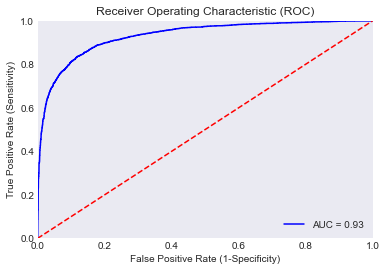

In [109]:
# ROC and AUC
glm_base_fpr_1, glm_base_tpr_1, glm_base_threshold_1 = metrics.roc_curve(y_test_base, clf_glm_base_1.predict_proba(X_test_base)[:,1]) 
glm_base_roc_auc_1 = metrics.auc(glm_base_fpr_1, glm_base_tpr_1)

plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(glm_base_fpr_1, glm_base_tpr_1, 'b', label='AUC = %0.2f' % glm_base_roc_auc_1)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.show()

### 4.1.1 Recursive Feature Elimination (RFE) Base learner - Logistic regression

In [110]:
rfecv_base = RFECV(
    estimator=LogisticRegression(penalty='l1', solver='liblinear', verbose=True, random_state=RANDOM_STATE, max_iter=10000),
    min_features_to_select=10,
    step=1,
    n_jobs=-1,
    scoring='neg_log_loss',
    verbose=True,
    cv=5
)

rfecv_base = rfecv_base.fit(X_train_base, y_train_base)

print(rfecv_base.support_)
print(rfecv_base.ranking_)
X_train_base.columns[rfecv_base.support_]

Fitting estimator with 74 features.
[LibLinear]Fitting estimator with 73 features.
[LibLinear]Fitting estimator with 72 features.
[LibLinear]Fitting estimator with 71 features.
[LibLinear]Fitting estimator with 70 features.
[LibLinear]Fitting estimator with 69 features.
[LibLinear]Fitting estimator with 68 features.
[LibLinear]Fitting estimator with 67 features.
[LibLinear]Fitting estimator with 66 features.
[LibLinear]Fitting estimator with 65 features.
[LibLinear]Fitting estimator with 64 features.
[LibLinear]Fitting estimator with 63 features.
[LibLinear]Fitting estimator with 62 features.
[LibLinear]Fitting estimator with 61 features.
[LibLinear]Fitting estimator with 60 features.
[LibLinear]Fitting estimator with 59 features.
[LibLinear]Fitting estimator with 58 features.
[LibLinear]Fitting estimator with 57 features.
[LibLinear]Fitting estimator with 56 features.
[LibLinear]Fitting estimator with 55 features.
[LibLinear]Fitting estimator with 54 features.
[LibLinear][LibLinear][L

Index(['Flight Distance', 'Departure Delay in Minutes', 'Gender_Female',
       'Gender_Male', 'Customer Type_disloyal Customer',
       'Type of Travel_Business travel', 'Type of Travel_Personal Travel',
       'Class_Business', 'Class_Eco Plus', 'Baggage handling_1',
       'Baggage handling_3', 'Baggage handling_4', 'Baggage handling_5',
       'Inflight wifi service_2.0', 'Inflight wifi service_3.0',
       'Inflight wifi service_5.0', 'Online support_2.0', 'Online support_3.0',
       'Online support_5.0', 'Ease of Online booking_1.0',
       'Ease of Online booking_2.0', 'Ease of Online booking_4.0',
       'Gate location_1.0', 'Gate location_2.0', 'Gate location_4.0',
       'Gate location_5.0', 'Food and drink_2.0', 'Food and drink_4.0',
       'Food and drink_5.0', 'Online boarding_1.0', 'Online boarding_2.0',
       'Online boarding_3.0', 'Online boarding_5.0', 'On-board service_1.0',
       'On-board service_2.0', 'On-board service_4.0', 'On-board service_5.0',
       'Leg r

In [111]:
# the features to keep after feature selection with RFE   
print(X_train_base.columns[rfecv_base.support_]) 
print(f'{len(X_train_base.columns[rfecv_base.support_])} features in total') #53 features

Index(['Flight Distance', 'Departure Delay in Minutes', 'Gender_Female',
       'Gender_Male', 'Customer Type_disloyal Customer',
       'Type of Travel_Business travel', 'Type of Travel_Personal Travel',
       'Class_Business', 'Class_Eco Plus', 'Baggage handling_1',
       'Baggage handling_3', 'Baggage handling_4', 'Baggage handling_5',
       'Inflight wifi service_2.0', 'Inflight wifi service_3.0',
       'Inflight wifi service_5.0', 'Online support_2.0', 'Online support_3.0',
       'Online support_5.0', 'Ease of Online booking_1.0',
       'Ease of Online booking_2.0', 'Ease of Online booking_4.0',
       'Gate location_1.0', 'Gate location_2.0', 'Gate location_4.0',
       'Gate location_5.0', 'Food and drink_2.0', 'Food and drink_4.0',
       'Food and drink_5.0', 'Online boarding_1.0', 'Online boarding_2.0',
       'Online boarding_3.0', 'Online boarding_5.0', 'On-board service_1.0',
       'On-board service_2.0', 'On-board service_4.0', 'On-board service_5.0',
       'Leg r

In [112]:
# keep only the features from rfecv_base (53 features)
X_train_base = X_train_base.loc[:, rfecv_base.support_]
X_test_base = X_test_base.loc[:,rfecv_base.support_]

### Comment - Base learner - Logistic regression
After the feature selection, the same steps as for the first classifier clf_glm_base_1 is now done on a new classifier clf_glm_base_2

In [113]:
clf_glm_base_2 = LogisticRegressionCV(cv=5, penalty='l1', scoring='neg_log_loss', solver = 'liblinear', 
verbose=True, n_jobs=-1, random_state=RANDOM_STATE, max_iter=10000).fit(X_train_base, y_train_base)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s finished


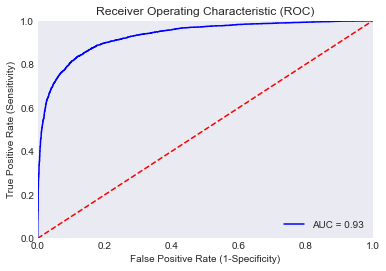

In [114]:
# ROC and AUC
glm_base_fpr_2, glm_base_tpr_2, glm_base_threshold_2 = metrics.roc_curve(y_test_base, clf_glm_base_2.predict_proba(X_test_base)[:,1]) 
glm_base_roc_auc_2 = metrics.auc(glm_base_fpr_2, glm_base_tpr_2)

plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(glm_base_fpr_2, glm_base_tpr_2, 'b', label='AUC = %0.2f' % glm_base_roc_auc_2)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.show()

### 4.1.2 Compare AUC, Base learner - Logistic regression

The contribution from the other features that was removed by the RFE made little difference to the projects main evaluation metric AUC since it’s still on 0.93 but made the classifier converges faster when the the classifier clf_glm_2 only use 53 features instead of 74 features. 

In [115]:
# compare the two classifiers AUC 
print('AUC clf_glm_base_2:',glm_base_roc_auc_2)
print('AUC clf_glm_base_1:',glm_base_roc_auc_1)

AUC clf_glm_base_2: 0.9312631628727146
AUC clf_glm_base_1: 0.931326811091439


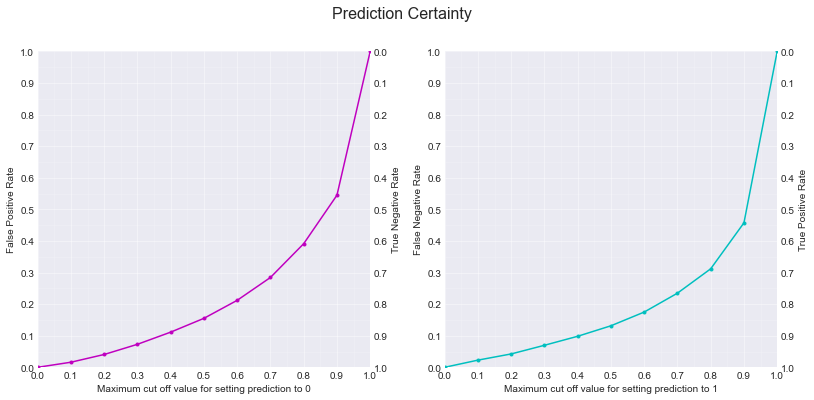

In [116]:
glm_base_prediction_certainty = prediction_certainty(y_test_base, clf_glm_base_2.predict_proba(X_test_base))
glm_base_prediction_certainty

## 4.2 Stacking Base Learner - XGBoost

In [117]:
# restore the base model train and test sets for XGBoost modeling 
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_base, y_base, test_size=0.2, random_state=RANDOM_STATE, stratify=y_base, shuffle=True)

In [118]:
# cast the train partition to dmatrix
dmatrix_base_1 = xgb.DMatrix(X_train_base, y_train_base)

In [119]:
# set the parameters
params = {
    'booster' : 'gbtree', 
    'objective' : 'binary:logistic', 
    'eval_metric': 'logloss', 
    'seed': RANDOM_STATE 
    }

In [120]:
# preform a cross-validation to approximate the preferable n_estimator (optimal number of boosting rounds) for the XGBoost base classifier
xgb_base_cv_1 = xgb.cv(dtrain=dmatrix_base_1, params=params, nfold=5,
num_boost_round=500, early_stopping_rounds=10, verbose_eval=True, seed=RANDOM_STATE, shuffle=False)

[0]	train-logloss:0.52466+0.00050	test-logloss:0.52578+0.00077
[1]	train-logloss:0.43178+0.00252	test-logloss:0.43417+0.00270
[2]	train-logloss:0.37046+0.00229	test-logloss:0.37351+0.00425
[3]	train-logloss:0.32331+0.00212	test-logloss:0.32758+0.00466
[4]	train-logloss:0.29187+0.00143	test-logloss:0.29702+0.00531
[5]	train-logloss:0.26671+0.00148	test-logloss:0.27309+0.00585
[6]	train-logloss:0.24693+0.00183	test-logloss:0.25452+0.00516
[7]	train-logloss:0.23214+0.00140	test-logloss:0.24092+0.00602
[8]	train-logloss:0.22118+0.00103	test-logloss:0.23115+0.00668
[9]	train-logloss:0.21194+0.00083	test-logloss:0.22250+0.00689
[10]	train-logloss:0.20202+0.00106	test-logloss:0.21332+0.00679
[11]	train-logloss:0.19496+0.00163	test-logloss:0.20758+0.00654
[12]	train-logloss:0.18934+0.00176	test-logloss:0.20346+0.00589
[13]	train-logloss:0.18387+0.00195	test-logloss:0.19902+0.00582
[14]	train-logloss:0.17983+0.00189	test-logloss:0.19611+0.00649
[15]	train-logloss:0.17584+0.00180	test-logloss:0.

<function matplotlib.pyplot.show(close=None, block=None)>

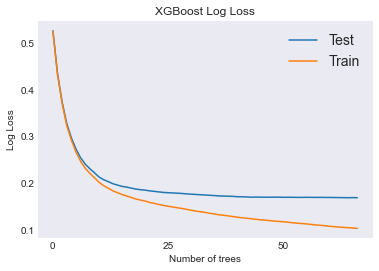

In [121]:
# plot the cross-validation log loss (early_stopping_rounds set to 10)
plt.plot(xgb_base_cv_1.index, xgb_base_cv_1['test-logloss-mean'], label='Test')
plt.plot(xgb_base_cv_1.index, xgb_base_cv_1['train-logloss-mean'], label='Train')
plt.xticks(np.arange(min(xgb_base_cv_1.index), max(xgb_base_cv_1.index)+1.1, 25)) 
plt.ylabel('Log Loss')
plt.xlabel('Number of trees')
plt.title('XGBoost Log Loss')
plt.legend(fontsize=14)
plt.show

In [122]:
# get the the best iteration (lowest test log loss) from xgb_base_cv_1, it will be used as the number of boosting rounds in the classifier
iter_best_base_1 = len(xgb_base_cv_1)
iter_best_base_1 # 67

67

In [123]:
# create a XGBClassifer instance and train the base model. 
clf_xgb_base_1 = xgb.XGBClassifier(n_estimators=iter_best_base_1, random_state=RANDOM_STATE, use_label_encoder=False, eval_metric='logloss')
clf_xgb_base_1.fit(X_train_base, y_train_base)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=67, n_jobs=12,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

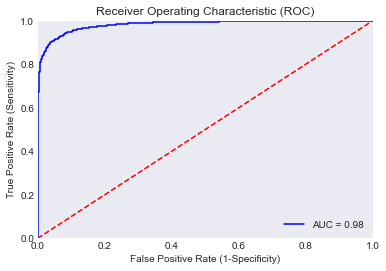

In [124]:
# ROC and AUC
xgb_base_fpr_1, xgb_base_tpr_1, xgb_base_threshold_1 = metrics.roc_curve(y_test_base, clf_xgb_base_1.predict_proba(X_test_base)[:,1]) 
xgb_base_roc_auc_1 = metrics.auc(xgb_base_fpr_1, xgb_base_tpr_1)

plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(xgb_base_fpr_1, xgb_base_tpr_1, 'b', label='AUC = %0.2f' % xgb_base_roc_auc_1)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.show()

In [125]:
print('xgb_base_roc_auc_1:',xgb_base_roc_auc_1)

xgb_base_roc_auc_1: 0.9824441855327762


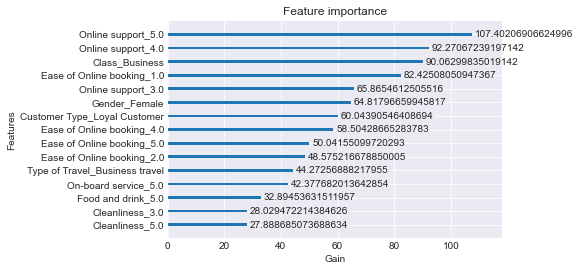

In [126]:
# importance plot showing the 15 features with the highest gain score 
xgb.plot_importance(clf_xgb_base_1, max_num_features=15, importance_type = 'gain', xlabel='Gain')
plt.show()

In [127]:
# Array with the gain scores (feature names not displayed)
np.array(sorted(clf_xgb_base_1.get_booster().get_score(importance_type='gain').values(),reverse=True))

array([107.40206907,  92.27067239,  90.06299835,  82.42508051,
        65.86546125,  64.8179666 ,  60.04390546,  58.50428665,
        50.041551  ,  48.57521668,  44.27256888,  42.37768201,
        32.89453632,  28.02947221,  27.88868507,  24.40986442,
        24.32991884,  20.36841929,  19.51534768,  19.33760011,
        17.04999754,  16.52384664,  15.32695278,  13.14323807,
        12.63060152,  12.63048157,  10.24905588,   9.23440636,
         8.92680391,   8.75754434,   8.54800616,   8.38759183,
         8.21993405,   7.73683224,   7.13984013,   6.87555428,
         6.26660241,   6.23496275,   6.20703091,   5.99193094,
         5.23320044,   5.06758765,   5.00468097,   4.6095424 ,
         4.51101007,   4.43944944,   4.09504324,   4.02933772,
         4.02776959,   3.65025067,   3.5778729 ,   3.54518507,
         3.33720704,   3.31497833,   3.29728346,   3.13839503,
         3.1192332 ,   3.0906516 ,   3.01102685,   2.95459053,
         2.92113757,   2.91369308,   2.90827349,   2.89

In [128]:
# the feature names of the features I keep, and their corresponding gain score
sorted(clf_xgb_base_1.get_booster().get_score(importance_type='gain').items(), key=lambda item: item[1], reverse=True)[:45]

[('Online support_5.0', 107.40206906624996),
 ('Online support_4.0', 92.27067239197142),
 ('Class_Business', 90.06299835019142),
 ('Ease of Online booking_1.0', 82.42508050947367),
 ('Online support_3.0', 65.8654612505516),
 ('Gender_Female', 64.81796659945817),
 ('Customer Type_Loyal Customer', 60.04390546408694),
 ('Ease of Online booking_4.0', 58.50428665283783),
 ('Ease of Online booking_5.0', 50.04155099720293),
 ('Ease of Online booking_2.0', 48.575216678850005),
 ('Type of Travel_Business travel', 44.27256888217955),
 ('On-board service_5.0', 42.377682013642854),
 ('Food and drink_5.0', 32.89453631511957),
 ('Cleanliness_3.0', 28.029472214384626),
 ('Cleanliness_5.0', 27.888685073688634),
 ('Online boarding_2.0', 24.409864420727263),
 ('Food and drink_4.0', 24.329918838438676),
 ('Checkin service_5.0', 20.36841928568627),
 ('Baggage handling_5', 19.515347675951222),
 ('Online boarding_5.0', 19.33760010645833),
 ('Leg room service_5.0', 17.04999754209575),
 ('Inflight wifi servic

In [129]:
# the percentage (%) by features that I keep in the model
(45/len(dmatrix_base_1.feature_names))*100

60.810810810810814

In [130]:
# get the gain scores from clf_xgb_base_1, sort in descending order, and subset the top 45 features
gain_score_base = clf_xgb_base_1.get_booster().get_score(importance_type='gain')
gain_score_base_df = pd.DataFrame.from_dict(gain_score_base, orient='index', columns = ['gain']).gain.sort_values(ascending=False)
features_keep_base = gain_score_base_df.iloc[:45]

In [131]:
# keep only the features with the top 60.8 % highest gain scores 
X_train_base = X_train_base.loc[:,X_train_base.columns.isin(features_keep_base.index)]
X_test_base = X_test_base.loc[:,X_test_base.columns.isin(features_keep_base.index)]

In [132]:
# cast the train partition to dmatrix
dmatrix_base_2 = xgb.DMatrix(X_train_base, y_train_base)

In [133]:
# preform a cross-validation to approximate the preferable n_estimator (optimal number of boosting rounds) for the XGBoost base learner classifier
xgb_base_cv_2 = xgb.cv(dtrain=dmatrix_base_2, params=params, nfold=5,
num_boost_round=500, early_stopping_rounds=10, verbose_eval=True, seed=RANDOM_STATE, shuffle=False)

[0]	train-logloss:0.52491+0.00053	test-logloss:0.52602+0.00077
[1]	train-logloss:0.43197+0.00288	test-logloss:0.43457+0.00399
[2]	train-logloss:0.36987+0.00340	test-logloss:0.37284+0.00483
[3]	train-logloss:0.32420+0.00360	test-logloss:0.32811+0.00598
[4]	train-logloss:0.29229+0.00241	test-logloss:0.29729+0.00588
[5]	train-logloss:0.26635+0.00185	test-logloss:0.27208+0.00582
[6]	train-logloss:0.24849+0.00117	test-logloss:0.25511+0.00574
[7]	train-logloss:0.23388+0.00201	test-logloss:0.24134+0.00678
[8]	train-logloss:0.22176+0.00201	test-logloss:0.23002+0.00747
[9]	train-logloss:0.21235+0.00177	test-logloss:0.22158+0.00828
[10]	train-logloss:0.20476+0.00165	test-logloss:0.21462+0.00721
[11]	train-logloss:0.19716+0.00150	test-logloss:0.20791+0.00690
[12]	train-logloss:0.19178+0.00168	test-logloss:0.20330+0.00642
[13]	train-logloss:0.18743+0.00186	test-logloss:0.19970+0.00632
[14]	train-logloss:0.18368+0.00207	test-logloss:0.19690+0.00669
[15]	train-logloss:0.18010+0.00190	test-logloss:0.

<function matplotlib.pyplot.show(close=None, block=None)>

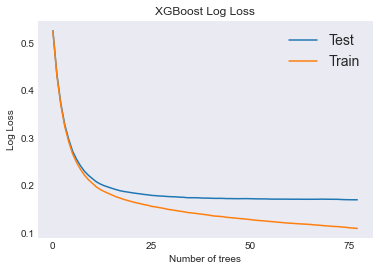

In [134]:
# plot the cross-validation log loss (early_stopping_rounds set to 10)
plt.plot(xgb_base_cv_2.index, xgb_base_cv_2['test-logloss-mean'], label='Test')
plt.plot(xgb_base_cv_2.index, xgb_base_cv_2['train-logloss-mean'], label='Train')
plt.xticks(np.arange(min(xgb_base_cv_2.index), max(xgb_base_cv_2.index)+1.1, 25)) 
plt.ylabel('Log Loss')
plt.xlabel('Number of trees')
plt.title('XGBoost Log Loss')
plt.legend(fontsize=14)
plt.show

In [135]:
# get the the best iteration (lowest test log loss) from xgb_base_cv_2
iter_best_base_2 = len(xgb_base_cv_2)
iter_best_base_2 #78

78

In [136]:
# create classifier
clf_xgb_base_2 = xgb.XGBClassifier(n_estimators=iter_best_base_2, random_state=RANDOM_STATE, use_label_encoder=False, eval_metric='logloss')
clf_xgb_base_2.fit(X_train_base, y_train_base)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=78, n_jobs=12,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

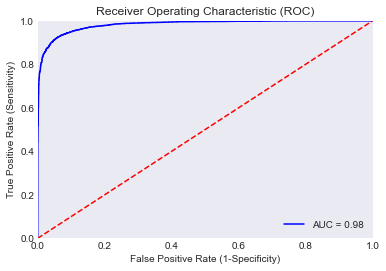

In [137]:
# ROC and AUC
xgb_base_fpr_2, xgb_base_tpr_2, xgb_base_threshold_2 = metrics.roc_curve(y_test_base, clf_xgb_base_2.predict_proba(X_test_base)[:,1]) 
xgb_base_roc_auc_2 = metrics.auc(xgb_base_fpr_2, xgb_base_tpr_2)

plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(xgb_base_fpr_2, xgb_base_tpr_2, 'b', label='AUC = %0.2f' % xgb_base_roc_auc_2)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.show()

### 4.2.1 Compare AUC, Base learner - XGBoost

The contribution from the other features with low gain score made little difference to the projects main evaluation metric AUC since it’s still on 0.98, the AUC score is very similar for the two models but the model is faster when the classifier clf_xgb_base_2 only use 60 % of the original features.  

In [138]:
print('xgb_base_roc_auc_2:',xgb_base_roc_auc_2)
print('xgb_base_roc_auc_1:',xgb_base_roc_auc_1)

xgb_base_roc_auc_2: 0.9823867725721201
xgb_base_roc_auc_1: 0.9824441855327762


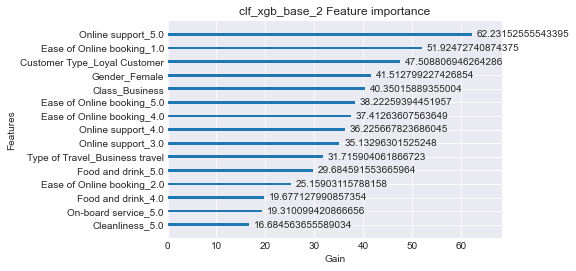

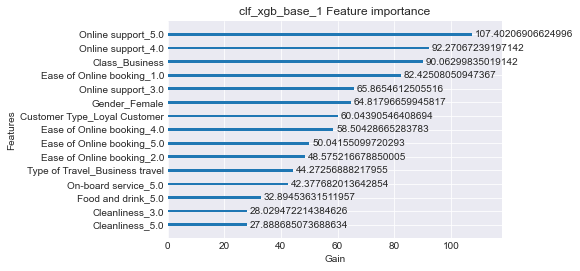

In [139]:
# importance plot showing the 15 features with the highest gain score 
xgb.plot_importance(clf_xgb_base_2, max_num_features=15, importance_type = 'gain', xlabel='Gain', title='clf_xgb_base_2 Feature importance')
plt.show()
xgb.plot_importance(clf_xgb_base_1, max_num_features=15, importance_type = 'gain', xlabel='Gain', title='clf_xgb_base_1 Feature importance')
plt.show()

### 4.2.2 XGBoost Base learner hyperparameter tuning with Bayesian optimization
I have run the Bayesian optimization and assigned the optimised values to params_tuned_base. I put the code between quotation marks after that, because the Bayesian optimizer takes about 30 minutes to run on a computer with:

* Processor: Intel® Core™ i5 10600k 4,8GHZ 
* Graphic card: Nvidia Geforce RTX2060 6GB (OC-version)
* RAM: 16GB DDR4 2666MHz 

I have created a copy of params_tuned so the rest of the project will still run smoothly and saved the output from the Bayesian optimizer in a separate xlsx file ‘bayesian_optimization_iterations.xlsx’ that you can download from my repository. 

If you want to test the Bayesian optimization anyway, remove the quotation marks and delete the cell containing the copy of params_tuned.

In [140]:
def XGbcv(eta, lambda_bo, alpha, max_depth, gamma, min_child_weight, colsample_bytree):
    LOGLOSSbest = 1.
    ITERbest = 0

    paramt = {
              'booster' : 'gbtree',
              'objective': 'binary:logistic',
              'eval_metric': 'logloss',
              'seed' : RANDOM_STATE,
              'eta' : eta, # learning rate
              'lambda' : lambda_bo, # L2 regularization term 
              'alpha' : alpha, # L1 regularization term
              'max_depth' : max_depth.astype(int), # max depth of the trees
              'gamma' : gamma, # pruning of the trees
              'min_child_weight' : min_child_weight, # min number of observations in each leaf
              'colsample_bytree' : colsample_bytree # ratio of variables to choose from in each split
              }

    xgbc = xgb.cv(
           params = paramt,
           dtrain = dtrain_base,
           num_boost_round = iter_best_base_2,
           nfold = 5,
           verbose_eval = False,
           early_stopping_rounds = 10,
           seed=RANDOM_STATE,
           shuffle=False
          )

    cv_score = xgbc['test-logloss-mean'].iloc[-1]
    if ( cv_score < LOGLOSSbest ):
        LOGLOSSbest = cv_score
        ITERbest = len(xgbc)

    return (-1.0 * cv_score)

In [141]:
"""dtrain_base = xgb.DMatrix(X_train_base, y_train_base)

print("# Global Optimization Search for XGBoost Parameters")
print("\n Please note that negative Log Loss values will be shown below. This is because")
print(" Log Loss needs to be minimized, while the Bayesian Optimizer always maximizes the function.\n")

XGbBO = BayesianOptimization(XGbcv, {'max_depth': (8, 12),
                                     'gamma': (0.01, 0.6),
                                     'min_child_weight': (1, 6),
                                     'colsample_bytree' :(0.6, 1),
                                     'eta' :(0.1, 0.45),
                                     'lambda_bo': (0, 1),
                                     'alpha': (0.7, 1)}, 
                                     random_state = RANDOM_STATE)

XGbBO.maximize(init_points=25, n_iter=575, acq="ucb", kappa = 2.85, kappa_decay = 0.999, kappa_decay_delay = 50)
print("-" * 53)

best_LOGLOSS = round((-1.0 * XGbBO.max['target']), 6)
alpha = round(XGbBO.max['params']['alpha'], 6)
colsample_bytree = round(XGbBO.max['params']['colsample_bytree'], 6)
eta = round(XGbBO.max['params']['eta'], 6)
gamma = round(XGbBO.max['params']['gamma'], 6)
lambda_bo = round(XGbBO.max['params']['lambda_bo'], 6)
max_depth = round(XGbBO.max['params']['max_depth'])
min_child_weight = round(XGbBO.max['params']['min_child_weight'], 6)

print("\n Best Log Loss value: %f" % best_LOGLOSS)
print(" Best XGBoost parameters:")
print(" max_depth=%d, gamma=%f, min_child_weight=%f, colsample_bytree=%f, eta=%f, lambda_bo=%f, alpha=%f" % (int(max_depth), gamma, min_child_weight, colsample_bytree, eta, lambda_bo, alpha))"""

# Global Optimization Search for XGBoost Parameters

 Please note that negative Log Loss values will be shown below. This is because
 Log Loss needs to be minimized, while the Bayesian Optimizer always maximizes the function.

|   iter    |  target   |   alpha   | colsam... |    eta    |   gamma   | lambda_bo | max_depth | min_ch... |
-------------------------------------------------------------------------------------------------------------
|  1        | -0.1691   |  0.8124   |  0.9803   |  0.3562   |  0.3632   |  0.156    |  8.624    |  1.29     |
|  2        | -0.1668   |  0.9599   |  0.8404   |  0.3478   |  0.02214  |  0.9699   |  11.33    |  2.062    |
|  3        | -0.1651   |  0.7545   |  0.6734   |  0.2065   |  0.3196   |  0.4319   |  9.165    |  4.059    |
|  4        | -0.1661   |  0.7418   |  0.7169   |  0.2282   |  0.2791   |  0.7852   |  8.799    |  3.571    |
|  5        | -0.1678   |  0.8777   |  0.6186   |  0.3126   |  0.1106   |  0.06505  |  11.8     |  5.828    |
|  

|  44       | -0.1649   |  0.8737   |  0.7961   |  0.1764   |  0.354    |  0.3564   |  8.637    |  3.393    |
|  45       | -0.1642   |  0.9348   |  0.792    |  0.1699   |  0.06387  |  0.8891   |  9.312    |  2.098    |
|  46       | -0.1696   |  0.8211   |  0.8667   |  0.449    |  0.3313   |  0.2022   |  11.15    |  2.588    |
|  47       | -0.166    |  0.8778   |  0.6874   |  0.2194   |  0.2271   |  0.445    |  11.98    |  3.893    |
|  48       | -0.1653   |  0.9224   |  0.8557   |  0.2058   |  0.498    |  0.3862   |  8.57     |  3.352    |
|  49       | -0.1667   |  0.8728   |  0.8105   |  0.2683   |  0.01675  |  0.4844   |  10.02    |  1.148    |
|  50       | -0.165    |  0.9273   |  0.942    |  0.1617   |  0.1934   |  0.8368   |  9.39     |  2.144    |
|  51       | -0.1663   |  0.8564   |  0.6268   |  0.2424   |  0.1522   |  0.4195   |  11.91    |  3.892    |
|  52       | -0.1656   |  0.9      |  0.7058   |  0.1737   |  0.4442   |  0.4153   |  8.525    |  3.253    |
|  53     

|  89       | -0.1705   |  0.7031   |  0.8667   |  0.4463   |  0.2095   |  0.4996   |  10.87    |  1.476    |
|  90       | -0.164    |  0.9624   |  0.8767   |  0.1151   |  0.1336   |  0.3228   |  11.19    |  3.91     |
|  91       | -0.1633   |  1.0      |  0.6676   |  0.1449   |  0.2083   |  0.7057   |  9.12     |  1.824    |
|  92       | -0.1668   |  0.9783   |  0.7295   |  0.2669   |  0.02795  |  0.4523   |  11.79    |  4.281    |
|  93       | -0.1646   |  0.9477   |  0.7105   |  0.2262   |  0.1549   |  0.864    |  9.149    |  2.014    |
|  94       | -0.1648   |  1.0      |  0.6      |  0.1192   |  0.2816   |  0.5658   |  9.16     |  1.857    |
|  95       | -0.166    |  0.7701   |  0.7283   |  0.2204   |  0.185    |  0.8402   |  10.43    |  5.166    |
|  96       | -0.1676   |  0.818    |  0.7776   |  0.368    |  0.19     |  0.5939   |  8.876    |  2.591    |
|  97       | -0.164    |  0.9948   |  0.6959   |  0.1497   |  0.1684   |  0.7527   |  9.177    |  1.827    |
|  98     

|  134      | -0.1659   |  0.8684   |  0.8269   |  0.2554   |  0.07192  |  0.9038   |  10.39    |  4.808    |
|  135      | -0.1679   |  0.8323   |  0.9949   |  0.2999   |  0.1511   |  0.72     |  11.97    |  3.858    |
|  136      | -0.1644   |  0.8064   |  0.7625   |  0.1296   |  0.5105   |  0.4171   |  9.135    |  1.325    |
|  137      | -0.1686   |  0.7964   |  0.8283   |  0.3647   |  0.4803   |  0.013    |  11.94    |  3.15     |
|  138      | -0.1645   |  0.9042   |  0.8612   |  0.1619   |  0.2062   |  0.5598   |  9.373    |  3.901    |
|  139      | -0.1676   |  0.8089   |  0.8743   |  0.2838   |  0.4373   |  0.6833   |  11.9     |  3.614    |
|  140      | -0.1677   |  0.9381   |  0.7365   |  0.3677   |  0.07713  |  0.2692   |  9.726    |  2.774    |
|  141      | -0.1649   |  0.9814   |  0.7607   |  0.118    |  0.3887   |  0.749    |  9.173    |  1.841    |
|  142      | -0.1643   |  1.0      |  0.8443   |  0.1      |  0.2769   |  0.2053   |  11.11    |  3.926    |
|  143    

|  180      | -0.166    |  0.7358   |  0.6588   |  0.3223   |  0.5329   |  0.6915   |  9.122    |  2.145    |
|  181      | -0.1686   |  0.777    |  0.929    |  0.3604   |  0.2132   |  0.8207   |  8.511    |  1.408    |
|  182      | -0.1647   |  1.0      |  0.8841   |  0.1      |  0.1379   |  0.2119   |  11.15    |  3.792    |
|  183      | -0.1675   |  0.7368   |  0.8652   |  0.3175   |  0.5389   |  0.4223   |  8.046    |  2.583    |
|  184      | -0.1642   |  0.912    |  0.7469   |  0.1      |  0.1965   |  0.3931   |  11.2     |  3.813    |
|  185      | -0.1671   |  0.7883   |  0.6658   |  0.3178   |  0.01375  |  0.8228   |  8.064    |  5.875    |
|  186      | -0.1702   |  0.782    |  0.9994   |  0.4184   |  0.5278   |  0.1825   |  8.288    |  5.157    |
|  187      | -0.1681   |  0.7874   |  0.8661   |  0.4221   |  0.4998   |  0.9924   |  10.79    |  4.056    |
|  188      | -0.1648   |  0.7254   |  0.6315   |  0.1478   |  0.5281   |  0.4079   |  8.972    |  1.213    |
|  189    

|  226      | -0.1665   |  0.8689   |  0.7606   |  0.2449   |  0.3566   |  0.566    |  9.485    |  3.874    |
|  227      | -0.166    |  0.9333   |  0.9079   |  0.1996   |  0.3422   |  0.5936   |  8.223    |  1.208    |
|  228      | -0.1646   |  0.8125   |  0.8854   |  0.1847   |  0.184    |  0.4973   |  9.41     |  4.064    |
|  229      | -0.1662   |  0.8486   |  0.6833   |  0.1      |  0.2272   |  0.7713   |  9.183    |  1.767    |
|  230      | -0.1651   |  0.8513   |  0.8027   |  0.1637   |  0.4134   |  0.5462   |  9.184    |  1.277    |
|  231      | -0.164    |  0.7725   |  0.6347   |  0.1302   |  0.4393   |  0.452    |  11.37    |  1.662    |
|  232      | -0.1645   |  0.9648   |  0.7289   |  0.1384   |  0.1012   |  0.08029  |  11.46    |  5.865    |
|  233      | -0.1648   |  1.0      |  0.9015   |  0.1      |  0.1241   |  0.1704   |  11.0     |  3.939    |
|  234      | -0.1643   |  0.8916   |  0.614    |  0.1182   |  0.5726   |  0.429    |  11.2     |  1.67     |
|  235    

|  272      | -0.1637   |  0.9011   |  0.8293   |  0.1      |  0.4776   |  0.4362   |  11.33    |  1.566    |
|  273      | -0.168    |  0.7565   |  0.704    |  0.2979   |  0.2093   |  0.04514  |  9.736    |  1.827    |
|  274      | -0.167    |  0.8927   |  0.7711   |  0.3799   |  0.548    |  0.593    |  11.26    |  1.057    |
|  275      | -0.1653   |  0.8766   |  0.985    |  0.1      |  0.2434   |  0.2414   |  11.2     |  3.927    |
|  276      | -0.1651   |  0.9475   |  0.866    |  0.1377   |  0.117    |  0.3401   |  9.756    |  4.938    |
|  277      | -0.1671   |  0.8837   |  0.6643   |  0.3017   |  0.5521   |  0.643    |  9.269    |  1.949    |
|  278      | -0.1638   |  0.9007   |  0.7555   |  0.1      |  0.4494   |  0.3473   |  11.44    |  1.606    |
|  279      | -0.1639   |  0.8341   |  0.7705   |  0.1      |  0.381    |  0.4594   |  11.32    |  1.694    |
|  280      | -0.1662   |  0.749    |  0.6877   |  0.112    |  0.1198   |  0.5782   |  9.959    |  4.989    |
|  281    

|  317      | -0.1663   |  0.8304   |  0.741    |  0.1309   |  0.2202   |  0.5261   |  8.551    |  1.933    |
|  318      | -0.1648   |  0.9294   |  0.9294   |  0.1961   |  0.5007   |  0.5992   |  11.27    |  1.672    |
|  319      | -0.1656   |  0.986    |  0.8006   |  0.2598   |  0.3718   |  0.1709   |  11.11    |  4.643    |
|  320      | -0.1644   |  0.7893   |  0.8284   |  0.1057   |  0.3981   |  0.2199   |  10.92    |  2.13     |
|  321      | -0.165    |  0.8691   |  0.6228   |  0.1034   |  0.447    |  0.137    |  10.93    |  2.059    |
|  322      | -0.1725   |  0.7643   |  0.6249   |  0.4459   |  0.06709  |  0.8602   |  11.68    |  1.124    |
|  323      | -0.1642   |  0.7      |  0.6925   |  0.1      |  0.4537   |  0.4811   |  11.37    |  1.831    |
|  324      | -0.1634   |  1.0      |  0.8836   |  0.1      |  0.5273   |  0.3823   |  11.15    |  1.506    |
|  325      | -0.1665   |  0.9958   |  0.9364   |  0.2616   |  0.5836   |  0.1516   |  10.43    |  5.606    |
|  326    

|  363      | -0.164    |  1.0      |  0.8793   |  0.1      |  0.5483   |  0.4511   |  11.16    |  2.144    |
|  364      | -0.1633   |  0.8305   |  0.743    |  0.1      |  0.4638   |  0.5497   |  11.23    |  2.133    |
|  365      | -0.1647   |  0.9022   |  0.6815   |  0.2115   |  0.1671   |  0.741    |  10.57    |  3.742    |
|  366      | -0.1655   |  0.7969   |  0.9575   |  0.1483   |  0.1336   |  0.391    |  11.23    |  5.31     |
|  367      | -0.1636   |  0.8976   |  0.7492   |  0.1      |  0.6      |  0.5778   |  11.28    |  2.027    |
|  368      | -0.1645   |  0.7      |  0.6714   |  0.1      |  0.6      |  0.2351   |  10.96    |  1.974    |
|  369      | -0.1684   |  0.7021   |  0.8965   |  0.4419   |  0.4281   |  0.4752   |  10.95    |  4.944    |
|  370      | -0.1639   |  0.9411   |  0.7808   |  0.1      |  0.4301   |  0.6124   |  11.19    |  1.962    |
|  371      | -0.1674   |  0.9422   |  0.9901   |  0.3621   |  0.1846   |  0.6253   |  11.64    |  2.265    |
|  372    

|  409      | -0.1639   |  0.8794   |  0.7162   |  0.1      |  0.4835   |  0.2352   |  11.08    |  2.198    |
|  410      | -0.1657   |  0.9559   |  0.7478   |  0.2338   |  0.2023   |  0.9875   |  11.78    |  3.04     |
|  411      | -0.1666   |  0.8405   |  0.9285   |  0.2749   |  0.3022   |  0.6034   |  10.59    |  2.242    |
|  412      | -0.166    |  0.9686   |  0.6193   |  0.2984   |  0.2861   |  0.02642  |  8.586    |  1.988    |
|  413      | -0.1668   |  0.9546   |  0.8125   |  0.2917   |  0.1256   |  0.0801   |  8.999    |  2.745    |
|  414      | -0.1641   |  0.8335   |  0.8673   |  0.1      |  0.575    |  0.7251   |  11.22    |  1.927    |
|  415      | -0.1672   |  0.7958   |  0.7385   |  0.3407   |  0.3289   |  0.4953   |  10.76    |  1.577    |
|  416      | -0.164    |  0.8437   |  0.7523   |  0.1      |  0.466    |  0.7202   |  11.31    |  2.073    |
|  417      | -0.1648   |  0.7      |  0.7883   |  0.1      |  0.5983   |  0.8922   |  10.92    |  3.565    |
|  418    

|  455      | -0.1656   |  0.9324   |  0.9267   |  0.1193   |  0.05709  |  0.05345  |  10.57    |  1.437    |
|  456      | -0.1663   |  0.9447   |  0.9468   |  0.2071   |  0.2462   |  0.4673   |  8.149    |  5.191    |
|  457      | -0.1664   |  0.7067   |  0.7867   |  0.3106   |  0.3346   |  0.5082   |  9.812    |  4.166    |
|  458      | -0.1653   |  0.8092   |  0.7989   |  0.1085   |  0.09793  |  0.8113   |  10.34    |  3.82     |
|  459      | -0.1675   |  0.8103   |  0.8987   |  0.3152   |  0.3252   |  0.01346  |  11.7     |  3.382    |
|  460      | -0.1637   |  1.0      |  0.8959   |  0.1      |  0.4322   |  0.5381   |  11.13    |  1.626    |
|  461      | -0.167    |  0.7419   |  0.6276   |  0.3074   |  0.5794   |  0.32     |  8.07     |  1.93     |
|  462      | -0.1684   |  0.7083   |  0.7083   |  0.3228   |  0.1469   |  0.2639   |  11.44    |  3.258    |
|  463      | -0.1651   |  0.9473   |  0.6704   |  0.2302   |  0.4286   |  0.2709   |  8.196    |  2.111    |
|  464    

|  501      | -0.1632   |  0.9095   |  0.7722   |  0.1      |  0.498    |  0.4984   |  11.16    |  2.167    |
|  502      | -0.1678   |  0.9838   |  0.6751   |  0.4128   |  0.1783   |  0.1576   |  10.64    |  4.46     |
|  503      | -0.1642   |  0.7952   |  0.8814   |  0.1372   |  0.5211   |  0.5285   |  11.31    |  1.974    |
|  504      | -0.1644   |  0.8677   |  0.7897   |  0.1      |  0.6      |  0.1256   |  10.84    |  2.206    |
|  505      | -0.1675   |  0.9952   |  0.8088   |  0.3931   |  0.5705   |  0.5841   |  11.29    |  2.483    |
|  506      | -0.1674   |  0.7495   |  0.8965   |  0.3466   |  0.4443   |  0.579    |  11.99    |  5.42     |
|  507      | -0.167    |  0.9575   |  0.7898   |  0.2866   |  0.03988  |  0.898    |  11.27    |  5.712    |
|  508      | -0.1648   |  0.9637   |  0.9379   |  0.1622   |  0.5643   |  0.5695   |  11.1     |  1.536    |
|  509      | -0.1655   |  0.7622   |  0.9693   |  0.1295   |  0.2458   |  0.08225  |  10.74    |  1.832    |
|  510    

|  547      | -0.1649   |  1.0      |  0.6429   |  0.1      |  0.5408   |  0.4072   |  11.56    |  1.487    |
|  548      | -0.1684   |  0.8594   |  0.8032   |  0.4134   |  0.2858   |  0.2624   |  9.236    |  4.303    |
|  549      | -0.1672   |  0.7358   |  0.9276   |  0.3077   |  0.2572   |  0.7985   |  11.47    |  5.036    |
|  550      | -0.1639   |  0.864    |  0.7413   |  0.1      |  0.5907   |  0.6207   |  11.0     |  2.042    |
|  551      | -0.1652   |  0.8908   |  0.8798   |  0.1      |  0.535    |  0.768    |  10.99    |  1.943    |
|  552      | -0.1641   |  0.7      |  0.8183   |  0.1      |  0.5524   |  0.8004   |  10.38    |  2.632    |
|  553      | -0.1681   |  0.7861   |  0.6328   |  0.4146   |  0.5347   |  0.2725   |  9.029    |  3.201    |
|  554      | -0.1684   |  0.8659   |  0.8657   |  0.43     |  0.2929   |  0.2021   |  10.91    |  5.11     |
|  555      | -0.1653   |  0.7      |  0.7026   |  0.1      |  0.388    |  1.0      |  10.17    |  2.514    |
|  556    

|  593      | -0.1637   |  0.7032   |  0.7459   |  0.1      |  0.1882   |  0.7405   |  11.25    |  2.51     |
|  594      | -0.1664   |  0.9125   |  0.6197   |  0.1      |  0.1228   |  0.6946   |  11.21    |  2.484    |
|  595      | -0.1642   |  0.8371   |  0.6431   |  0.1896   |  0.5667   |  0.6631   |  10.51    |  2.954    |
|  596      | -0.1656   |  0.7494   |  0.6564   |  0.2543   |  0.5124   |  0.02758  |  10.29    |  5.821    |
|  597      | -0.1638   |  0.8674   |  0.802    |  0.1741   |  0.1466   |  0.6702   |  11.41    |  2.4      |
|  598      | -0.1633   |  0.8606   |  0.7646   |  0.1106   |  0.04661  |  0.3306   |  11.43    |  2.362    |
|  599      | -0.1647   |  0.9489   |  0.8969   |  0.1412   |  0.1951   |  0.6152   |  11.15    |  2.319    |
|  600      | -0.1641   |  0.8363   |  0.7349   |  0.1857   |  0.2722   |  0.5519   |  11.42    |  2.476    |
-----------------------------------------------------

 Best Log Loss value: 0.162935
 Best XGBoost parameters:
 max_dep

In [142]:
# from the iteration with 'Best Log Loss value' set parameters to their optimal estimated values 
"""params_tuned_base = {
    'booster' : 'gbtree',
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'seed' : RANDOM_STATE,
    'learning_rate' : eta,
    'reg_lambda' : lambda_bo,
    'reg_alpha' : alpha,
    'max_depth' : max_depth,
    'gamma' : gamma,
    'min_child_weight' : min_child_weight,
    'colsample_bytree' : colsample_bytree
    }

params_tuned_base"""

{'booster': 'gbtree',
 'objective': 'binary:logistic',
 'eval_metric': 'logloss',
 'seed': 42,
 'learning_rate': 0.113188,
 'reg_lambda': 0.317478,
 'reg_alpha': 0.928608,
 'max_depth': 11,
 'gamma': 0.590301,
 'min_child_weight': 1.760485,
 'colsample_bytree': 0.677285}

In [143]:
# copy of params_tuned_base, use it when Bayesian optimization isn't used
params_tuned_base = {'booster': 'gbtree',
 'objective': 'binary:logistic',
 'eval_metric': 'logloss',
 'seed': RANDOM_STATE,
 'learning_rate': 0.113188,
 'reg_lambda': 0.317478,
 'reg_alpha': 0.928608,
 'max_depth': 11,
 'gamma': 0.590301,
 'min_child_weight': 1.760485,
 'colsample_bytree': 0.677285}

In [144]:
dmatrix_tuned_base = xgb.DMatrix(X_train_base, y_train_base)

In [145]:
# params_tuned_base is set as parameter values in the cross-validation 
xgb_base_cv_tuned = xgb.cv(dtrain=dmatrix_tuned_base, params=params_tuned_base, nfold=5,
num_boost_round=500, early_stopping_rounds=10, verbose_eval=True, seed=RANDOM_STATE, shuffle=False)

[0]	train-logloss:0.62839+0.00023	test-logloss:0.63038+0.00082
[1]	train-logloss:0.56842+0.00430	test-logloss:0.57155+0.00499
[2]	train-logloss:0.52074+0.00638	test-logloss:0.52542+0.00842
[3]	train-logloss:0.47943+0.00754	test-logloss:0.48562+0.00989
[4]	train-logloss:0.44259+0.00596	test-logloss:0.45018+0.00916
[5]	train-logloss:0.41006+0.00816	test-logloss:0.41913+0.01192
[6]	train-logloss:0.38076+0.00673	test-logloss:0.39097+0.01030
[7]	train-logloss:0.35808+0.00591	test-logloss:0.36923+0.00962
[8]	train-logloss:0.33715+0.00535	test-logloss:0.34950+0.01011
[9]	train-logloss:0.31848+0.00500	test-logloss:0.33178+0.00983
[10]	train-logloss:0.30242+0.00660	test-logloss:0.31644+0.01128
[11]	train-logloss:0.28886+0.00581	test-logloss:0.30384+0.01169
[12]	train-logloss:0.27600+0.00486	test-logloss:0.29201+0.01114
[13]	train-logloss:0.26386+0.00459	test-logloss:0.28092+0.01069
[14]	train-logloss:0.25353+0.00379	test-logloss:0.27153+0.01013
[15]	train-logloss:0.24376+0.00436	test-logloss:0.

<function matplotlib.pyplot.show(close=None, block=None)>

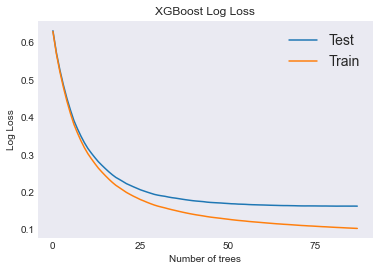

In [146]:
# plot the cross-validation log loss (early_stopping_rounds set to 10)
plt.plot(xgb_base_cv_tuned.index, xgb_base_cv_tuned['test-logloss-mean'], label='Test')
plt.plot(xgb_base_cv_tuned.index, xgb_base_cv_tuned['train-logloss-mean'], label='Train')
plt.xticks(np.arange(min(xgb_base_cv_tuned.index), max(xgb_base_cv_tuned.index)+1.1, 25)) 
plt.ylabel('Log Loss')
plt.xlabel('Number of trees')
plt.title('XGBoost Log Loss')
plt.legend(fontsize=14)
plt.show

In [147]:
# get the the best iteration (lowest test log loss) from xgb_base_cv_tuned
iter_best_tuned_base = len(xgb_base_cv_tuned)
iter_best_tuned_base #88

88

In [148]:
# use the best iteration from xgb_base_cv_tuned and the parameters from params_tuned_base, then train the model. 
clf_xgb_base_tuned = xgb.XGBClassifier(n_estimators=iter_best_tuned_base, random_state=RANDOM_STATE, use_label_encoder=False, eval_metric='logloss',
learning_rate=0.113188, reg_lambda=0.317478, reg_alpha=0.928608, max_depth=11, gamma=0.590301, min_child_weight=1.760485, colsample_bytree=0.677285)

clf_xgb_base_tuned.fit(X_train_base, y_train_base)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.677285,
              eval_metric='logloss', gamma=0.590301, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.113188, max_delta_step=0, max_depth=11,
              min_child_weight=1.760485, missing=nan, monotone_constraints='()',
              n_estimators=88, n_jobs=12, num_parallel_tree=1, random_state=42,
              reg_alpha=0.928608, reg_lambda=0.317478, scale_pos_weight=1,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

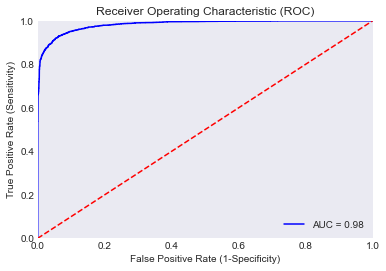

In [149]:
# ROC and AUC
xgb_base_fpr_tuned, xgb_base_tpr_tuned, xgb_base_threshold_tuned = metrics.roc_curve(y_test_base, clf_xgb_base_tuned.predict_proba(X_test_base)[:,1]) 
xgb_base_roc_auc_tuned = metrics.auc(xgb_base_fpr_tuned, xgb_base_tpr_tuned)

plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(xgb_base_fpr_tuned, xgb_base_tpr_tuned, 'b', label='AUC = %0.2f' % xgb_base_roc_auc_tuned)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.show()

### 4.2.3 Compare AUC, Base learner - XGBoost hyperparameter tuned

There is a slightly difference regarding the AUC for the tuned clf_xgb_base_tuned classifier and non-tuned clf_xgb_base_2. 

But the tuned classifier clf_xgb_base_tuned have a higher AUC score (on the same number of features) 

In [150]:
# compare the the tuned and non-tuned base learner XGBoost AUC 
print(f'xgb_base_roc_auc_tuned: {xgb_base_roc_auc_tuned}')
print(f'xgb_base_roc_auc_2:     {xgb_base_roc_auc_2}')

xgb_base_roc_auc_tuned: 0.9833179314361306
xgb_base_roc_auc_2:     0.9823867725721201


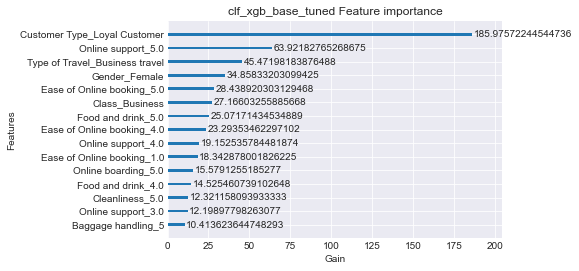

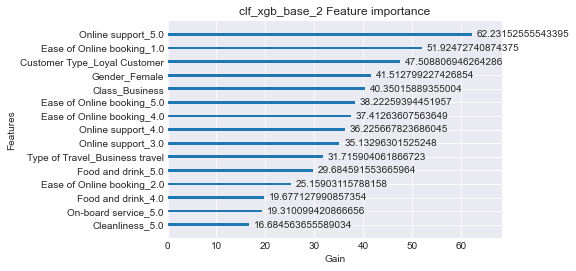

In [151]:
# importance plot showing the 15 features with the highest gain score 
xgb.plot_importance(clf_xgb_base_tuned, max_num_features=15, importance_type = 'gain', xlabel='Gain', title='clf_xgb_base_tuned Feature importance')
plt.show()
xgb.plot_importance(clf_xgb_base_2, max_num_features=15, importance_type = 'gain', xlabel='Gain', title='clf_xgb_base_2 Feature importance')
plt.show()

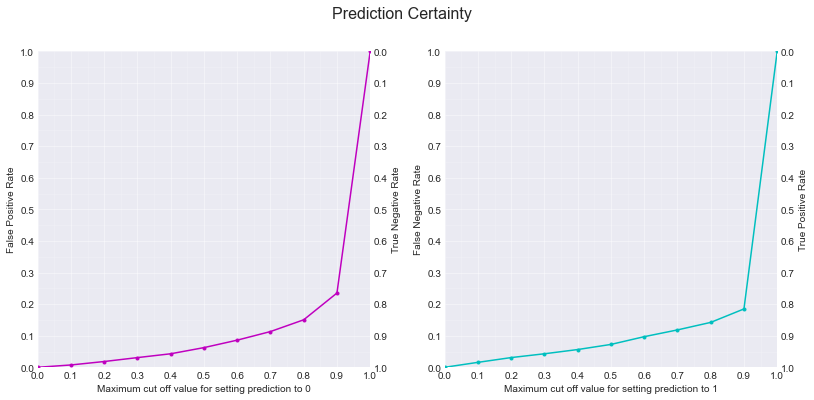

In [152]:
xgb_base_prediction_certainty = prediction_certainty(y_test_base, clf_xgb_base_tuned.predict_proba(X_test_base))
xgb_base_prediction_certainty

## 4.3 Stacking Meta Learner - XGBoost

In [153]:
# get df_meta probabilities from clf_glm_base_2 model
glm_meta_probas = df_meta.drop('Satisfaction', axis=1)
glm_meta_probas = glm_meta_probas.loc[:,rfecv_base.support_]
glm_meta_probas = clf_glm_base_2.predict_proba(glm_meta_probas)[:,1]

In [154]:
# get df_meta probabilities from the clf_xgb_base_tuned model
xgb_meta_probas = df_meta.drop('Satisfaction', axis=1)
xgb_meta_probas = xgb_meta_probas.loc[:,features_keep_base.index]
xgb_meta_probas = clf_xgb_base_tuned.predict_proba(xgb_meta_probas)[:,1]

In [155]:
# assign the probabilities from glm_meta_probas and xgb_meta_probas to the df_meta dataframe
df_meta = df_meta.assign(glm_proba=glm_meta_probas, xgb_proba=xgb_meta_probas)

In [156]:
# create the predict and target variables for the meta learners
y_meta = df_meta.Satisfaction
X_meta = df_meta.drop('Satisfaction', axis=1)

# create train and test set
X_train_meta, X_test_meta, y_train_meta, y_test_meta = train_test_split(X_meta, y_meta, test_size=0.2, random_state=RANDOM_STATE, stratify=y_meta, shuffle=True)

In [157]:
# cast the train partition to dmatrix
dmatrix_meta_1 = xgb.DMatrix(X_train_meta, y_train_meta)

In [158]:
# set the parameters
params = {
    'booster' : 'gbtree', 
    'objective' : 'binary:logistic', 
    'eval_metric': 'logloss', 
    'seed': RANDOM_STATE 
    }

In [159]:
# preform a cross-validation to approximate the preferable n_estimator (optimal number of boosting rounds) for the XGBoost meta learner classifier
meta_cv_1 = xgb.cv(dtrain=dmatrix_meta_1, params=params, nfold=5,
num_boost_round=500, early_stopping_rounds=10, verbose_eval=True, seed=RANDOM_STATE, shuffle=False)

[0]	train-logloss:0.53106+0.00071	test-logloss:0.53214+0.00117
[1]	train-logloss:0.44009+0.00071	test-logloss:0.44238+0.00208
[2]	train-logloss:0.38476+0.00180	test-logloss:0.38789+0.00243
[3]	train-logloss:0.34817+0.00173	test-logloss:0.35237+0.00332
[4]	train-logloss:0.32137+0.00141	test-logloss:0.32644+0.00459
[5]	train-logloss:0.30252+0.00172	test-logloss:0.30853+0.00434
[6]	train-logloss:0.28791+0.00247	test-logloss:0.29503+0.00427
[7]	train-logloss:0.27788+0.00250	test-logloss:0.28591+0.00412
[8]	train-logloss:0.26948+0.00315	test-logloss:0.27812+0.00413
[9]	train-logloss:0.26388+0.00306	test-logloss:0.27342+0.00425
[10]	train-logloss:0.25887+0.00257	test-logloss:0.26931+0.00394
[11]	train-logloss:0.25379+0.00362	test-logloss:0.26478+0.00415
[12]	train-logloss:0.24915+0.00571	test-logloss:0.26085+0.00594
[13]	train-logloss:0.24398+0.00568	test-logloss:0.25645+0.00542
[14]	train-logloss:0.24154+0.00571	test-logloss:0.25461+0.00576
[15]	train-logloss:0.23665+0.00425	test-logloss:0.

[128]	train-logloss:0.10969+0.00221	test-logloss:0.17615+0.00146
[129]	train-logloss:0.10928+0.00221	test-logloss:0.17616+0.00147
[130]	train-logloss:0.10892+0.00230	test-logloss:0.17614+0.00153
[131]	train-logloss:0.10862+0.00216	test-logloss:0.17613+0.00148
[132]	train-logloss:0.10835+0.00207	test-logloss:0.17619+0.00142


<function matplotlib.pyplot.show(close=None, block=None)>

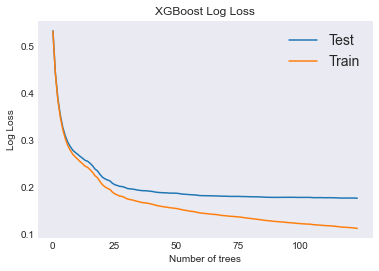

In [160]:
# plot the cross-validation log loss (early_stopping_rounds set to 10)
plt.plot(meta_cv_1.index, meta_cv_1['test-logloss-mean'], label='Test')
plt.plot(meta_cv_1.index, meta_cv_1['train-logloss-mean'], label='Train')
plt.xticks(np.arange(min(meta_cv_1.index), max(meta_cv_1.index)+1.1, 25)) 
plt.ylabel('Log Loss')
plt.xlabel('Number of trees')
plt.title('XGBoost Log Loss')
plt.legend(fontsize=14)
plt.show

In [161]:
# get the the best iteration (lowest test log loss) from meta_cv_1
iter_best_meta_1 = len(meta_cv_1)
iter_best_meta_1 #124

124

In [162]:
# create a XGBClassifer instance and train the meta model. 
clf_meta_1 = xgb.XGBClassifier(n_estimators=iter_best_meta_1, random_state=RANDOM_STATE, use_label_encoder=False, eval_metric='logloss')
clf_meta_1.fit(X_train_meta, y_train_meta)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=124, n_jobs=12,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

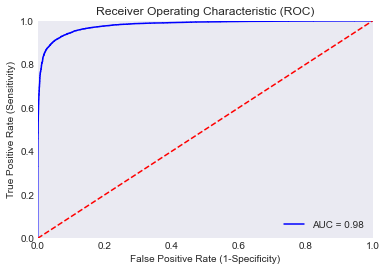

In [163]:
# ROC and AUC
meta_fpr_1, meta_tpr_1, meta_threshold_1 = metrics.roc_curve(y_test_meta, clf_meta_1.predict_proba(X_test_meta)[:,1]) 
meta_roc_auc_1 = metrics.auc(meta_fpr_1, meta_tpr_1)

plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(meta_fpr_1, meta_tpr_1, 'b', label='AUC = %0.2f' % meta_roc_auc_1)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.show()

In [164]:
print('meta_roc_auc_1:',meta_roc_auc_1)

meta_roc_auc_1: 0.9802455722396547


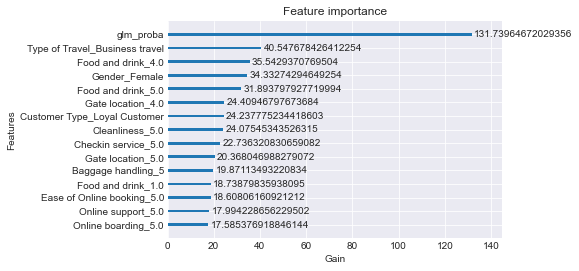

In [165]:
# importance plot showing the 15 features with the highest gain score 
xgb.plot_importance(clf_meta_1, max_num_features=15, importance_type = 'gain', xlabel='Gain')
plt.show()

In [166]:
# Array with the gain scores (feature names not displayed)
np.array(sorted(clf_meta_1.get_booster().get_score(importance_type='gain').values(),reverse=True))

array([131.73964672,  40.54767843,  35.54293708,  34.33274295,
        31.89379793,  24.40946798,  24.23777523,  24.07545344,
        22.73632083,  20.36804699,  19.87113493,  18.73879836,
        18.60806161,  17.99422866,  17.58537692,  12.31607924,
        12.29287252,  11.05191103,  11.02673797,  10.88523912,
        10.21513053,  10.03195788,   9.68962396,   9.49144969,
         8.22913523,   7.99900116,   7.99873833,   7.96998809,
         7.68419867,   7.59474908,   7.28086314,   7.23348619,
         7.23054683,   7.1223964 ,   6.67144014,   6.54079721,
         6.21425979,   6.20636515,   6.17602451,   6.17295454,
         6.03133864,   5.92842782,   5.8107888 ,   5.50752318,
         5.47676794,   5.41714975,   5.36549045,   5.26926246,
         5.25458455,   5.03725533,   5.02332658,   4.99323839,
         4.64455947,   4.59228447,   4.53105039,   4.37471497,
         4.26809098,   4.22544648,   4.17047575,   4.16771328,
         4.16043206,   4.13507436,   3.95894196,   3.92

In [167]:
# the feature names of the features I keep, and their corresponding gain score
sorted(clf_meta_1.get_booster().get_score(importance_type='gain').items(), key=lambda item: item[1], reverse=True)[:32]

[('glm_proba', 131.73964672029356),
 ('Type of Travel_Business travel', 40.547678426412254),
 ('Food and drink_4.0', 35.5429370769504),
 ('Gender_Female', 34.33274294649254),
 ('Food and drink_5.0', 31.893797927719994),
 ('Gate location_4.0', 24.40946797673684),
 ('Customer Type_Loyal Customer', 24.237775234418603),
 ('Cleanliness_5.0', 24.07545343526315),
 ('Checkin service_5.0', 22.736320830659082),
 ('Gate location_5.0', 20.368046988279072),
 ('Baggage handling_5', 19.87113493220834),
 ('Food and drink_1.0', 18.73879835938095),
 ('Ease of Online booking_5.0', 18.60806160921212),
 ('Online support_5.0', 17.994228656229502),
 ('Online boarding_5.0', 17.585376918846144),
 ('On-board service_5.0', 12.31607923708),
 ('Online support_4.0', 12.29287251822581),
 ('Class_Business', 11.051911029419355),
 ('Cleanliness_1.0', 11.02673796666667),
 ('Ease of Online booking_4.0', 10.885239124352942),
 ('Food and drink_3.0', 10.21513052982222),
 ('Leg room service_1.0', 10.031957875962963),
 ('Food

In [168]:
# the percentage (%) by features that I keep in the model
(32/len(dmatrix_meta_1.feature_names))*100

42.10526315789473

In [169]:
# get the gain scores from clf_meta_1, sort in descending order, and subset  
gain_score_meta = clf_meta_1.get_booster().get_score(importance_type='gain')
gain_score_meta_df = pd.DataFrame.from_dict(gain_score_meta, orient='index', columns = ['gain']).gain.sort_values(ascending=False)
features_keep_meta = gain_score_meta_df.iloc[:32]

In [170]:
# keep only the features with the 42.1 % highest gain scores 
X_train_meta = X_train_meta.loc[:,X_train_meta.columns.isin(features_keep_meta.index)]
X_test_meta = X_test_meta.loc[:,X_test_meta.columns.isin(features_keep_meta.index)]

In [171]:
# cast the train partition to dmatrix
dmatrix_meta_2 = xgb.DMatrix(X_train_meta, y_train_meta)

In [172]:
# preform a cross-validation to approximate the preferable n_estimator (optimal number of boosting rounds) for the XGBoost meta learner classifier
meta_cv_2 = xgb.cv(dtrain=dmatrix_meta_2, params=params, nfold=5,
num_boost_round=500, early_stopping_rounds=10, verbose_eval=True, seed=RANDOM_STATE, shuffle=False)

[0]	train-logloss:0.52983+0.00186	test-logloss:0.53071+0.00110
[1]	train-logloss:0.43899+0.00214	test-logloss:0.44081+0.00163
[2]	train-logloss:0.38356+0.00317	test-logloss:0.38611+0.00234
[3]	train-logloss:0.34622+0.00343	test-logloss:0.34953+0.00187
[4]	train-logloss:0.31920+0.00280	test-logloss:0.32333+0.00283
[5]	train-logloss:0.30041+0.00244	test-logloss:0.30502+0.00328
[6]	train-logloss:0.28559+0.00291	test-logloss:0.29086+0.00235
[7]	train-logloss:0.27517+0.00416	test-logloss:0.28106+0.00259
[8]	train-logloss:0.26732+0.00433	test-logloss:0.27372+0.00266
[9]	train-logloss:0.26059+0.00384	test-logloss:0.26764+0.00183
[10]	train-logloss:0.25531+0.00409	test-logloss:0.26268+0.00214
[11]	train-logloss:0.24980+0.00252	test-logloss:0.25769+0.00367
[12]	train-logloss:0.24488+0.00240	test-logloss:0.25312+0.00683
[13]	train-logloss:0.24195+0.00252	test-logloss:0.25068+0.00665
[14]	train-logloss:0.23891+0.00339	test-logloss:0.24809+0.00793
[15]	train-logloss:0.23330+0.00674	test-logloss:0.

<function matplotlib.pyplot.show(close=None, block=None)>

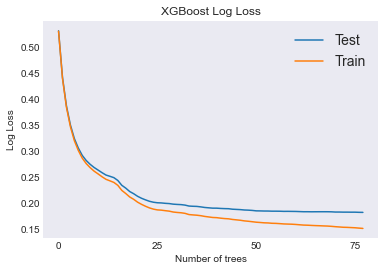

In [173]:
# plot the cross-validation log loss (early_stopping_rounds set to 10)
plt.plot(meta_cv_2.index, meta_cv_2['test-logloss-mean'], label='Test')
plt.plot(meta_cv_2.index, meta_cv_2['train-logloss-mean'], label='Train')
plt.xticks(np.arange(min(meta_cv_2.index), max(meta_cv_2.index)+1.1, 25)) 
plt.ylabel('Log Loss')
plt.xlabel('Number of trees')
plt.title('XGBoost Log Loss')
plt.legend(fontsize=14)
plt.show

In [174]:
# get the the best iteration (lowest test log loss) from meta_cv_2
iter_best_meta_2 = len(meta_cv_2)
iter_best_meta_2 #78

78

In [175]:
# create a XGBClassifer instance and train the model. 
clf_meta_2 = xgb.XGBClassifier(n_estimators=iter_best_meta_2, random_state=RANDOM_STATE, use_label_encoder=False, eval_metric='logloss')
clf_meta_2.fit(X_train_meta, y_train_meta)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=78, n_jobs=12,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

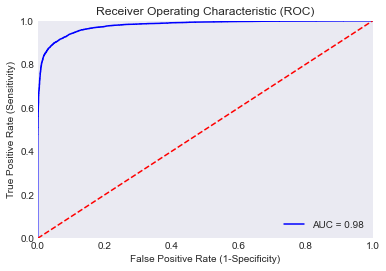

In [176]:
# ROC and AUC
meta_fpr_2, meta_tpr_2, meta_threshold_2 = metrics.roc_curve(y_test_meta, clf_meta_2.predict_proba(X_test_meta)[:,1]) 
meta_roc_auc_2 = metrics.auc(meta_fpr_2, meta_tpr_2)

plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(meta_fpr_2, meta_tpr_2, 'b', label='AUC = %0.2f' % meta_roc_auc_2)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.show()

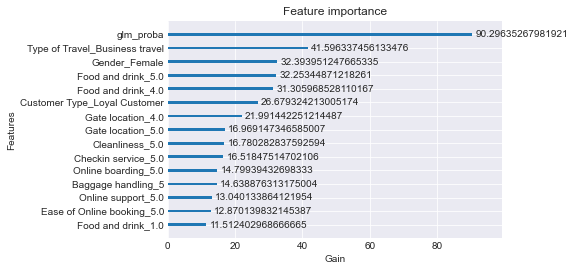

In [177]:
# importance plot showing the 15 features with the highest gain score 
xgb.plot_importance(clf_meta_2, max_num_features=15, importance_type = 'gain', xlabel='Gain')
plt.show()

### 4.3.1 Compare AUC, Meta learner - XGBoost

The contribution from the other features with low gain score once again made little difference to the projects main evaluation metric AUC since it’s still around 0.98 but the model is faster when the classifier clf_meta_2 when I cut almost 60 % of the original features  

In [178]:
print('meta_roc_auc_2',meta_roc_auc_2)
print('meta_roc_auc_1',meta_roc_auc_1)

meta_roc_auc_2 0.9789553980989986
meta_roc_auc_1 0.9802455722396547


### 4.3.2 XGBoost Meta learner hyperparameter tuning with Bayesian optimization 
I have run the Bayesian optimization and assigned the optimised values to params_tuned_meta. I put the code between quotation marks after that, because the Bayesian optimizer takes about 1 hour and 20 minutes to run on a computer with:

* Processor: Intel® Core™ i5 10600k 4,8GHZ 
* Graphic card: Nvidia Geforce RTX2060 6GB (OC-version)
* RAM: 16GB DDR4 2666MHz 

I have created a copy of params_tuned so the rest of the project will still run smoothly and saved the output from the Bayesian optimizer in a separate xlsx file ‘bayesian_optimization_iterations.xlsx’ that you can download from my repository. 

If you want to test the Bayesian optimization anyway, remove the quotation marks and delete the cell containing the copy of params_tuned. 

In [179]:
def XGbcv(eta, lambda_bo, alpha, max_depth, gamma, min_child_weight, colsample_bytree):
    LOGLOSSbest = 1.
    ITERbest = 0

    paramt = {
              'booster' : 'gbtree',
              'objective': 'binary:logistic',
              'eval_metric': 'logloss',
              'seed' : RANDOM_STATE,
              'eta' : eta, # learning rate
              'lambda' : lambda_bo, # L2 regularization term 
              'alpha' : alpha, # L1 regularization term
              'max_depth' : max_depth.astype(int), # max depth of the trees
              'gamma' : gamma, # pruning of the trees
              'min_child_weight' : min_child_weight, # min number of observations in each leaf
              'colsample_bytree' : colsample_bytree # ratio of variables to choose from in each split
              }

    xgbc = xgb.cv(
           params = paramt,
           dtrain = dtrain_meta,
           num_boost_round = iter_best_meta_2,
           nfold = 5,
           verbose_eval = False,
           early_stopping_rounds = 10,
           seed=RANDOM_STATE,
           shuffle=False
          )

    cv_score = xgbc['test-logloss-mean'].iloc[-1]
    if ( cv_score < LOGLOSSbest ):
        LOGLOSSbest = cv_score
        ITERbest = len(xgbc)

    return (-1.0 * cv_score)

In [180]:
"""dtrain_meta = xgb.DMatrix(X_train_meta, y_train_meta)

print("# Global Optimization Search for XGBoost Parameters")
print("\n Please note that negative Log Loss values will be shown below. This is because")
print(" Log Loss needs to be minimized, while the Bayesian Optimizer always maximizes the function.\n")

XGbBO = BayesianOptimization(XGbcv, {'max_depth': (8, 12),
                                     'gamma': (0.01, 0.45),
                                     'min_child_weight': (2, 7),
                                     'colsample_bytree' :(0.6, 1),
                                     'eta' :(0.1, 0.45),
                                     'lambda_bo': (0.7, 1.5),
                                     'alpha': (0.7, 1.2)}, 
                                     random_state = RANDOM_STATE)

XGbBO.maximize(init_points=25, n_iter=575, acq="ucb", kappa = 2.85, kappa_decay = 0.999, kappa_decay_delay = 50)
print("-" * 53)

best_LOGLOSS = round((-1.0 * XGbBO.max['target']), 6)
alpha = round(XGbBO.max['params']['alpha'], 6)
colsample_bytree = round(XGbBO.max['params']['colsample_bytree'], 6)
eta = round(XGbBO.max['params']['eta'], 6)
gamma = round(XGbBO.max['params']['gamma'], 6)
lambda_bo = round(XGbBO.max['params']['lambda_bo'], 6)
max_depth = round(XGbBO.max['params']['max_depth'])
min_child_weight = round(XGbBO.max['params']['min_child_weight'], 6)

print("\n Best Log Loss value: %f" % best_LOGLOSS)
print(" Best XGBoost parameters:")
print(" max_depth=%d, gamma=%f, min_child_weight=%f, colsample_bytree=%f, eta=%f, lambda_bo=%f, alpha=%f" % (int(max_depth), gamma, min_child_weight, colsample_bytree, eta, lambda_bo, alpha))"""

# Global Optimization Search for XGBoost Parameters

 Please note that negative Log Loss values will be shown below. This is because
 Log Loss needs to be minimized, while the Bayesian Optimizer always maximizes the function.

|   iter    |  target   |   alpha   | colsam... |    eta    |   gamma   | lambda_bo | max_depth | min_ch... |
-------------------------------------------------------------------------------------------------------------
|  1        | -0.1795   |  0.8873   |  0.9803   |  0.3562   |  0.2734   |  0.8248   |  8.624    |  2.29     |
|  2        | -0.18     |  1.133    |  0.8404   |  0.3478   |  0.01906  |  1.476    |  11.33    |  3.062    |
|  3        | -0.178    |  0.7909   |  0.6734   |  0.2065   |  0.2409   |  1.046    |  9.165    |  5.059    |
|  4        | -0.1777   |  0.7697   |  0.7169   |  0.2282   |  0.2107   |  1.328    |  8.799    |  4.571    |
|  5        | -0.1785   |  0.9962   |  0.6186   |  0.3126   |  0.08503  |  0.752    |  11.8     |  6.828    |
|  

|  44       | -0.1775   |  1.119    |  0.8371   |  0.2309   |  0.1325   |  1.489    |  9.671    |  5.77     |
|  45       | -0.1784   |  0.8645   |  0.8894   |  0.22     |  0.2781   |  1.294    |  8.092    |  2.986    |
|  46       | -0.1834   |  0.9018   |  0.8667   |  0.449    |  0.2496   |  0.8617   |  11.15    |  3.588    |
|  47       | -0.1774   |  0.9963   |  0.6874   |  0.2194   |  0.1719   |  1.056    |  11.98    |  4.893    |
|  48       | -0.1784   |  0.7314   |  0.9938   |  0.1808   |  0.04223  |  1.493    |  11.51    |  6.428    |
|  49       | -0.1793   |  0.988    |  0.8105   |  0.2683   |  0.01503  |  1.088    |  10.02    |  2.148    |
|  50       | -0.1783   |  1.103    |  0.9958   |  0.1664   |  0.07856  |  0.9495   |  9.632    |  4.003    |
|  51       | -0.1784   |  1.167    |  0.8754   |  0.3329   |  0.3867   |  0.9619   |  8.007    |  5.237    |
|  52       | -0.1769   |  0.8118   |  0.7664   |  0.3401   |  0.2177   |  1.131    |  8.756    |  5.936    |
|  53     

|  90       | -0.1798   |  1.137    |  0.8767   |  0.1151   |  0.1022   |  0.9583   |  11.19    |  4.91     |
|  91       | -0.178    |  0.8553   |  0.6      |  0.2072   |  0.01163  |  1.431    |  8.413    |  6.774    |
|  92       | -0.1776   |  1.164    |  0.7295   |  0.2669   |  0.02338  |  1.062    |  11.79    |  5.281    |
|  93       | -0.1777   |  0.8469   |  0.8667   |  0.2521   |  0.2666   |  1.285    |  8.392    |  6.748    |
|  94       | -0.1778   |  0.7696   |  0.6      |  0.3571   |  0.2378   |  1.255    |  8.577    |  6.717    |
|  95       | -0.1764   |  0.8169   |  0.7283   |  0.2204   |  0.1405   |  1.372    |  10.43    |  6.166    |
|  96       | -0.1773   |  0.7261   |  0.6      |  0.2787   |  0.01     |  1.4      |  10.5     |  6.226    |
|  97       | -0.1798   |  0.775    |  0.7861   |  0.3917   |  0.3069   |  1.118    |  10.84    |  4.54     |
|  98       | -0.1777   |  0.976    |  0.6008   |  0.1612   |  0.04469  |  1.366    |  10.39    |  6.225    |
|  99     

|  135      | -0.1805   |  0.9204   |  0.9949   |  0.2999   |  0.1153   |  1.276    |  11.97    |  4.858    |
|  136      | -0.1777   |  1.028    |  0.6      |  0.45     |  0.01     |  1.15     |  8.264    |  5.924    |
|  137      | -0.1812   |  0.8607   |  0.8283   |  0.3647   |  0.3607   |  0.7104   |  11.94    |  4.15     |
|  138      | -0.1774   |  1.04     |  0.8612   |  0.1619   |  0.1563   |  1.148    |  9.373    |  4.901    |
|  139      | -0.1792   |  0.8815   |  0.8743   |  0.2838   |  0.3286   |  1.247    |  11.9     |  4.614    |
|  140      | -0.1788   |  1.097    |  0.7365   |  0.3677   |  0.06007  |  0.9154   |  9.726    |  3.774    |
|  141      | -0.1768   |  0.8256   |  0.8216   |  0.2613   |  0.05868  |  1.271    |  8.6      |  6.534    |
|  142      | -0.1778   |  0.7187   |  0.853    |  0.29     |  0.2036   |  1.259    |  8.432    |  6.295    |
|  143      | -0.1778   |  0.7674   |  0.824    |  0.2705   |  0.2359   |  1.081    |  9.796    |  5.139    |
|  144    

|  180      | -0.1775   |  0.7596   |  0.6588   |  0.3223   |  0.4      |  1.253    |  9.122    |  3.145    |
|  181      | -0.1788   |  0.8284   |  0.929    |  0.3604   |  0.1615   |  1.357    |  8.511    |  2.408    |
|  182      | -0.1776   |  1.2      |  0.6      |  0.3552   |  0.01     |  0.9047   |  8.123    |  5.021    |
|  183      | -0.1774   |  0.7613   |  0.8652   |  0.3175   |  0.4044   |  1.038    |  8.046    |  3.583    |
|  184      | -0.1763   |  1.072    |  0.6507   |  0.2997   |  0.08816  |  1.189    |  8.434    |  5.959    |
|  185      | -0.1767   |  0.8472   |  0.6658   |  0.3178   |  0.0128   |  1.358    |  8.064    |  6.875    |
|  186      | -0.18     |  0.8367   |  0.9994   |  0.4184   |  0.3962   |  0.846    |  8.288    |  6.157    |
|  187      | -0.1811   |  0.8457   |  0.8661   |  0.4221   |  0.3753   |  1.494    |  10.79    |  5.056    |
|  188      | -0.1775   |  0.9017   |  0.7655   |  0.3239   |  0.06375  |  1.26     |  8.558    |  6.296    |
|  189    

|  225      | -0.1797   |  0.7935   |  0.8608   |  0.3829   |  0.3853   |  1.184    |  8.263    |  2.822    |
|  226      | -0.1819   |  0.8292   |  0.8622   |  0.3992   |  0.3371   |  1.289    |  11.6     |  4.285    |
|  227      | -0.1783   |  1.089    |  0.9079   |  0.1996   |  0.2578   |  1.175    |  8.223    |  2.208    |
|  228      | -0.1778   |  0.9447   |  0.6849   |  0.2307   |  0.3061   |  1.289    |  8.955    |  4.758    |
|  229      | -0.1773   |  0.9878   |  0.6      |  0.3673   |  0.2499   |  1.127    |  9.004    |  4.765    |
|  230      | -0.1778   |  1.107    |  0.654    |  0.3658   |  0.1709   |  1.084    |  8.391    |  4.888    |
|  231      | -0.179    |  0.8208   |  0.6347   |  0.1302   |  0.3301   |  1.062    |  11.37    |  2.662    |
|  232      | -0.1779   |  1.141    |  0.7289   |  0.1384   |  0.07799  |  0.7642   |  11.46    |  6.865    |
|  233      | -0.1764   |  0.8527   |  0.6      |  0.2953   |  0.1994   |  1.217    |  8.997    |  4.611    |
|  234    

|  271      | -0.1788   |  1.063    |  0.8544   |  0.1406   |  0.05161  |  1.061    |  11.63    |  2.938    |
|  272      | -0.1777   |  1.006    |  0.6948   |  0.3814   |  0.2257   |  1.165    |  8.449    |  6.011    |
|  273      | -0.178    |  0.7941   |  0.704    |  0.2979   |  0.1586   |  0.7361   |  9.736    |  2.827    |
|  274      | -0.1795   |  1.021    |  0.7711   |  0.3799   |  0.4112   |  1.174    |  11.26    |  2.057    |
|  275      | -0.1761   |  1.2      |  0.6      |  0.2516   |  0.03186  |  1.19     |  8.425    |  5.99     |
|  276      | -0.1786   |  1.112    |  0.866    |  0.1377   |  0.08982  |  0.9721   |  9.756    |  5.938    |
|  277      | -0.177    |  1.006    |  0.6643   |  0.3017   |  0.4143   |  1.214    |  9.269    |  2.949    |
|  278      | -0.1769   |  0.8355   |  0.6101   |  0.2435   |  0.217    |  1.083    |  9.102    |  4.713    |
|  279      | -0.1773   |  0.8924   |  0.8251   |  0.2675   |  0.01759  |  1.277    |  8.375    |  6.534    |
|  280    

|  316      | -0.1768   |  1.115    |  0.6      |  0.2716   |  0.2191   |  1.043    |  8.353    |  5.116    |
|  317      | -0.1814   |  0.9174   |  0.741    |  0.1309   |  0.1668   |  1.121    |  8.551    |  2.933    |
|  318      | -0.1789   |  1.148    |  0.8403   |  0.3585   |  0.3593   |  1.24     |  9.3      |  5.844    |
|  319      | -0.178    |  1.177    |  0.8006   |  0.2598   |  0.2798   |  0.8368   |  11.11    |  5.643    |
|  320      | -0.1768   |  0.8401   |  0.6027   |  0.3085   |  0.2281   |  1.325    |  10.64    |  6.268    |
|  321      | -0.1763   |  1.2      |  0.6      |  0.2834   |  0.2612   |  0.984    |  8.569    |  4.996    |
|  322      | -0.181    |  0.8071   |  0.6249   |  0.4459   |  0.05257  |  1.388    |  11.68    |  2.124    |
|  323      | -0.1765   |  1.183    |  0.6      |  0.331    |  0.08468  |  1.075    |  8.363    |  5.983    |
|  324      | -0.1782   |  1.011    |  0.6367   |  0.1624   |  0.1212   |  0.907    |  9.17     |  2.131    |
|  325    

|  362      | -0.1804   |  0.7224   |  0.8586   |  0.3379   |  0.3126   |  1.026    |  11.51    |  5.261    |
|  363      | -0.1789   |  0.7256   |  0.9377   |  0.2326   |  0.1247   |  1.413    |  9.14     |  2.866    |
|  364      | -0.177    |  0.899    |  0.6      |  0.2693   |  0.2926   |  1.112    |  9.315    |  2.969    |
|  365      | -0.1773   |  1.037    |  0.6815   |  0.2115   |  0.1272   |  1.293    |  10.57    |  4.742    |
|  366      | -0.1787   |  0.8616   |  0.9575   |  0.1483   |  0.1022   |  1.013    |  11.23    |  6.31     |
|  367      | -0.1775   |  0.9464   |  0.6      |  0.3383   |  0.45     |  1.131    |  9.427    |  2.965    |
|  368      | -0.1772   |  0.8751   |  0.7458   |  0.2393   |  0.4329   |  1.08     |  9.279    |  2.976    |
|  369      | -0.1814   |  0.7036   |  0.8965   |  0.4419   |  0.3218   |  1.08     |  10.95    |  5.944    |
|  370      | -0.1773   |  0.9614   |  0.6      |  0.239    |  0.2748   |  1.237    |  8.925    |  4.568    |
|  371    

|  408      | -0.1765   |  1.01     |  0.6      |  0.3028   |  0.1753   |  0.7183   |  8.528    |  5.152    |
|  409      | -0.1768   |  1.002    |  0.7468   |  0.2444   |  0.2199   |  1.307    |  10.77    |  4.022    |
|  410      | -0.1773   |  1.126    |  0.7478   |  0.2338   |  0.1534   |  1.49     |  11.78    |  4.04     |
|  411      | -0.1796   |  0.9342   |  0.9285   |  0.2749   |  0.2279   |  1.183    |  10.59    |  3.242    |
|  412      | -0.1765   |  1.148    |  0.6193   |  0.2984   |  0.2159   |  0.7211   |  8.586    |  2.988    |
|  413      | -0.1777   |  1.124    |  0.8125   |  0.2917   |  0.09618  |  0.7641   |  8.999    |  3.745    |
|  414      | -0.1774   |  1.2      |  0.6595   |  0.3319   |  0.4095   |  1.021    |  8.674    |  4.996    |
|  415      | -0.1784   |  0.8596   |  0.7385   |  0.3407   |  0.2478   |  1.096    |  10.76    |  2.577    |
|  416      | -0.1766   |  1.057    |  0.7431   |  0.2069   |  0.2125   |  1.352    |  10.66    |  3.846    |
|  417    

|  454      | -0.1802   |  0.8792   |  0.6      |  0.1327   |  0.2535   |  1.124    |  9.119    |  4.526    |
|  455      | -0.1805   |  1.087    |  0.9267   |  0.1193   |  0.04512  |  0.7428   |  10.57    |  2.437    |
|  456      | -0.1783   |  1.108    |  0.9468   |  0.2071   |  0.1862   |  1.074    |  8.149    |  6.191    |
|  457      | -0.1794   |  0.9646   |  0.9026   |  0.3467   |  0.2866   |  1.295    |  8.399    |  2.33     |
|  458      | -0.1817   |  1.103    |  0.9338   |  0.4335   |  0.3435   |  0.8124   |  11.66    |  5.714    |
|  459      | -0.1805   |  0.8839   |  0.8987   |  0.3152   |  0.2451   |  0.7108   |  11.7     |  4.382    |
|  460      | -0.177    |  0.9637   |  0.7031   |  0.2426   |  0.1563   |  1.5      |  10.67    |  3.918    |
|  461      | -0.1774   |  0.7698   |  0.6276   |  0.3074   |  0.4346   |  0.956    |  8.07     |  2.93     |
|  462      | -0.1795   |  0.7139   |  0.7083   |  0.3228   |  0.1121   |  0.9111   |  11.44    |  4.258    |
|  463    

|  500      | -0.1775   |  0.9803   |  0.6      |  0.3513   |  0.2128   |  1.434    |  9.49     |  6.653    |
|  501      | -0.1767   |  1.155    |  0.6406   |  0.2027   |  0.1974   |  1.427    |  10.61    |  3.762    |
|  502      | -0.1795   |  1.173    |  0.6751   |  0.4128   |  0.1355   |  0.8261   |  10.64    |  5.46     |
|  503      | -0.1814   |  0.8379   |  0.8818   |  0.4301   |  0.1299   |  0.8899   |  10.09    |  6.825    |
|  504      | -0.1764   |  1.2      |  0.6735   |  0.3092   |  0.2648   |  1.014    |  8.456    |  5.017    |
|  505      | -0.1796   |  1.192    |  0.8088   |  0.3931   |  0.428    |  1.167    |  11.29    |  3.483    |
|  506      | -0.181    |  0.7825   |  0.8965   |  0.3466   |  0.3339   |  1.163    |  11.99    |  6.42     |
|  507      | -0.1771   |  1.129    |  0.7898   |  0.2866   |  0.03228  |  1.418    |  11.27    |  6.712    |
|  508      | -0.1793   |  1.07     |  0.7416   |  0.4003   |  0.3643   |  0.7508   |  10.82    |  3.983    |
|  509    

|  546      | -0.1815   |  0.7828   |  0.9319   |  0.111    |  0.04124  |  1.467    |  11.06    |  3.589    |
|  547      | -0.1786   |  0.8989   |  0.8038   |  0.2996   |  0.2434   |  1.496    |  10.51    |  3.868    |
|  548      | -0.1794   |  0.9657   |  0.8032   |  0.4134   |  0.2157   |  0.9099   |  9.236    |  5.303    |
|  549      | -0.1786   |  0.7597   |  0.9276   |  0.3077   |  0.1943   |  1.339    |  11.47    |  6.036    |
|  550      | -0.1774   |  1.138    |  0.6546   |  0.2909   |  0.296    |  1.48     |  9.19     |  3.437    |
|  551      | -0.177    |  1.131    |  0.6664   |  0.2421   |  0.45     |  1.37     |  9.137    |  3.47     |
|  552      | -0.1763   |  1.155    |  0.7447   |  0.2203   |  0.2611   |  1.307    |  10.56    |  3.737    |
|  553      | -0.178    |  0.8435   |  0.6328   |  0.4146   |  0.4013   |  0.918    |  9.029    |  4.201    |
|  554      | -0.1809   |  0.9764   |  0.8657   |  0.43     |  0.221    |  0.8617   |  10.91    |  6.11     |
|  555    

|  592      | -0.1769   |  1.2      |  0.6722   |  0.2343   |  0.1664   |  1.216    |  8.376    |  6.015    |
|  593      | -0.1768   |  1.2      |  0.6      |  0.3765   |  0.1094   |  1.305    |  8.238    |  5.897    |
|  594      | -0.1781   |  1.058    |  0.8407   |  0.1922   |  0.302    |  1.269    |  10.53    |  3.777    |
|  595      | -0.1768   |  1.2      |  0.6604   |  0.23     |  0.2416   |  1.322    |  10.51    |  3.625    |
|  596      | -0.1767   |  0.7824   |  0.6564   |  0.2543   |  0.3847   |  0.7221   |  10.29    |  6.821    |
|  597      | -0.1773   |  1.087    |  0.6      |  0.3289   |  0.01     |  0.7      |  8.273    |  5.185    |
|  598      | -0.1767   |  1.07     |  0.6699   |  0.2471   |  0.267    |  1.315    |  8.537    |  6.295    |
|  599      | -0.1781   |  0.9262   |  0.6894   |  0.2789   |  0.2651   |  1.451    |  10.77    |  4.078    |
|  600      | -0.1765   |  1.102    |  0.6      |  0.2626   |  0.3883   |  1.411    |  9.046    |  3.607    |
----------

In [181]:
# from the iteration with 'Best Log Loss value' set parameters to their optimal estimated values 
"""params_tuned_meta = {
    'booster' : 'gbtree',
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'seed' : RANDOM_STATE,
    'learning_rate' : eta,
    'reg_lambda' : lambda_bo,
    'reg_alpha' : alpha,
    'max_depth' : max_depth,
    'gamma' : gamma,
    'min_child_weight' : min_child_weight,
    'colsample_bytree' : colsample_bytree
    }

params_tuned_meta"""

{'booster': 'gbtree',
 'objective': 'binary:logistic',
 'eval_metric': 'logloss',
 'seed': 42,
 'learning_rate': 0.26353,
 'reg_lambda': 1.035914,
 'reg_alpha': 1.2,
 'max_depth': 8,
 'gamma': 0.212111,
 'min_child_weight': 5.052371,
 'colsample_bytree': 0.6}

In [182]:
# copy of params_tuned_meta, use it when Bayesian optimization isn't used
params_tuned_meta = {'booster': 'gbtree',
 'objective': 'binary:logistic',
 'eval_metric': 'logloss',
 'seed': RANDOM_STATE,
 'learning_rate': 0.26353,
 'reg_lambda': 1.035914,
 'reg_alpha': 1.2,
 'max_depth': 8,
 'gamma': 0.212111,
 'min_child_weight': 5.052371,
 'colsample_bytree': 0.6}

In [183]:
dmatrix_meta_tuned = xgb.DMatrix(X_train_meta, y_train_meta)

In [184]:
# params_tuned_meta is set as parameter values in the cross-validation 
meta_cv_tuned = xgb.cv(dtrain=dmatrix_meta_tuned, params=params_tuned_meta, nfold=5,
num_boost_round=500, early_stopping_rounds=10, verbose_eval=True, seed=RANDOM_STATE, shuffle=False)

[0]	train-logloss:0.54006+0.00052	test-logloss:0.54176+0.00088
[1]	train-logloss:0.45353+0.00375	test-logloss:0.45635+0.00306
[2]	train-logloss:0.39066+0.00446	test-logloss:0.39459+0.00363
[3]	train-logloss:0.34929+0.00691	test-logloss:0.35395+0.00717
[4]	train-logloss:0.32052+0.00691	test-logloss:0.32621+0.00696
[5]	train-logloss:0.29414+0.00888	test-logloss:0.30032+0.00867
[6]	train-logloss:0.27119+0.00696	test-logloss:0.27819+0.00654
[7]	train-logloss:0.25757+0.00735	test-logloss:0.26561+0.00645
[8]	train-logloss:0.24356+0.00614	test-logloss:0.25235+0.00446
[9]	train-logloss:0.23483+0.00719	test-logloss:0.24424+0.00594
[10]	train-logloss:0.22646+0.00685	test-logloss:0.23664+0.00463
[11]	train-logloss:0.21912+0.00459	test-logloss:0.22978+0.00310
[12]	train-logloss:0.21390+0.00457	test-logloss:0.22514+0.00317
[13]	train-logloss:0.20806+0.00264	test-logloss:0.21943+0.00233
[14]	train-logloss:0.20296+0.00350	test-logloss:0.21496+0.00237
[15]	train-logloss:0.19989+0.00321	test-logloss:0.

<function matplotlib.pyplot.show(close=None, block=None)>

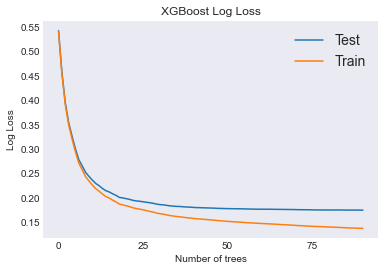

In [185]:
# plot the cross-validation log loss (early_stopping_rounds set to 10)
plt.plot(meta_cv_tuned.index, meta_cv_tuned['test-logloss-mean'], label='Test')
plt.plot(meta_cv_tuned.index, meta_cv_tuned['train-logloss-mean'], label='Train')
plt.xticks(np.arange(min(meta_cv_2.index), max(meta_cv_2.index)+1.1, 25)) 
plt.ylabel('Log Loss')
plt.xlabel('Number of trees')
plt.title('XGBoost Log Loss')
plt.legend(fontsize=14)
plt.show

In [186]:
# get the the best iteration (lowest test log loss) from meta_cv_tuned, it will be used as the number of boosting rounds in the classifier
iter_best_meta_tuned = len(meta_cv_tuned)
iter_best_meta_tuned #91

91

In [187]:
# use the best iteration from meta_cv_tuned and the parameters from params_tuned_meta, then train the model.  
clf_meta_tuned = xgb.XGBClassifier(n_estimators=iter_best_meta_tuned, random_state=RANDOM_STATE, use_label_encoder=False, eval_metric='logloss',
learning_rate=0.26353, reg_lambda=1.035914, reg_alpha=1.2, max_depth=8, gamma=0.212111, min_child_weight=5.052371, colsample_bytree=0.6)

clf_meta_tuned.fit(X_train_meta, y_train_meta)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, eval_metric='logloss',
              gamma=0.212111, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.26353,
              max_delta_step=0, max_depth=8, min_child_weight=5.052371,
              missing=nan, monotone_constraints='()', n_estimators=91,
              n_jobs=12, num_parallel_tree=1, random_state=42, reg_alpha=1.2,
              reg_lambda=1.035914, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

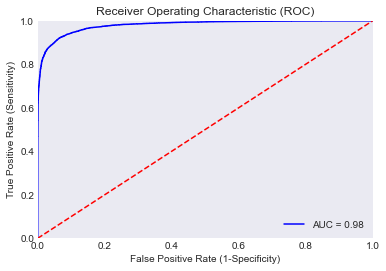

In [188]:
# ROC and AUC
meta_fpr_tuned, meta_tpr_tuned, meta_threshold_tuned = metrics.roc_curve(y_test_meta, clf_meta_tuned.predict_proba(X_test_meta)[:,1]) 
meta_roc_auc_tuned = metrics.auc(meta_fpr_tuned, meta_tpr_tuned)

plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(meta_fpr_tuned, meta_tpr_tuned, 'b', label='AUC = %0.2f' % meta_roc_auc_tuned)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.show()

### 4.3.3 Compare AUC, Meta learner - XGBoost hyperparameter tuned

The tuned classifier clf_meta_tuned have a higher AUC score than clf_meta_2 (on the same number of features) 

I choose to use the clf_meta_tuned classifiers AUC score as benchmark to compare against the standalone models

In [189]:
print(f'meta_roc_auc_tuned: {meta_roc_auc_tuned}')
print(f'meta_roc_auc_2:     {meta_roc_auc_2}')

meta_roc_auc_tuned: 0.9801560117697439
meta_roc_auc_2:     0.9789553980989986


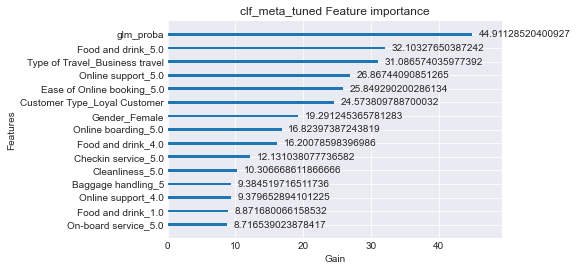

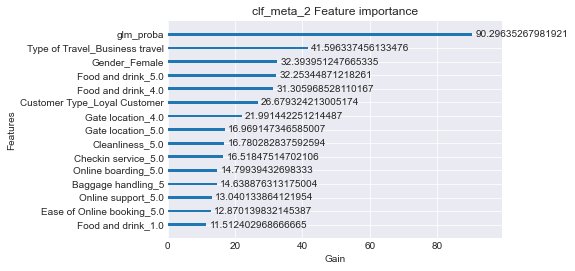

In [190]:
# importance plot showing the 15 features with the highest gain score 
xgb.plot_importance(clf_meta_tuned, max_num_features=15, importance_type = 'gain', xlabel='Gain', title='clf_meta_tuned Feature importance')
plt.show()
xgb.plot_importance(clf_meta_2, max_num_features=15, importance_type = 'gain', xlabel='Gain', title='clf_meta_2 Feature importance')
plt.show()

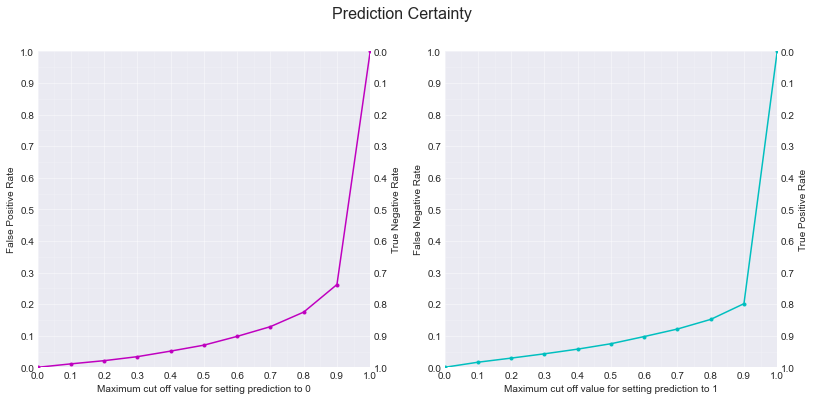

In [191]:
meta_prediction_certainty = prediction_certainty(y_test_meta, clf_meta_tuned.predict_proba(X_test_meta))
meta_prediction_certainty

# 5. Conclusion -  Comparing AUC
    * AUC GLM:     0.92607
    * AUC XGBoost: 0.98187
    * AUC Meta:    0.98016

All the classifiers have an AUC score that is over 0.90, that is already a really good score for an AUC. We can see that using stacked generalization (stacking) and its meta learner model leads to a higher AUC score than for the standalone Logistic regression model. The standalone XGBoost model's AUC score is on the other hand slightly better than the stacked meta learner’s. There can be many reasons for that, it can for example depend on:

* Even though the meta learner gets probabilities from the Logistic regression and XGBoost base learners, that doesn't compensate for the fact that I train the meta learner on less data than I do for the standalone models. 
* As already pointed out, all three models have an high AUC score and especially the standalone XGBoost model and the XGBoost meta learner have an AUC score above 0.98. It's hard to make the meta learner better than the standalone model when the standalone XGBoost model already has such a high AUC score. 
* The data used by the meta learner is used on the Logistic regression and XGboost base learners to get the probabilities from each base learner and the probabilities are then added as two extra features for the meta learner dataset. There could be a strong correlation between the probabilities from the Logistic regression and XGBoost base learners. Especially since both base learners have an high AUC score and the feature with the probabilities from the Logistic regression base learner gets a high gain score while the feature with the probabilities for the XGBoost base learner gets a low gain score. I.e. it’s multicollinearity between the added probabilities from the base learners and this negatively affects the meta learner. This could be tested by training the meta learner again but this time without the feature with probabilities from the Logistic regression base learner, does the gain score for the feature with XGBoost base learner probabilities increase?    

A next step for further analyses and testing regarding stacking could also be to use different/or more base learners for example Naive Bayes, Support Vector Machines, Random Forest or Neural Network models. 

In [192]:
# AUC benchmarks
print(f'AUC GLM:     {np.round(glm_roc_auc_2,5)}')
print(f'AUC XGBoost: {np.round(xgb_roc_auc_tuned,5)}')
print(f'AUC Meta:    {np.round(meta_roc_auc_tuned,5)}')

AUC GLM:     0.92607
AUC XGBoost: 0.98187
AUC Meta:    0.98016


In [193]:
# a report showing the main classification metrics for the meta model and the XGboost model
# 'support' show how many instances that are used for the models (16 458 vs 23 511) 
meta_class_rep = metrics.classification_report(y_test_meta, clf_meta_tuned.predict(X_test_meta))
print('meta_class_rep')
print(meta_class_rep)
print('xgb_class_rep_tuned')
print(xgb_class_rep_tuned)

meta_class_rep
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      7620
           1       0.94      0.93      0.93      8838

    accuracy                           0.93     16458
   macro avg       0.93      0.93      0.93     16458
weighted avg       0.93      0.93      0.93     16458

xgb_class_rep_tuned
              precision    recall  f1-score   support

           0       0.92      0.93      0.92     10846
           1       0.94      0.93      0.93     12665

    accuracy                           0.93     23511
   macro avg       0.93      0.93      0.93     23511
weighted avg       0.93      0.93      0.93     23511



In [194]:
# gain score for clf_meta_1, check the score for 'xgb_proba' and 'glm_proba'
sorted((clf_meta_1.get_booster().get_score(importance_type='gain')).items(), key=lambda item: item[0], reverse=True)

[('xgb_proba', 3.7448351266655733),
 ('glm_proba', 131.73964672029356),
 ('Type of Travel_Business travel', 40.547678426412254),
 ('Online support_5.0', 17.994228656229502),
 ('Online support_4.0', 12.29287251822581),
 ('Online support_3.0', 7.122396402690911),
 ('Online support_2.0', 6.214259790645161),
 ('Online support_1.0', 5.037255334620689),
 ('Online boarding_5.0', 17.585376918846144),
 ('Online boarding_4.0', 4.22544648),
 ('Online boarding_3.0', 3.7755796801249994),
 ('Online boarding_2.0', 5.023326576362334),
 ('Online boarding_1.0', 5.476767941923333),
 ('On-board service_5.0', 12.31607923708),
 ('On-board service_4.0', 7.594749083518516),
 ('On-board service_3.0', 6.172954537000001),
 ('On-board service_2.0', 5.810788804931034),
 ('On-board service_1.0', 5.928427820791666),
 ('Leg room service_5.0', 8.229135225209678),
 ('Leg room service_4.0', 7.998738330198041),
 ('Leg room service_3.0', 4.170475754439026),
 ('Leg room service_2.0', 5.269262461321431),
 ('Leg room service

## 5.1 Compare models with one-way analysis of variance (ANOVA) tests
As the last part of my project I do statistical inference to check if the two standalone hyperparameter tuned models and the hyperparameter tuned stacked meta learner are different from each other with regard to its predictions. I use the X_test_meta dataset to get the probabilities for satisfied(1) from each model and check for inference through one-way analysis of variance (ANOVA) tests. I only compare two models at the time because I want to know which two models are different/not different from each other, hence I conduct three ANOVA tests.

The inferences are that the models are different from each other. The three ANOVA tests show different F statistic values and p-values lower than the significance level (alpha) set to 0.05. A p-value lower than alpha means that the hypothesis is proven wrong and that the models are different. Note that for some of the models the p-value output is 0.0 that doesn't equal a p-value of exactly 0.0 but that the p-value is so low that the notebook won't show it in any other way than as 0.0.       

Now follows a more detailed description about ANOVA tests and how I conducted my ANOVA tests: 

With a one-way ANOVA test you check if two or more groups have the same population mean hence the null hypothesis is: the groups have the same population mean. The ANOVA tests I conducted with the scipy.stats.f_oneway algorithm returns two values regarding the null hypothesis:
* F statistic of the test - It helps to answer the question “Is the variance between the means of two populations significantly different?” If the null hypothesis is true, you anticipate F to have a value close to 1.0 most of the time. A large F on the other hand means that the variation among sample means is more than you would expect to see by chance. 
* The associated p-value from the F distribution - The p-value is the probability of getting a result at least as extreme as the one that was actually observed, given that the null hypothesis is true. Rejection of the null hypothesis happens when your p-value is smaller than your significance level (alpha).

For the corresponding p-value to be valid, three important assumptions have to be satisfied:
1. The samples are independent. - They are in this case since they were randomly selected with the sklearn train test split algorithm.   
2. Each sample is from a normally distributed population. - The sample size is so big that I can safely assume that each sample is from an approximately normally distributed population.
3. The population standard deviations of the groups are all equal. This property is known as homoscedasticity. - This means having data values that are scattered to about the same extent. Homoscedasticity generally isn’t too critical regarding ANOVA, especially if your samples are all the same size as they are in my case, because then the ANOVA test is robust enough to handle some heteroscedasticity. Source: Minitab -- “https://blog.minitab.com/en/statistics-and-quality-data-analysis/dont-be-a-victim-of-statistical-hippopotomonstrosesquipedaliophobia”    
 
The steps for doing the ANOVA tests I conducted is roughly as follows:
1. Restore the train and test data sets for the meta learner and the standalone models. 
2. Carry through the feature selection on each model, but this time on the X_test_meta dataset. Then use that subset to predict the probabilities for satisfied(1) for each model, in the end you have a sample of 16 458 probabilities for each model. 
3. Conduct the ANOVA tests on the probabilities from two models for each test. Print the F statistic, p-value and also if the p-value is lower than the alpha level at 0.05, print ‘Models are different’, else if the p-value is higher than the alpha level print  ‘Models are same’.  

In [195]:
# restore train and test sets for the stacked meta learner
X_train_meta, X_test_meta, y_train_meta, y_test_meta = train_test_split(X_meta, y_meta, test_size=0.2, random_state=RANDOM_STATE, stratify=y_meta, shuffle=True)

In [196]:
# restore train and test sets for the standalone models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y, shuffle=True)

In [197]:
# same feature selection as for clf_meta_tuned   
meta_anova_data = X_test_meta.loc[:,X_test_meta.loc[:,gain_score_meta_df.iloc[:30].index].columns]
# predict the probabilities for satisfied(1)
meta_anova_probas = clf_meta_tuned.predict_proba(meta_anova_data)[:,1]

In [198]:
# same feature selection as for clf_glm_2 but on X_test_meta  
glm_anova_data = X_test_meta.loc[:,X_test.loc[:,rfecv.support_].columns]
# predict the probabilities for satisfied(1)
glm_anova_probas = clf_glm_2.predict_proba(glm_anova_data)[:,1]

In [199]:
# same feature selection as for clf_xgb_tuned but on X_test_meta 
xgb_anova_data = X_test_meta.loc[:,X_test.loc[:,gain_score_df.iloc[:30].index].columns]
# predict the probabilities for satisfied(1)
xgb_anova_probas = clf_xgb_tuned.predict_proba(xgb_anova_data)[:,1]

In [200]:
print(xgb_anova_probas.shape)
print(glm_anova_probas.shape)
print(meta_anova_probas.shape)

(16458,)
(16458,)
(16458,)


In [202]:
# conduct the ANOVA tests on xgb_anova_probas and glm_anova_probas
anova_1 = f_oneway(xgb_anova_probas, glm_anova_probas)
alpha=0.05
print('F statistic:',anova_1.statistic)
print('p-value:',anova_1.pvalue)

if anova_1.pvalue < alpha:
    print('Models are different')
else:
    print('Models are same')

F statistic: 650.9167935048282
p-value: 3.415514187303535e-142
Models are different


In [203]:
# conduct the ANOVA tests on glm_anova_probas and meta_anova_probas 
anova_2 = f_oneway(glm_anova_probas, meta_anova_probas)
alpha=0.05
print('F statistic:',anova_2.statistic)
print('p-value:',anova_2.pvalue)

if anova_2.pvalue < alpha:
    print('Models are different')
else:
    print('Models are same')

F statistic: 7501.243880630277
p-value: 0.0
Models are different


In [204]:
# conduct the ANOVA tests on meta_anova_probas and xgb_anova_probas
anova_3 = f_oneway(meta_anova_probas, xgb_anova_probas)
alpha=0.05
print('F statistic:',anova_3.statistic)
print('p-value:',anova_3.pvalue)

if anova_3.pvalue < alpha:
    print('Models are different')
else:
    print('Models are same')

F statistic: 2841.532488386846
p-value: 0.0
Models are different
